# Project 10: Chapter 8: Advanced Data Analysis

## Using a Double Index to Work with Panel Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3","Year"],
                 # parse_dates = True adds the month and day onto year format
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

In [2]:
data.index[0]

('AGO', Timestamp('1970-01-01 00:00:00'))

# Isolate each individual that comprises the multi-index

In [3]:
# get all of the ISO_Code values, unique() deletes all duplicated values
countries = data.index.get_level_values("ISO_Code_3").unique()
countries

Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       ...
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='ISO_Code_3', length=165)

In [4]:
years = data.index.get_level_values("Year").unique()
years

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [5]:
# indicator variable is a variable that is either 0 or 1, ex. men or woman

In [6]:
def create_indicator_variable(data, indicator_name, 
                             index_name, target_index_list):
    data[indicator_name] = 0
    
    # don't need to use a for loop, would still work if the
    # ISO_Code was the second function
    data[indicator_name][data.index.get_level_values(
        index_name).isin(target_index_list)]
    
#    for index in target_index_list:
 #       data.loc[data.index.get_level_values(
 #       index_name) ==index, [indicator_name]] = 1
        

    
index_name = data.index.names[0]
indicator_name = "North America" 
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)
data.loc["USA"]

ISO_Code_2 World Bank Region  \
Year                                      
1970-01-01         US     North America   
1975-01-01         US     North America   
1980-01-01         US     North America   
1985-01-01         US     North America   
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   
2019-01-01         US     North America   
2020-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1970-01-01                                                NaN                                                                                     
1975-01-01                                                NaN                                                                                     
1980-01-01                                                NaN                                                                                     
1985-01-01                                                NaN                                                                                     
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                        

# Plotting Indicator Variables in Scatter

C:\Users\adamp\AppData\Local\Temp\ipykernel_17168\3649722911.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (20,12))


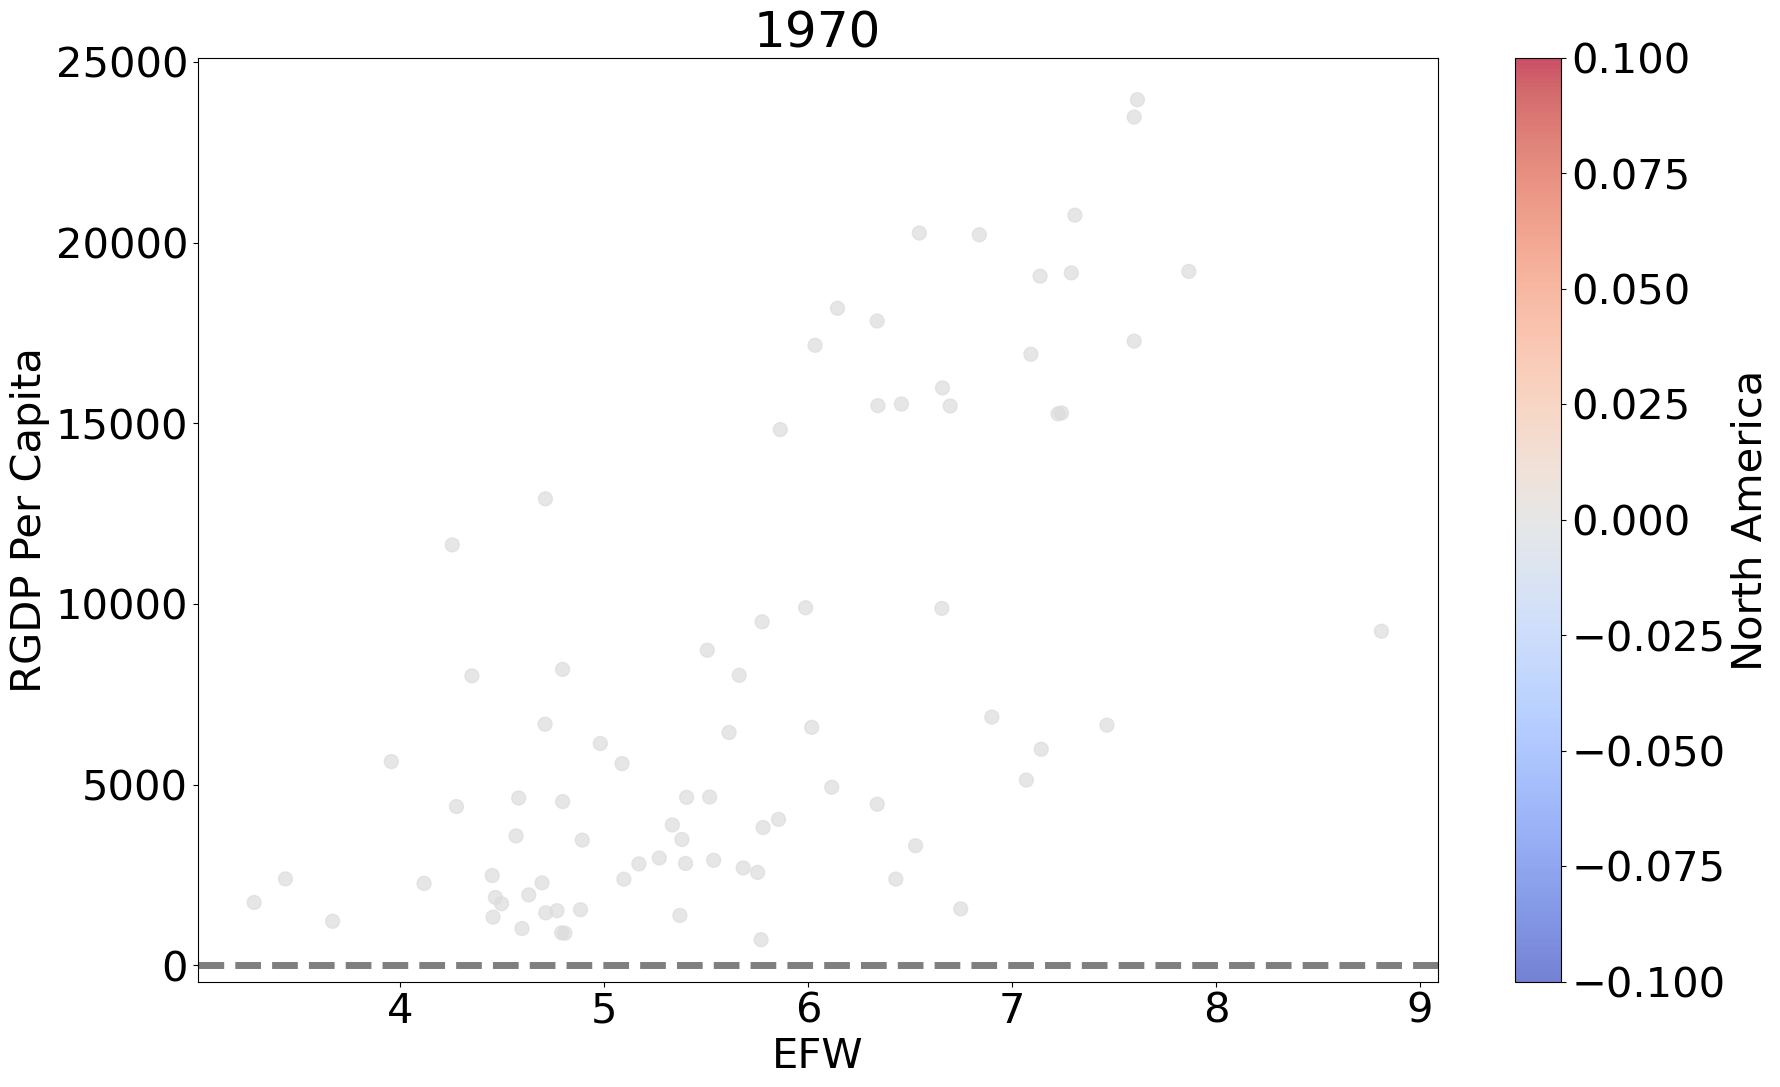

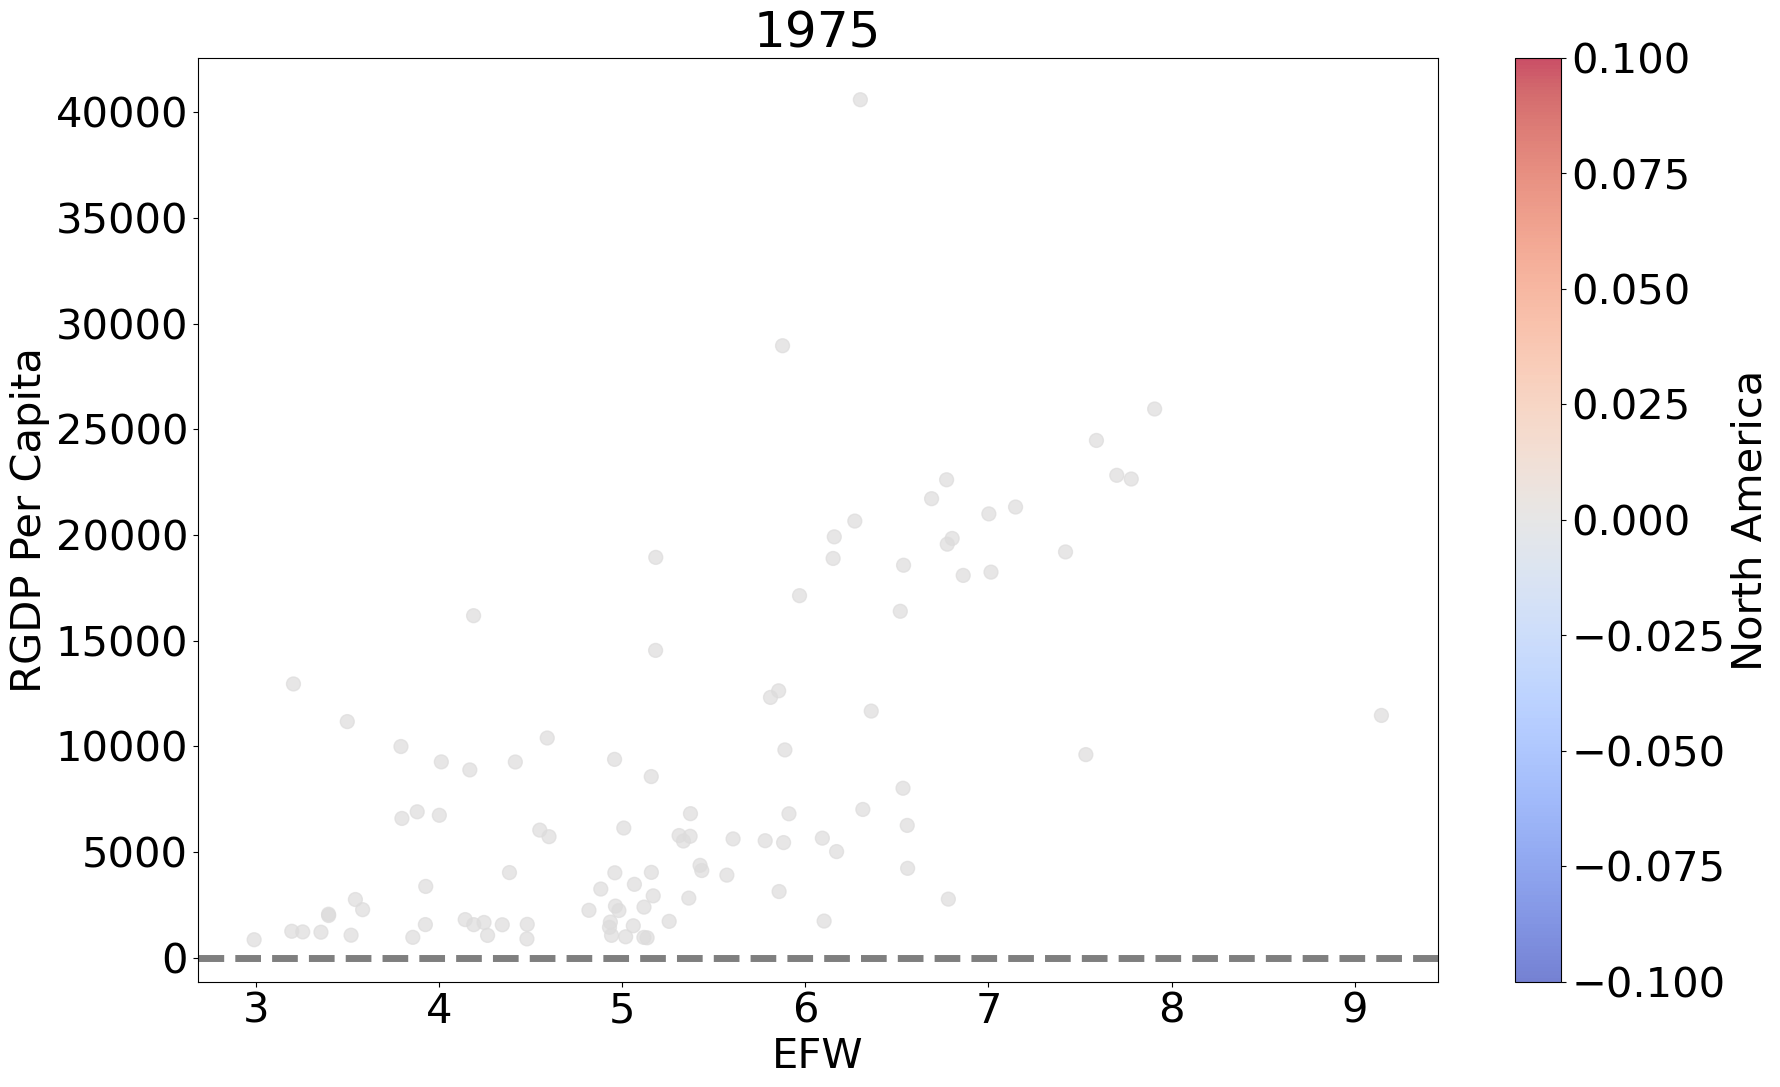

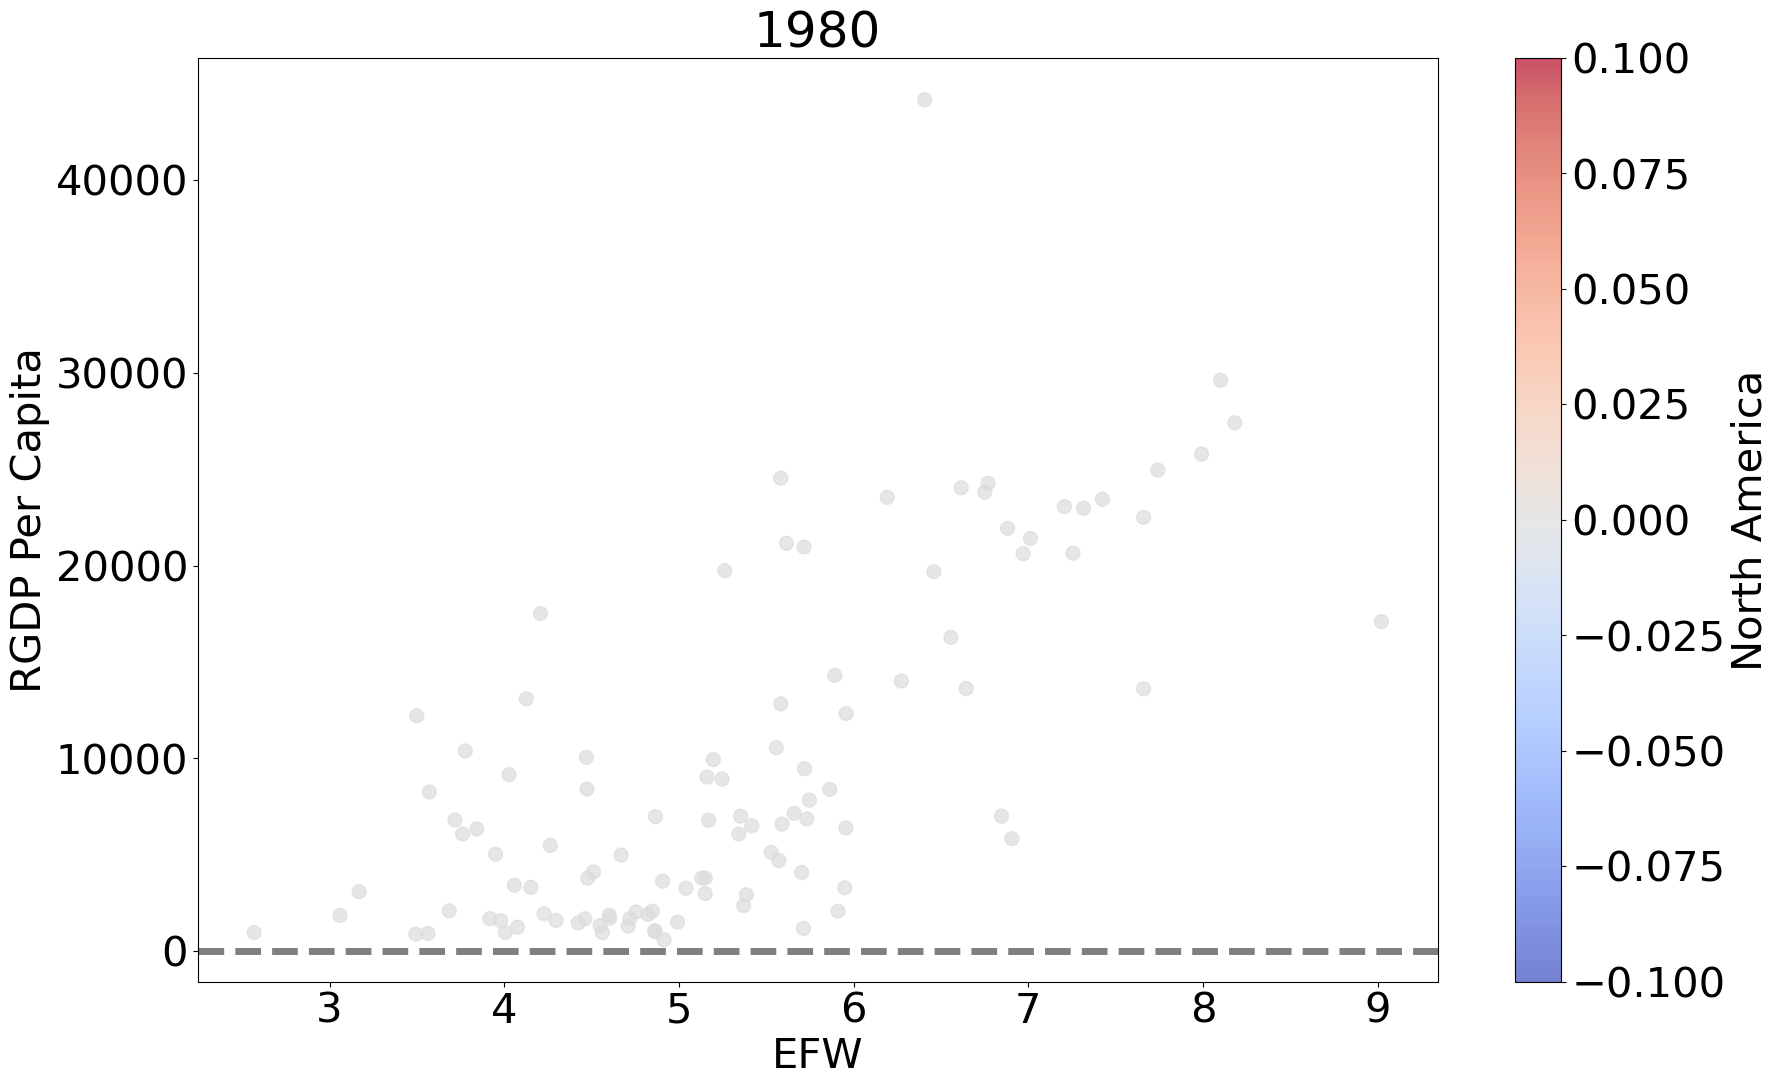

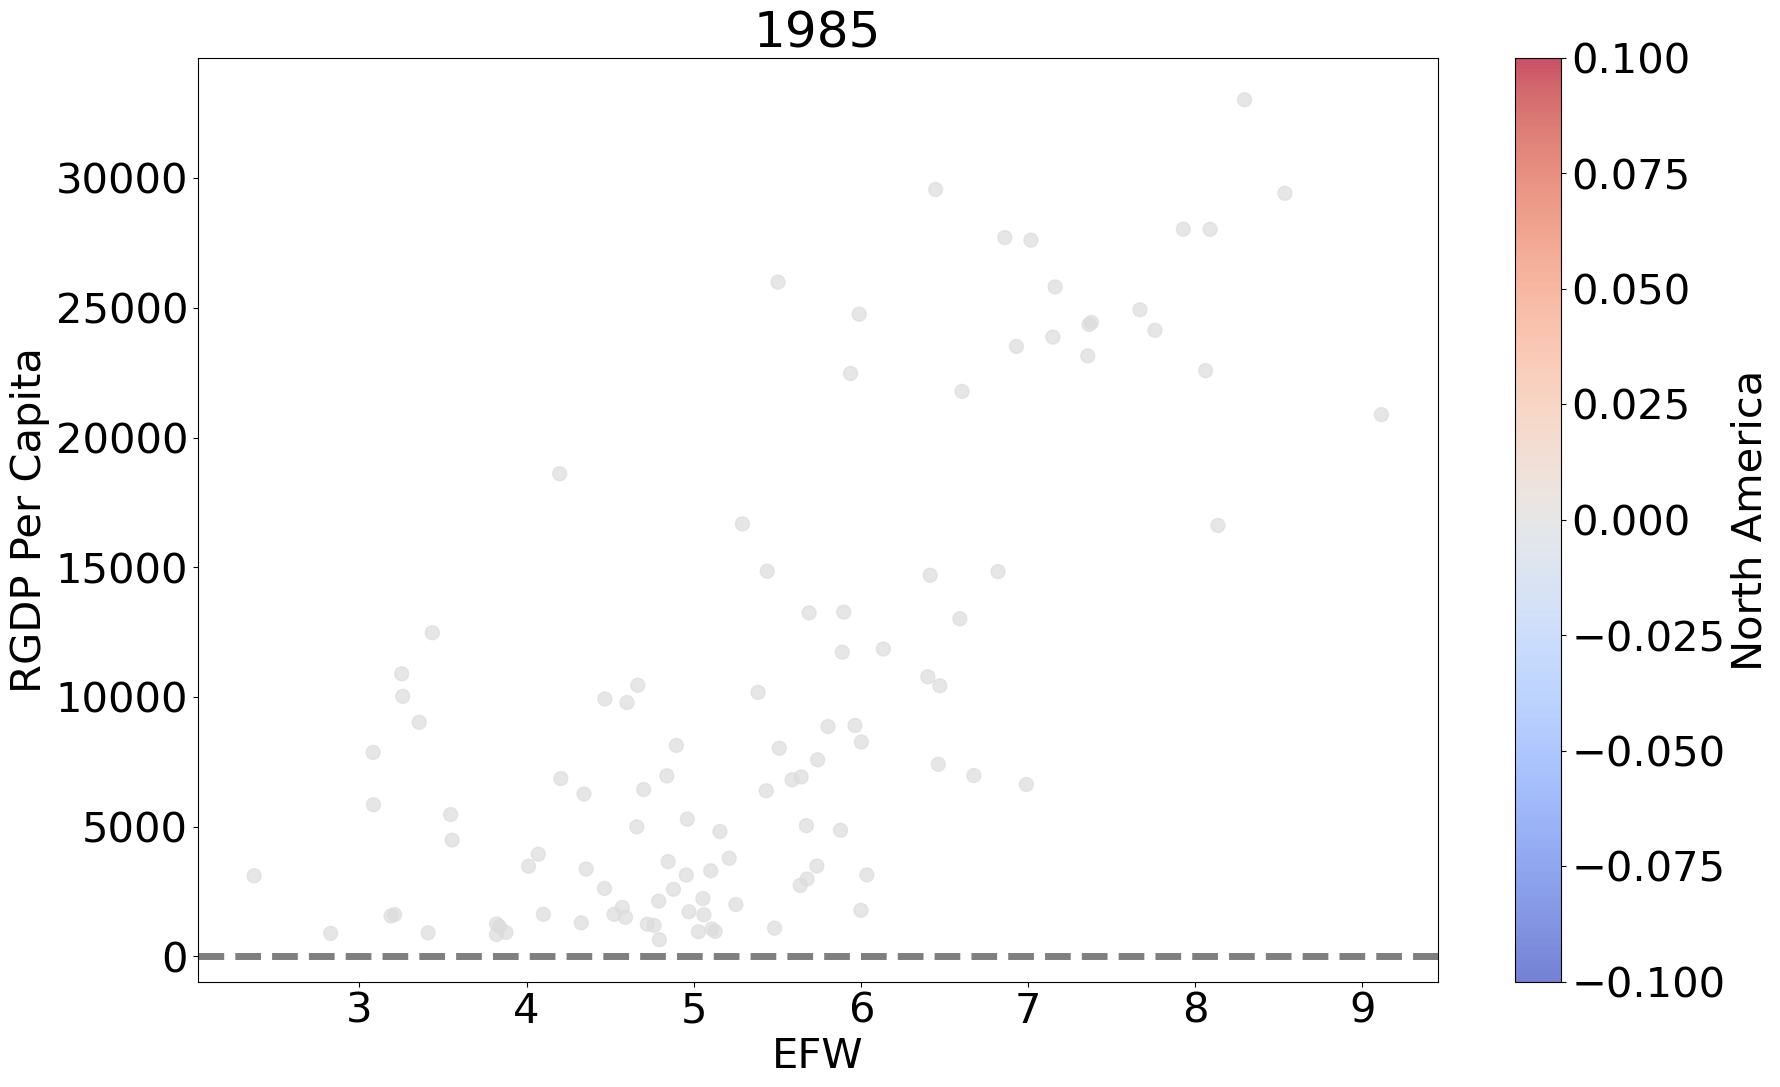

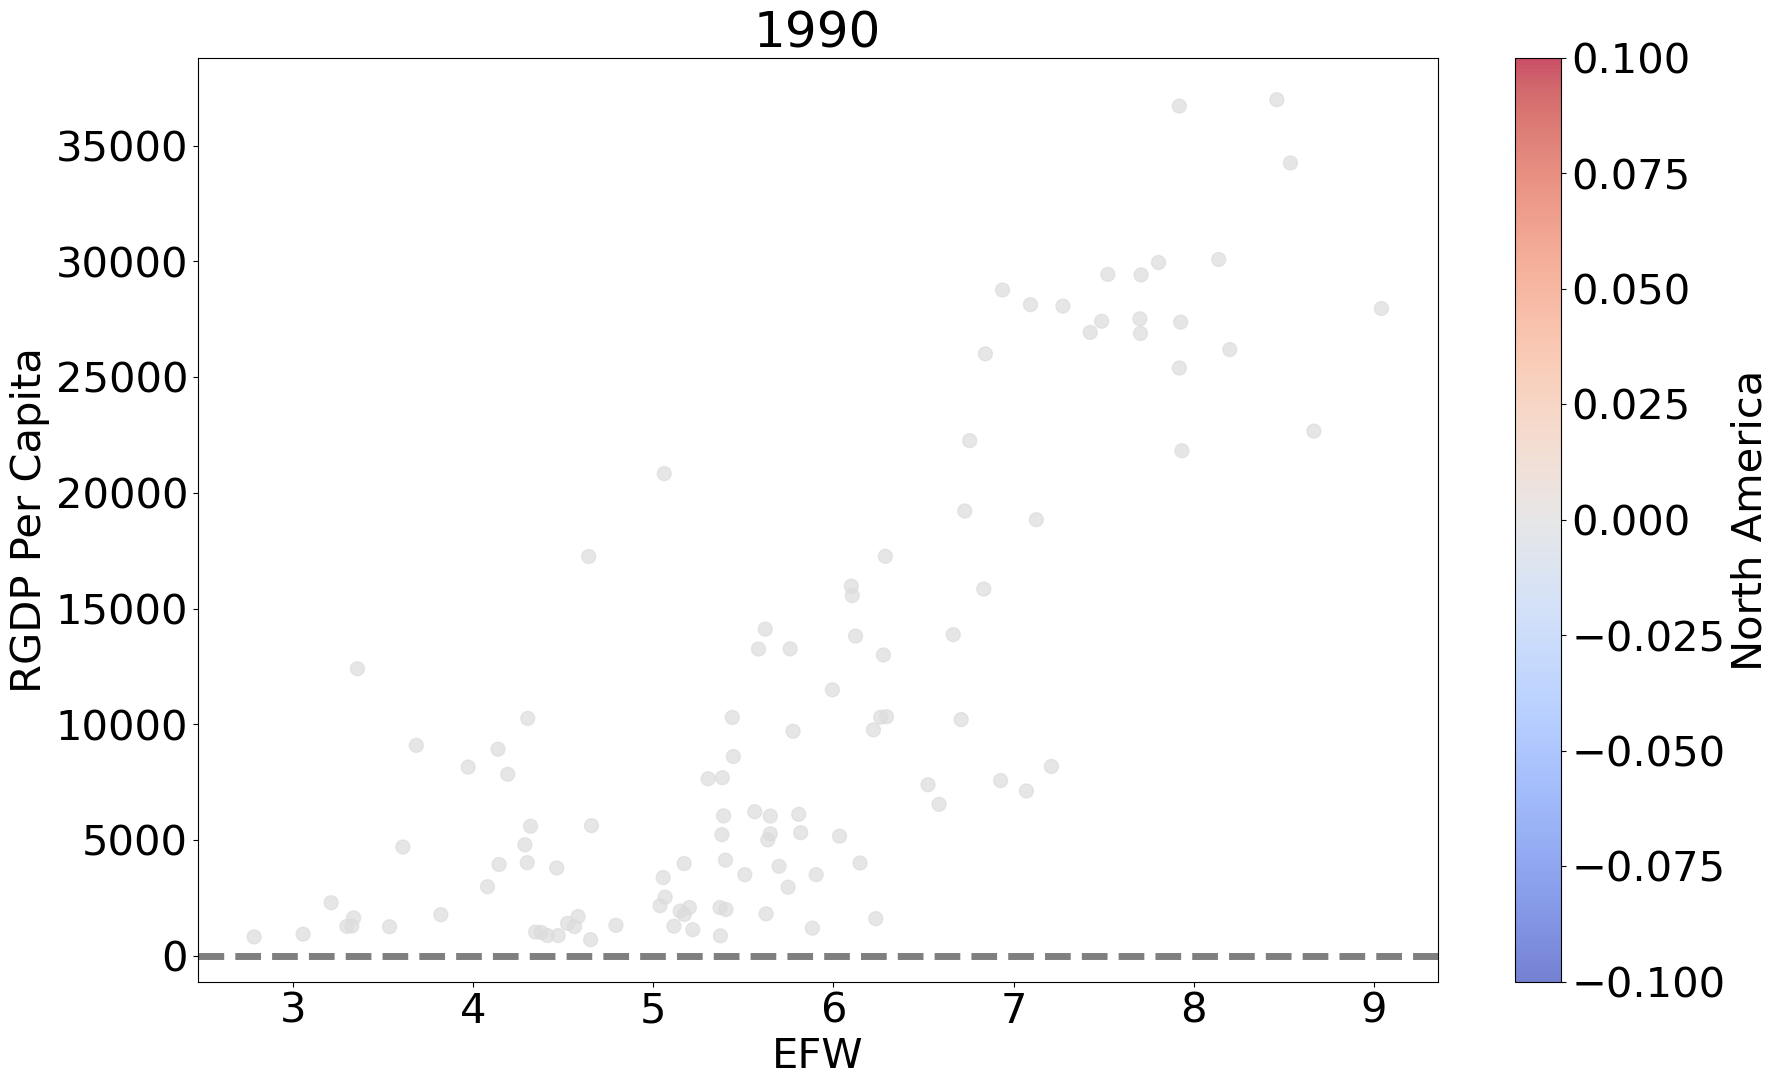

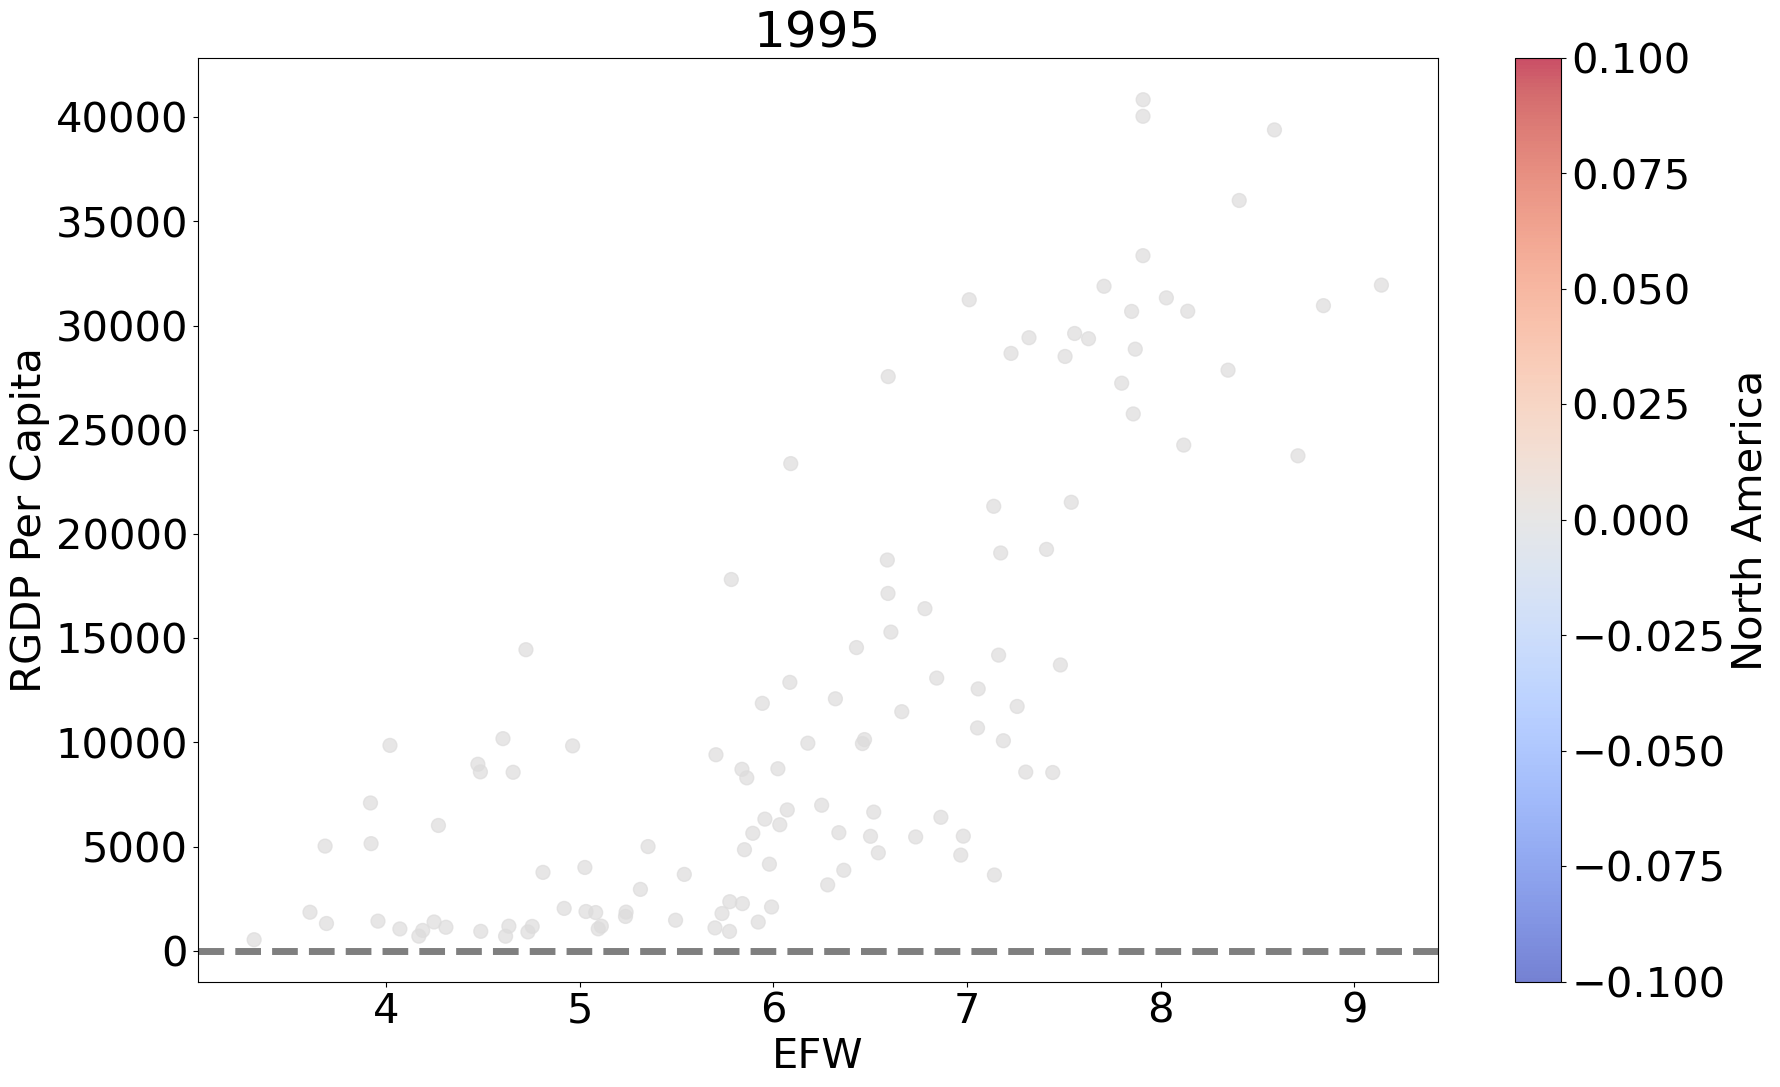

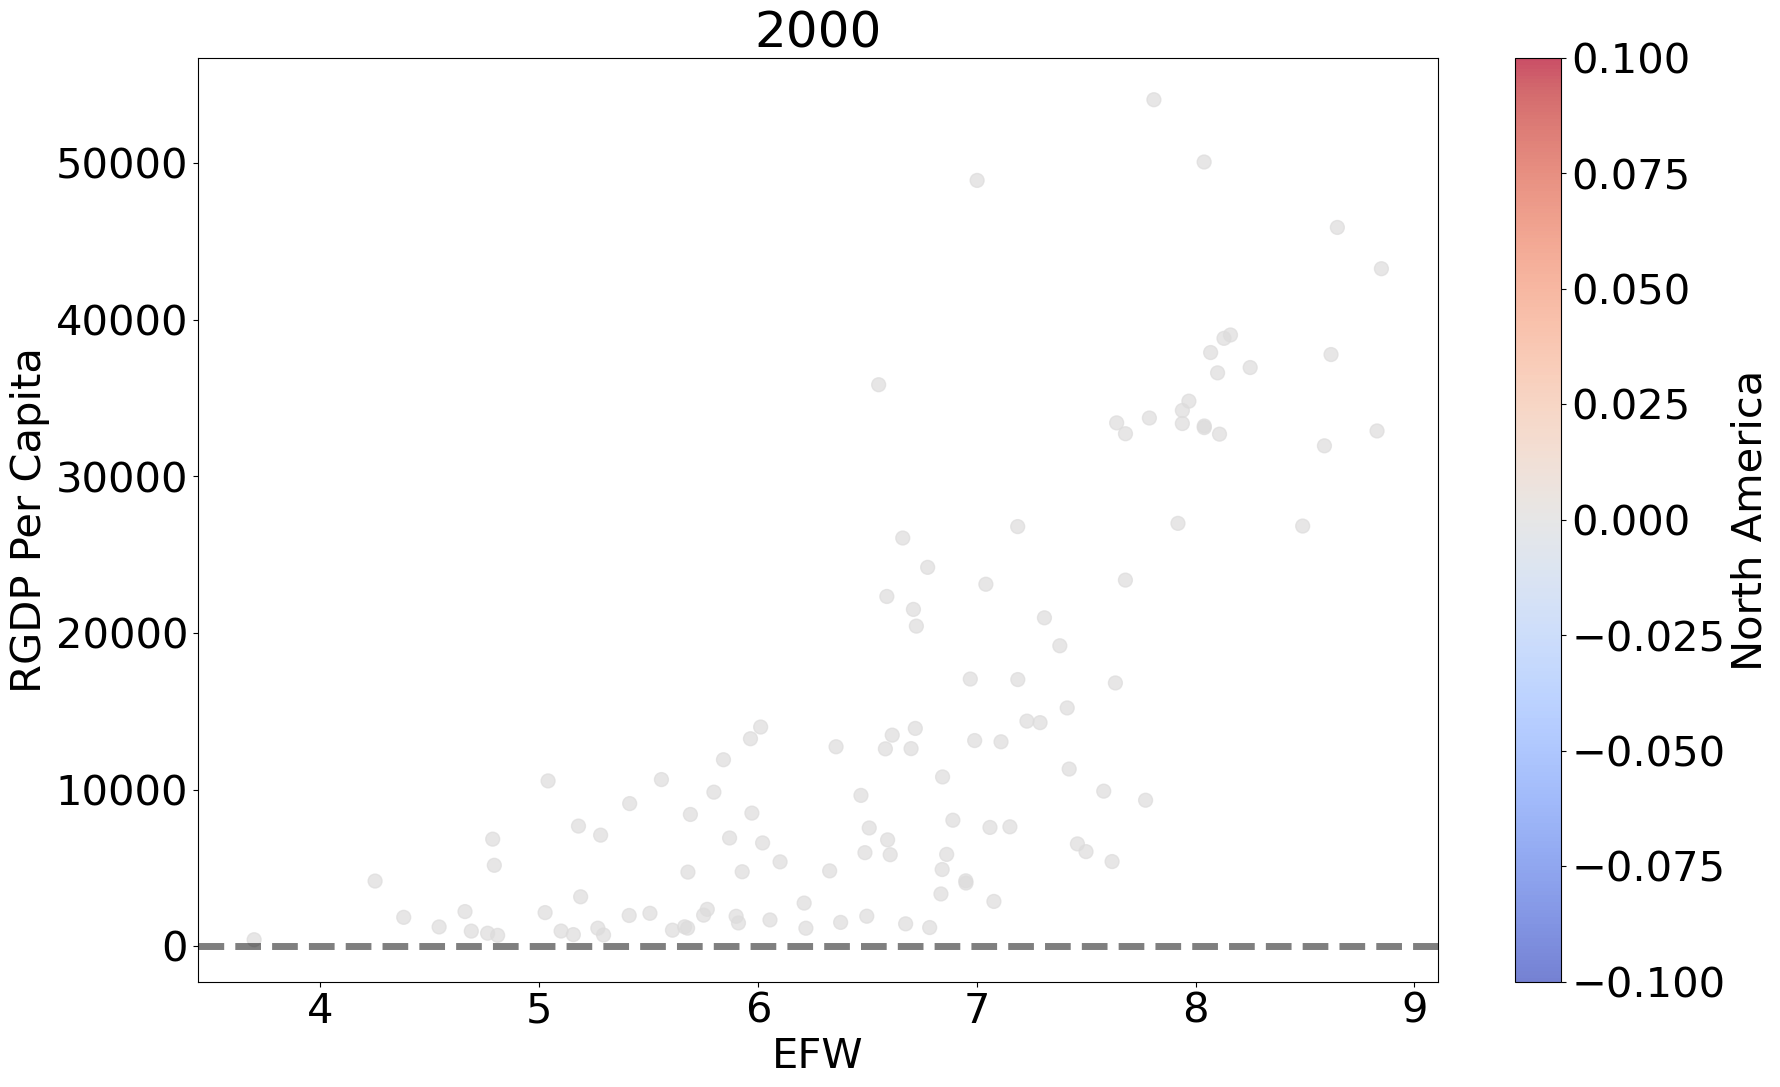

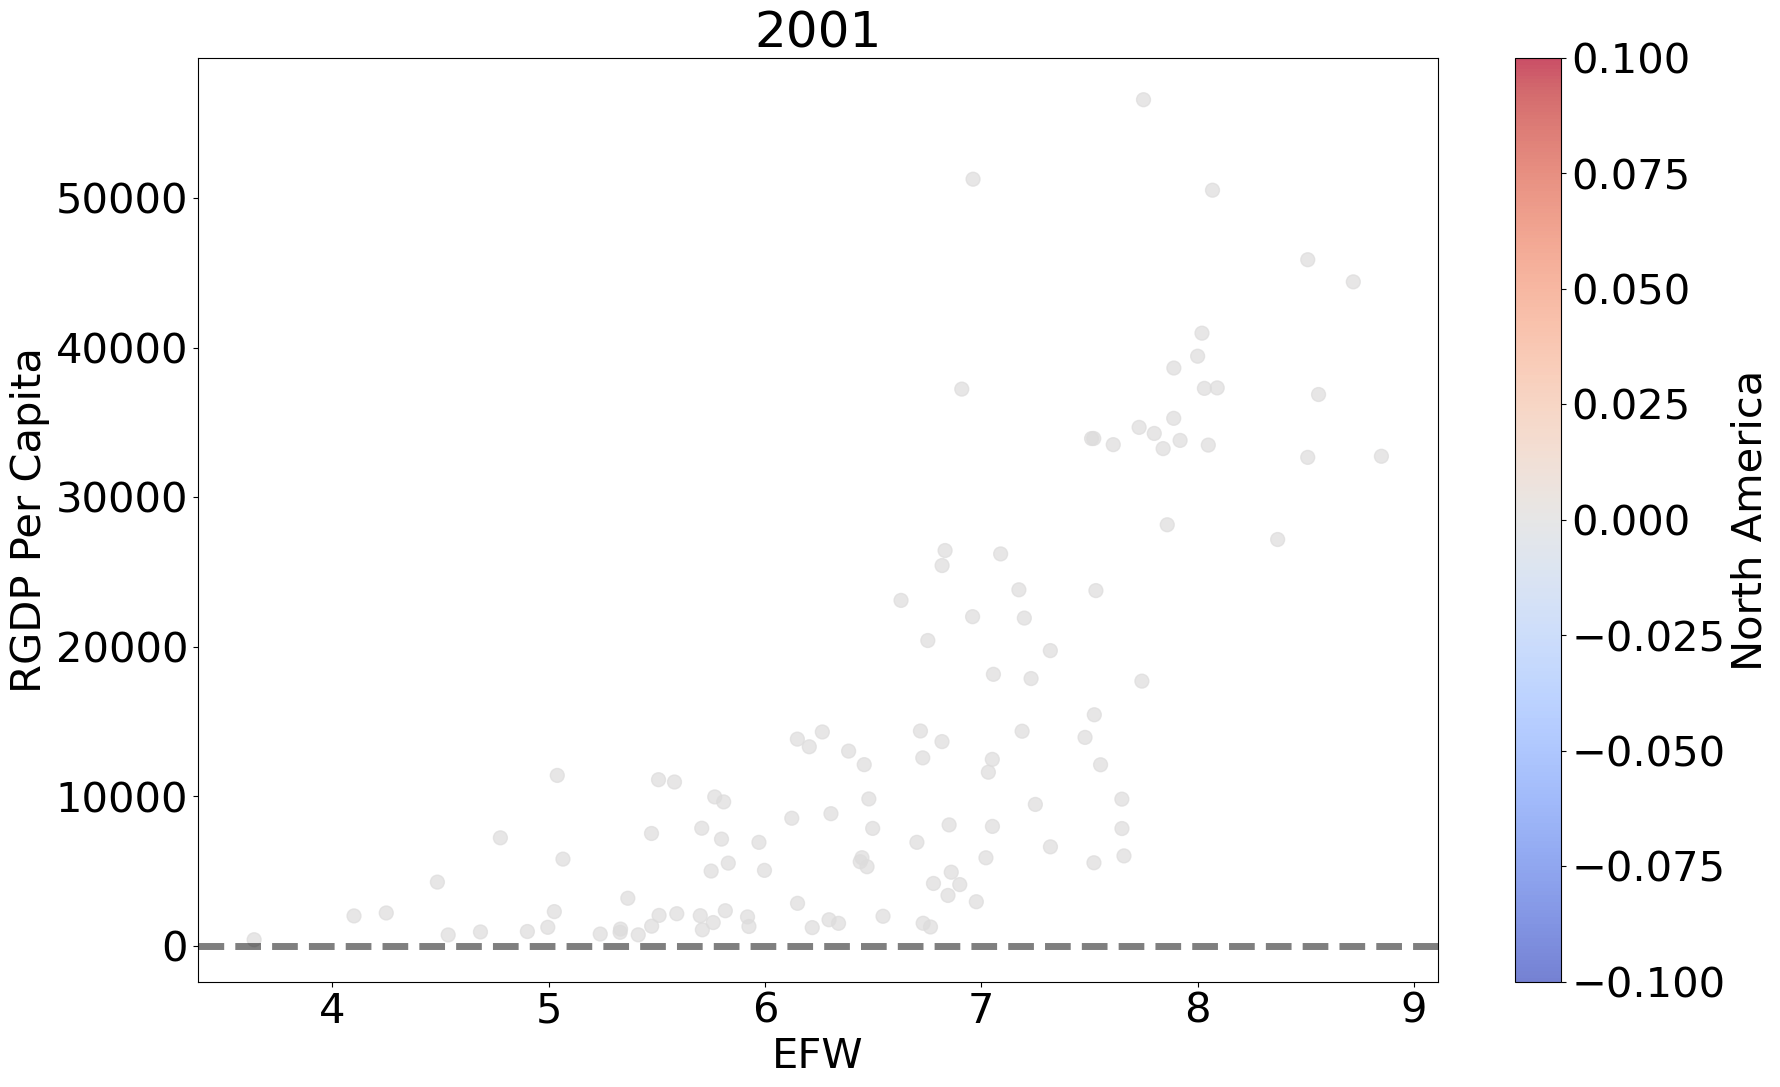

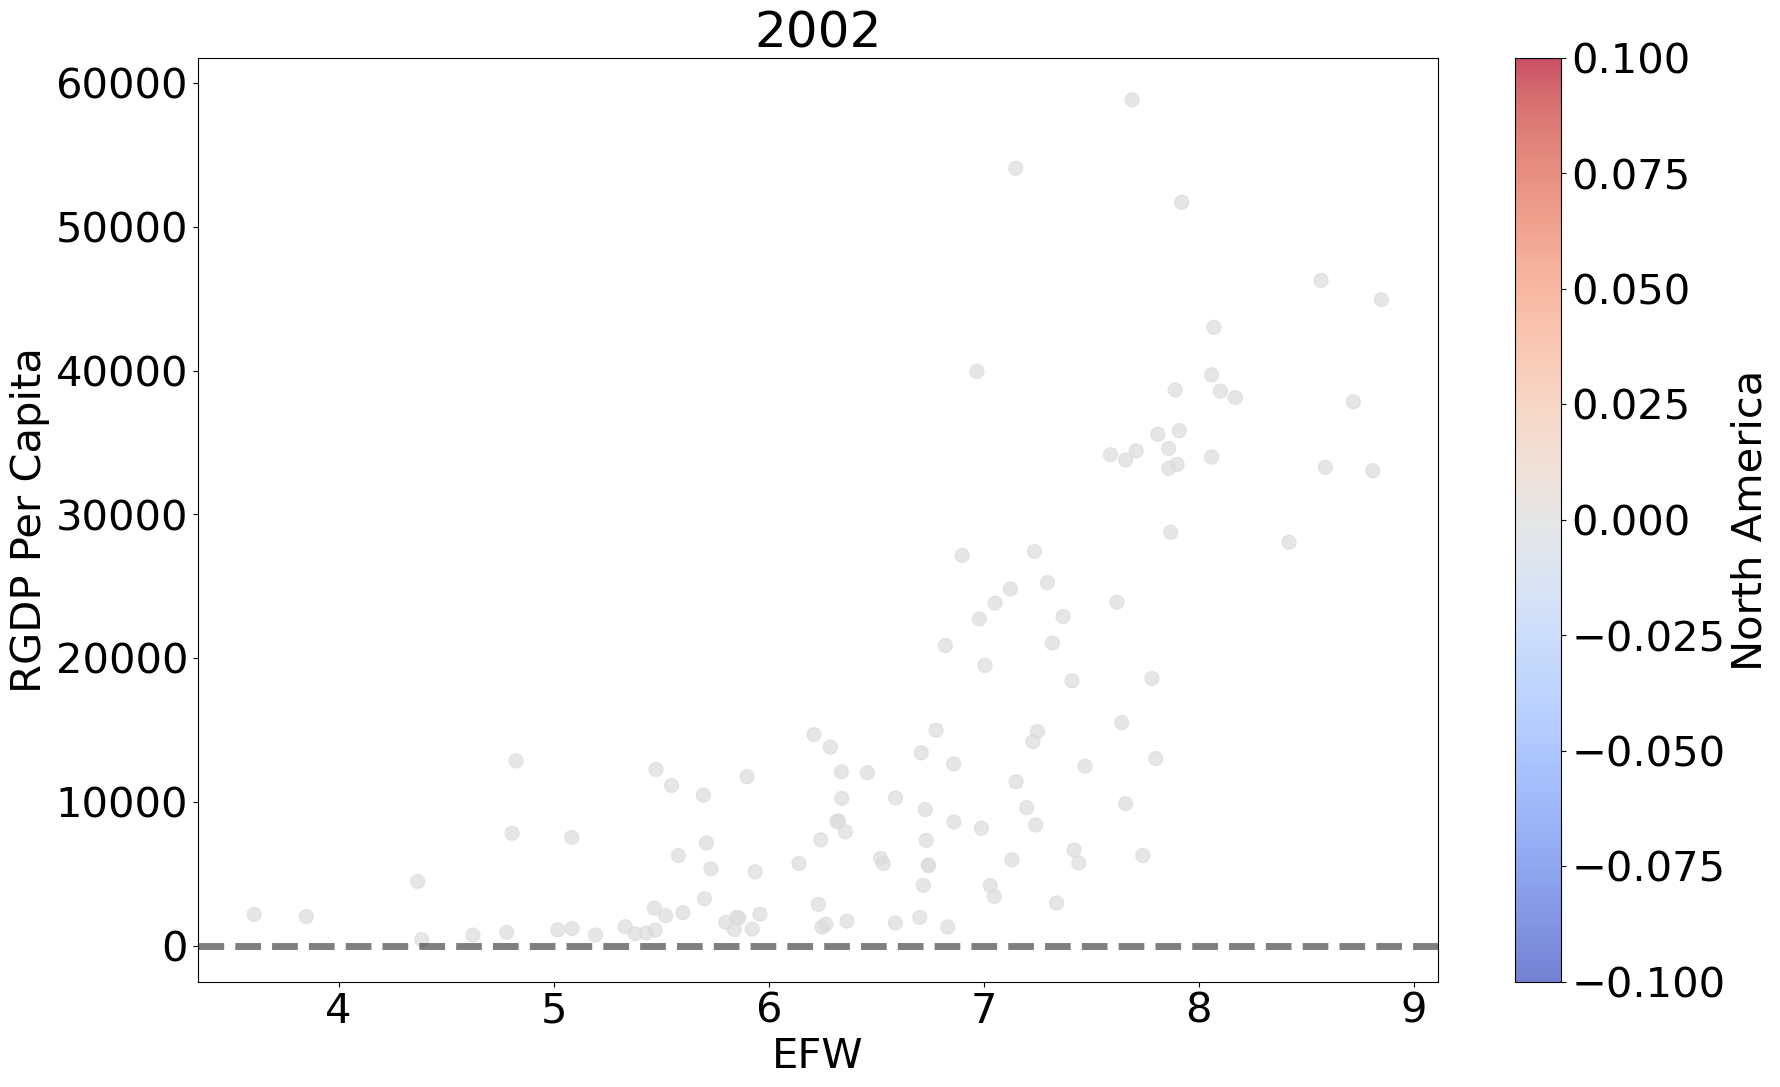

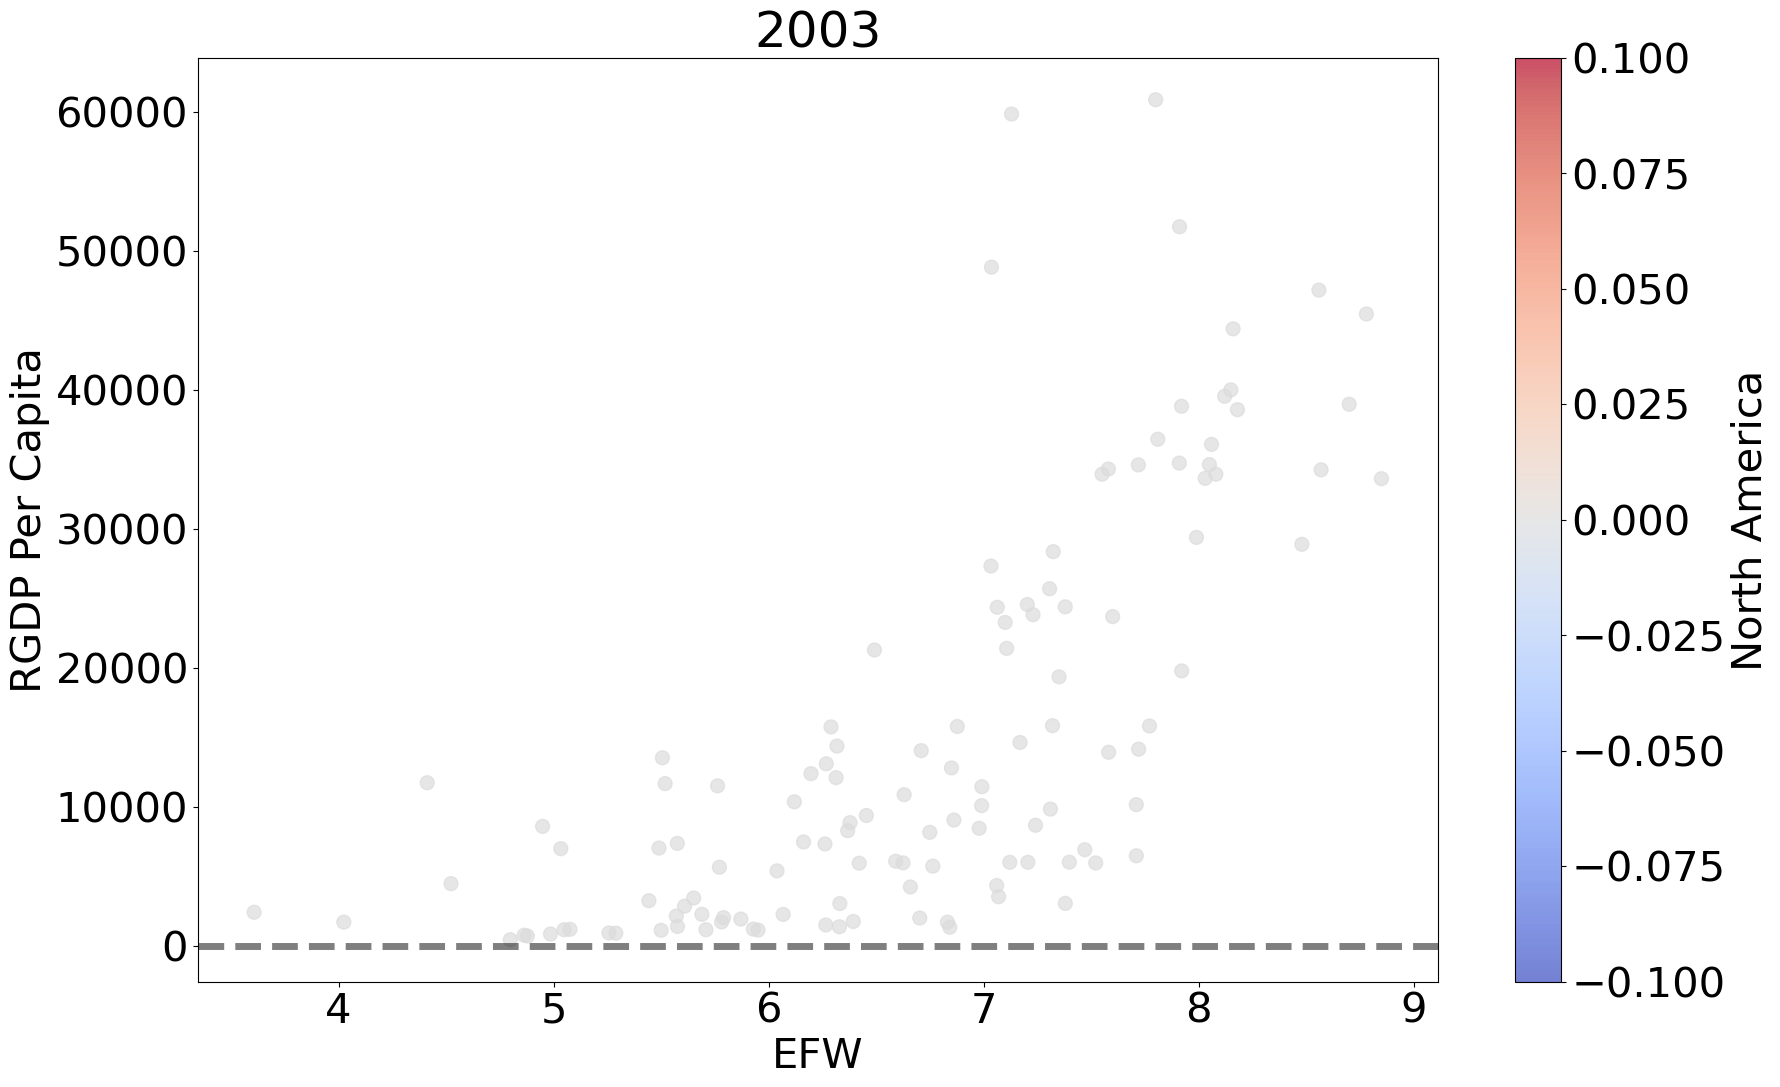

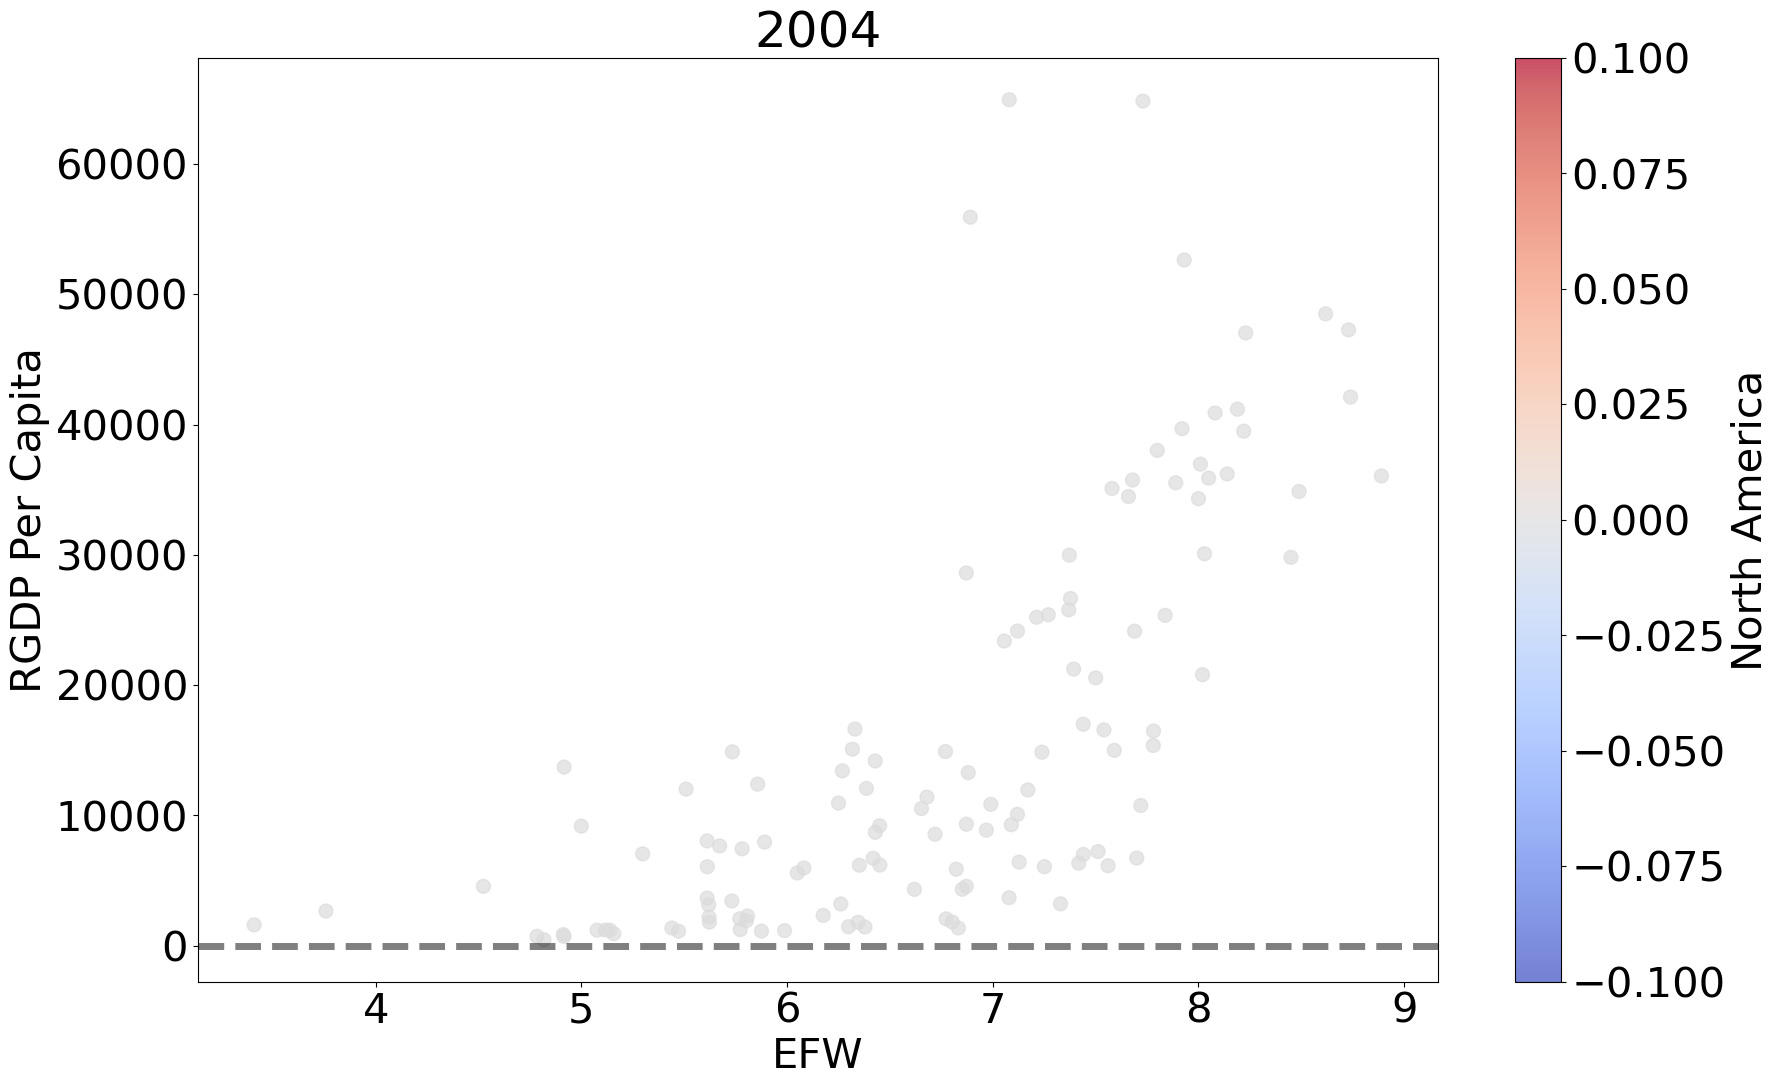

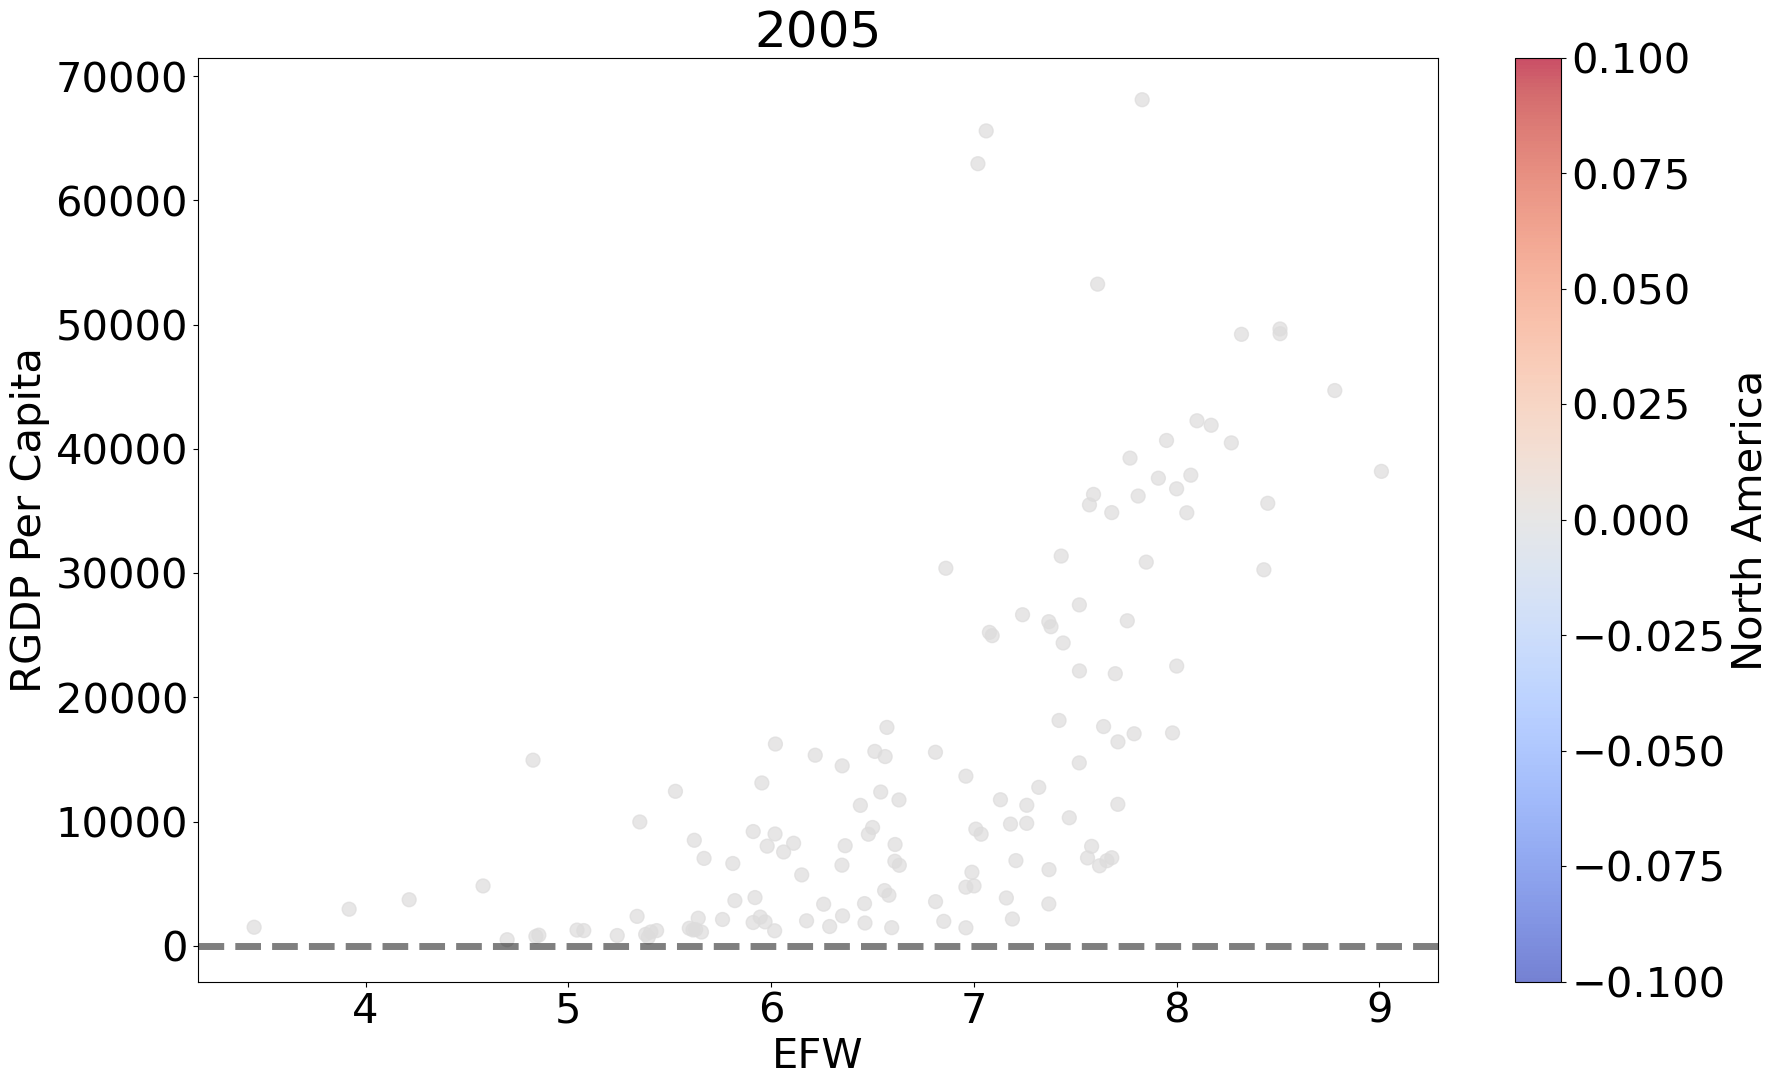

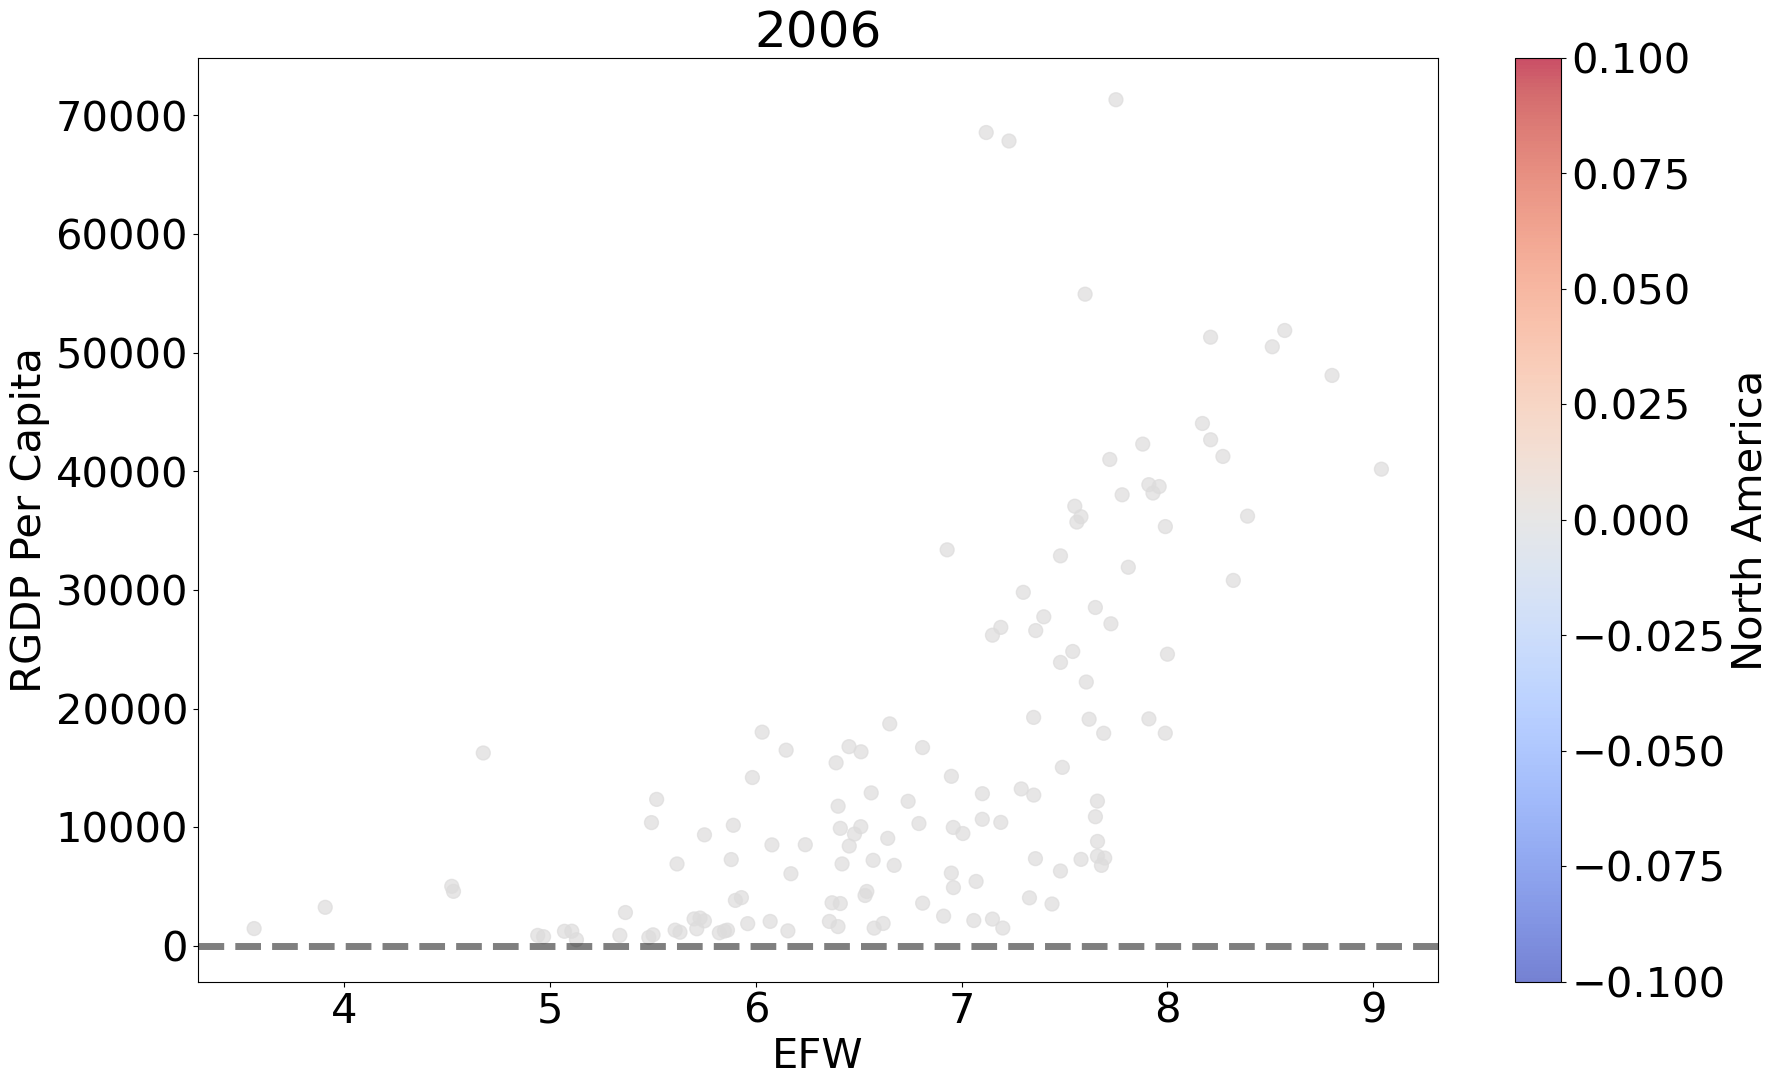

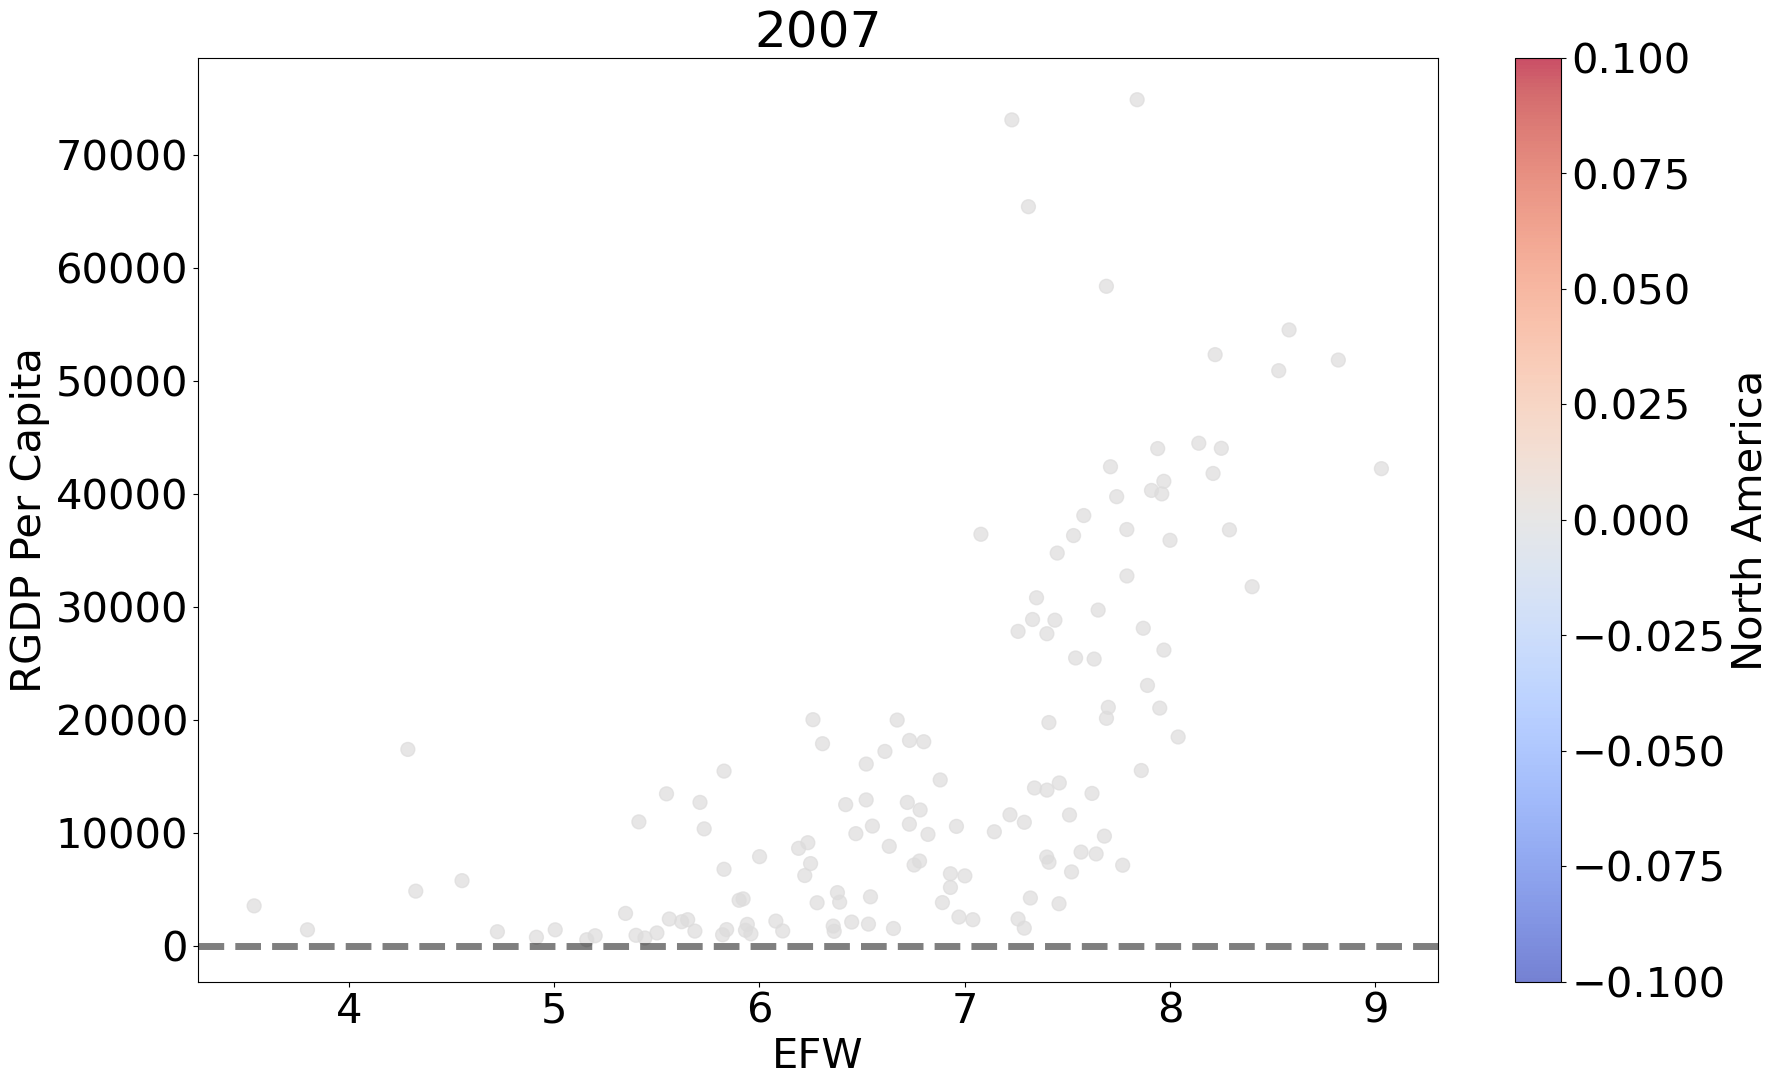

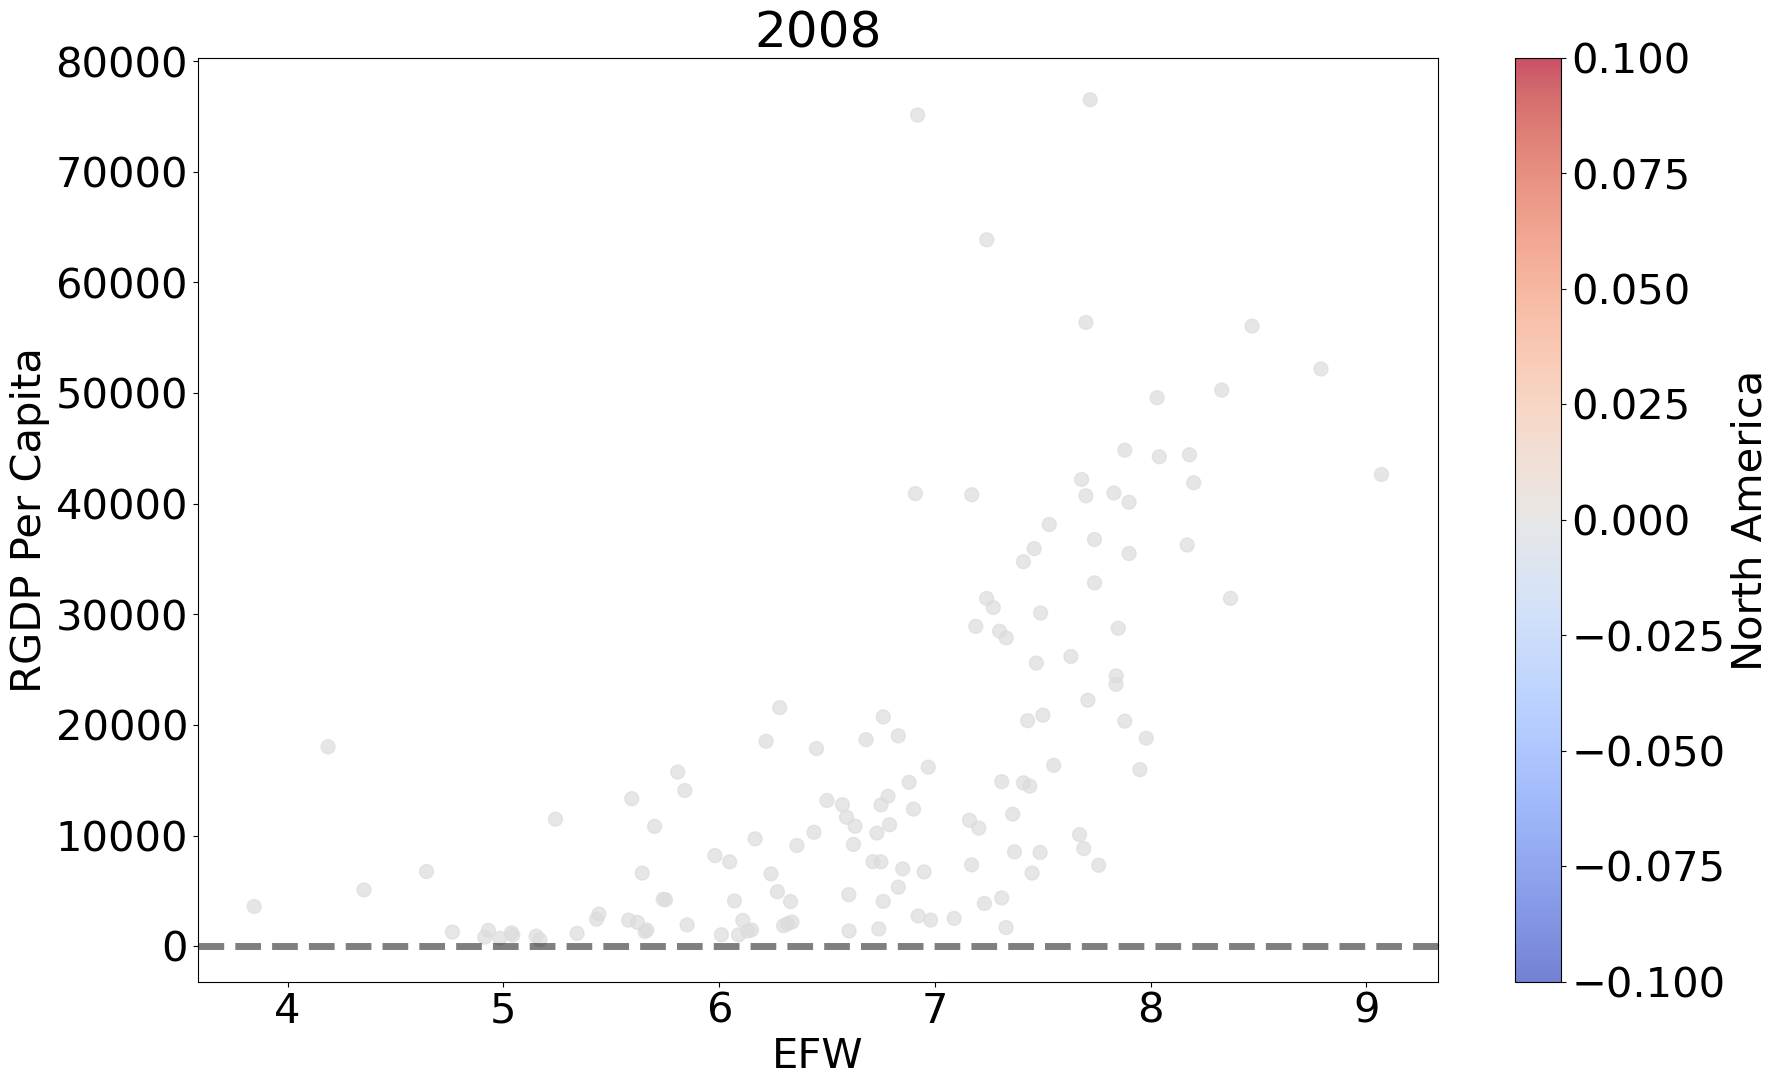

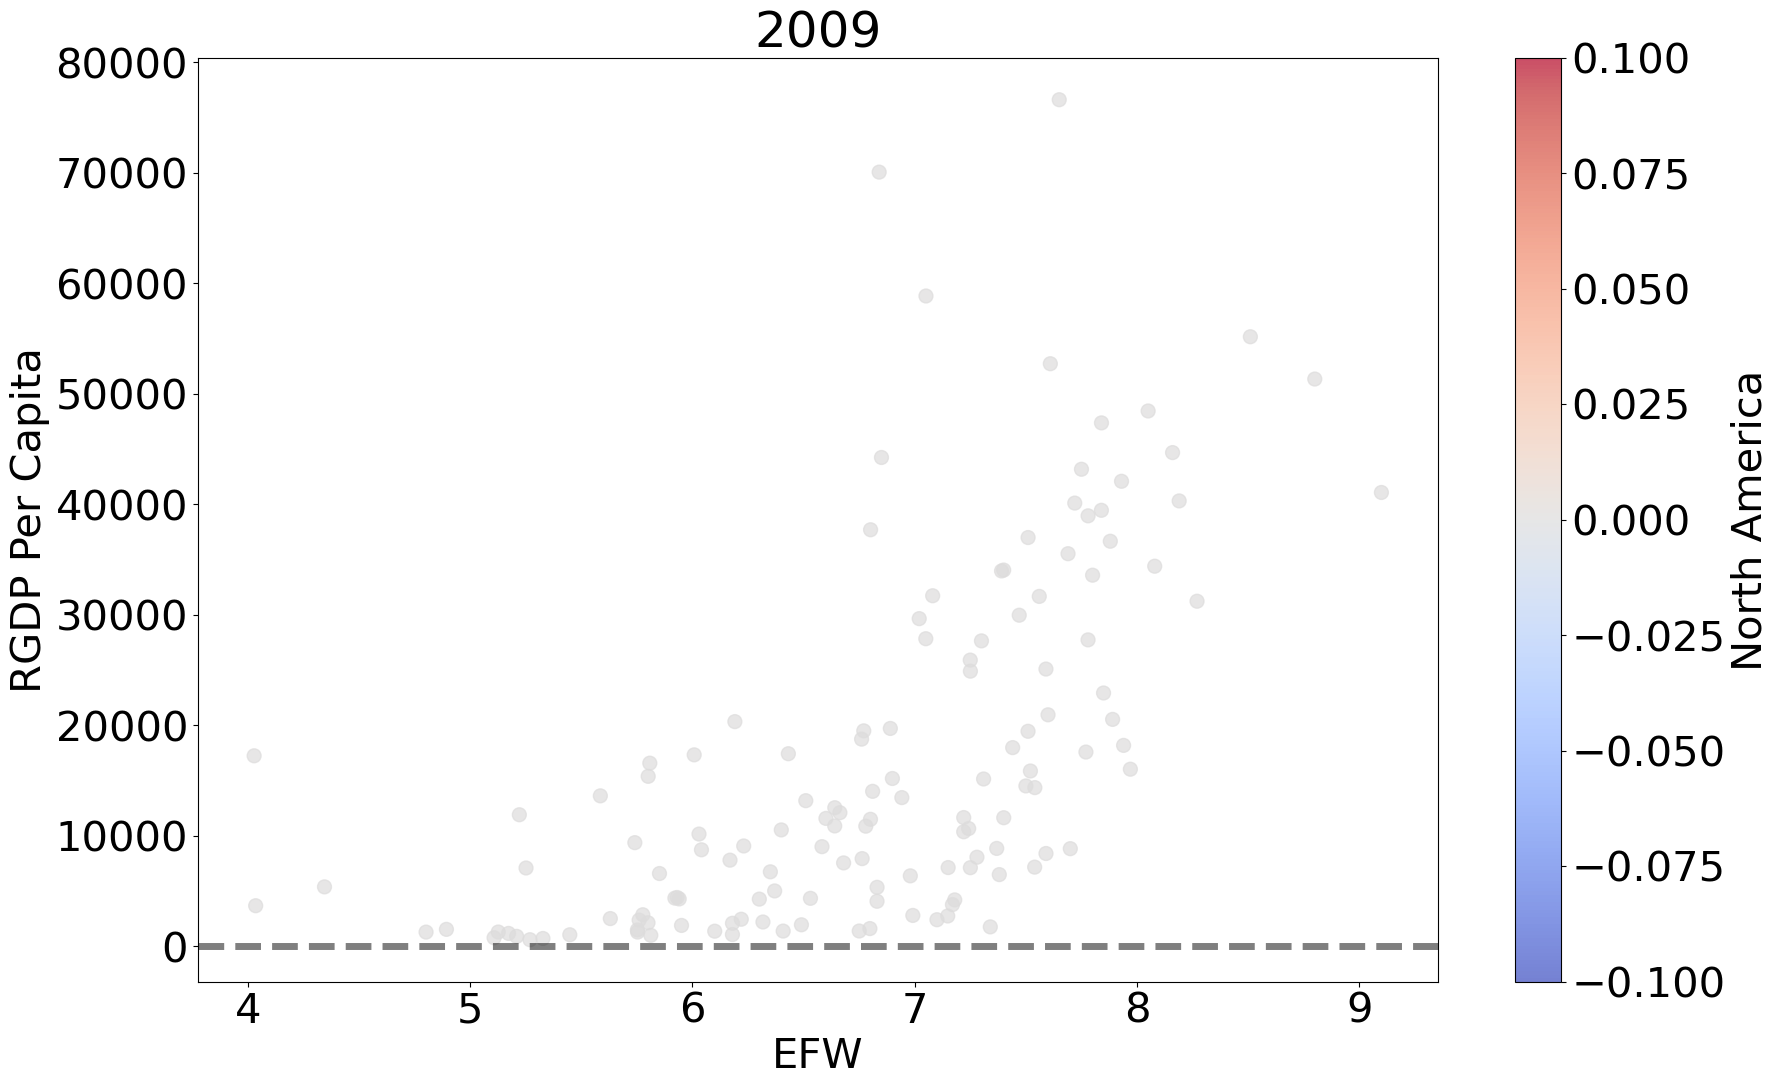

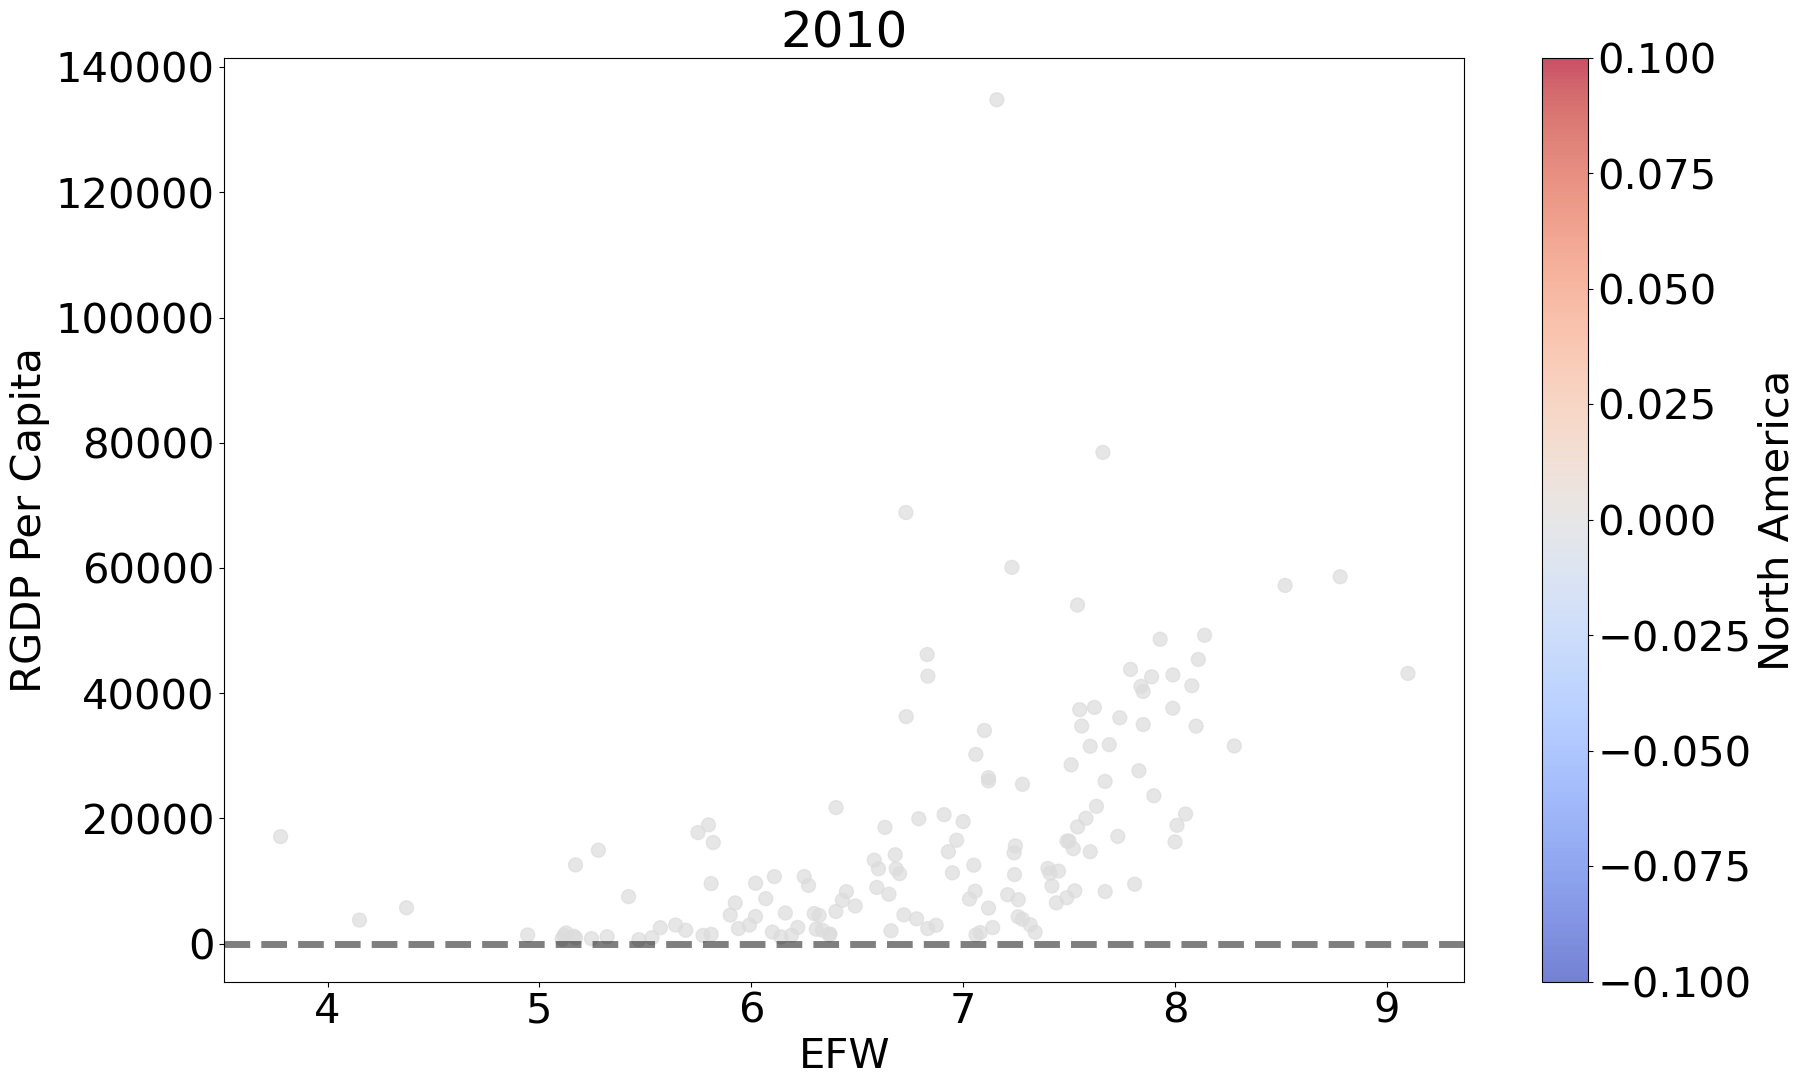

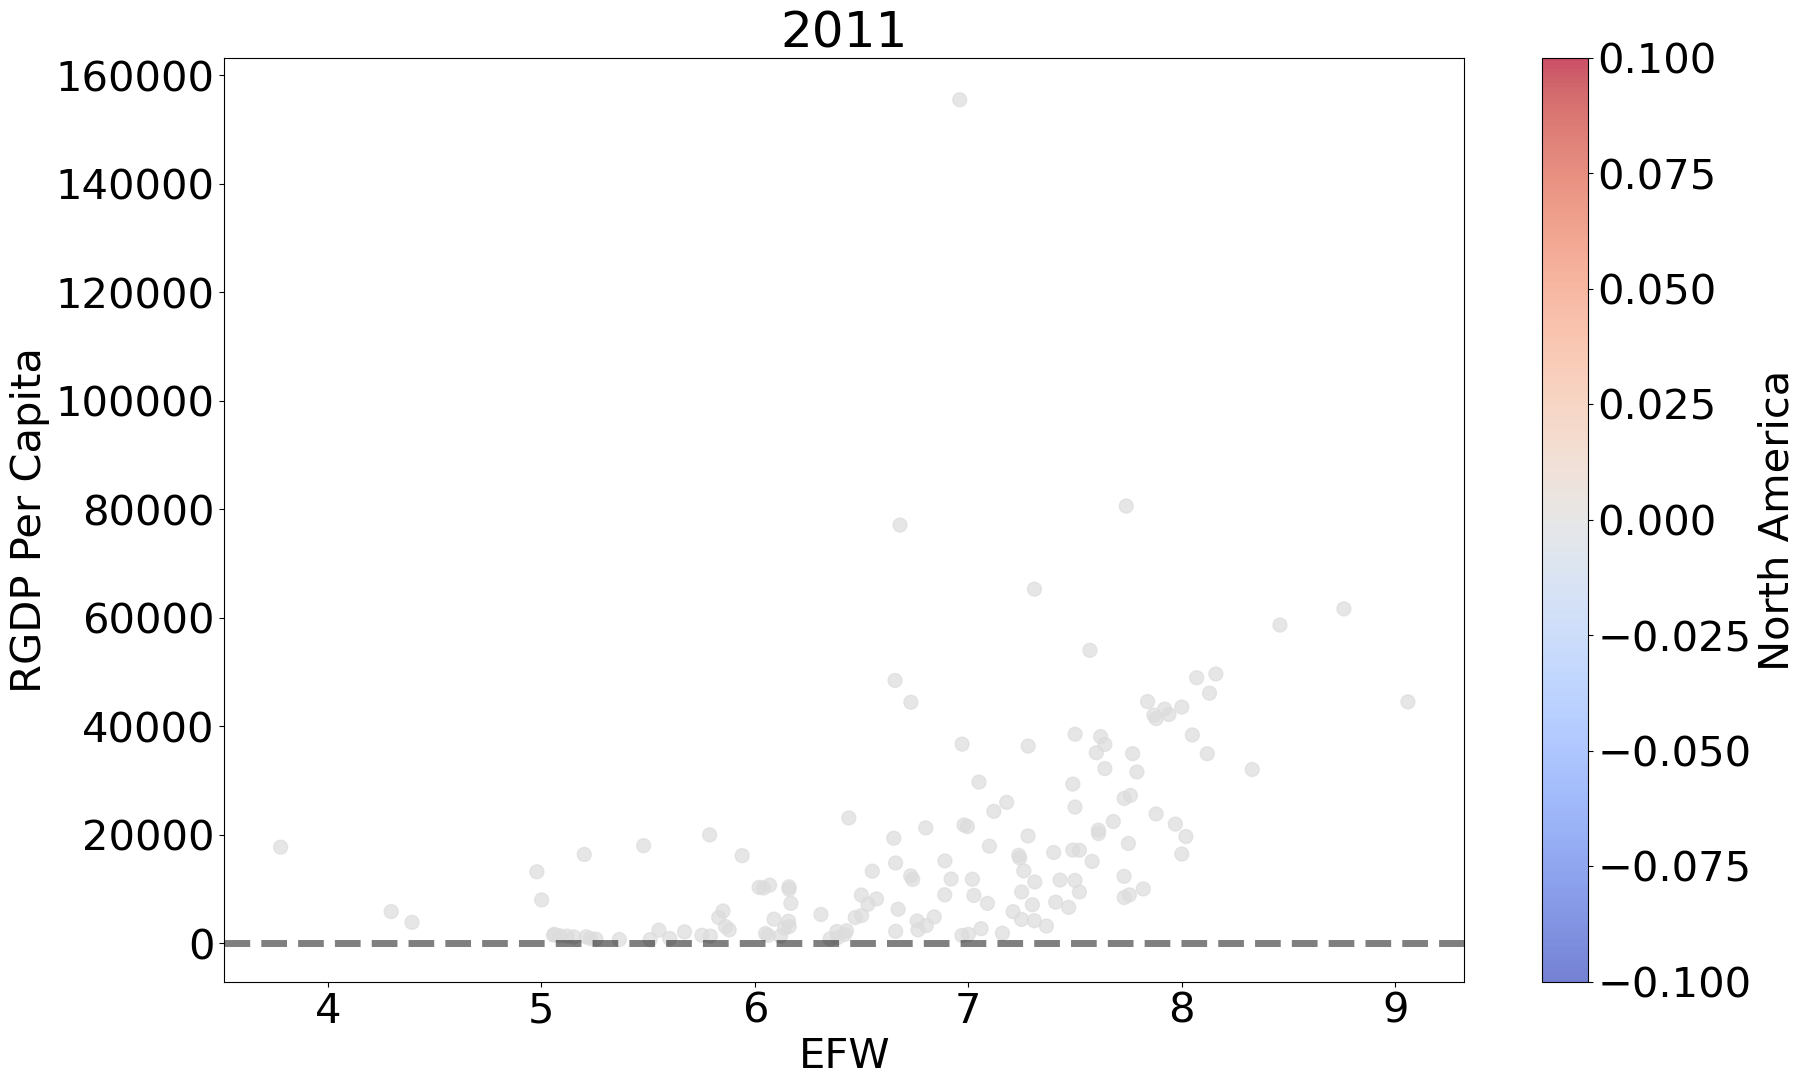

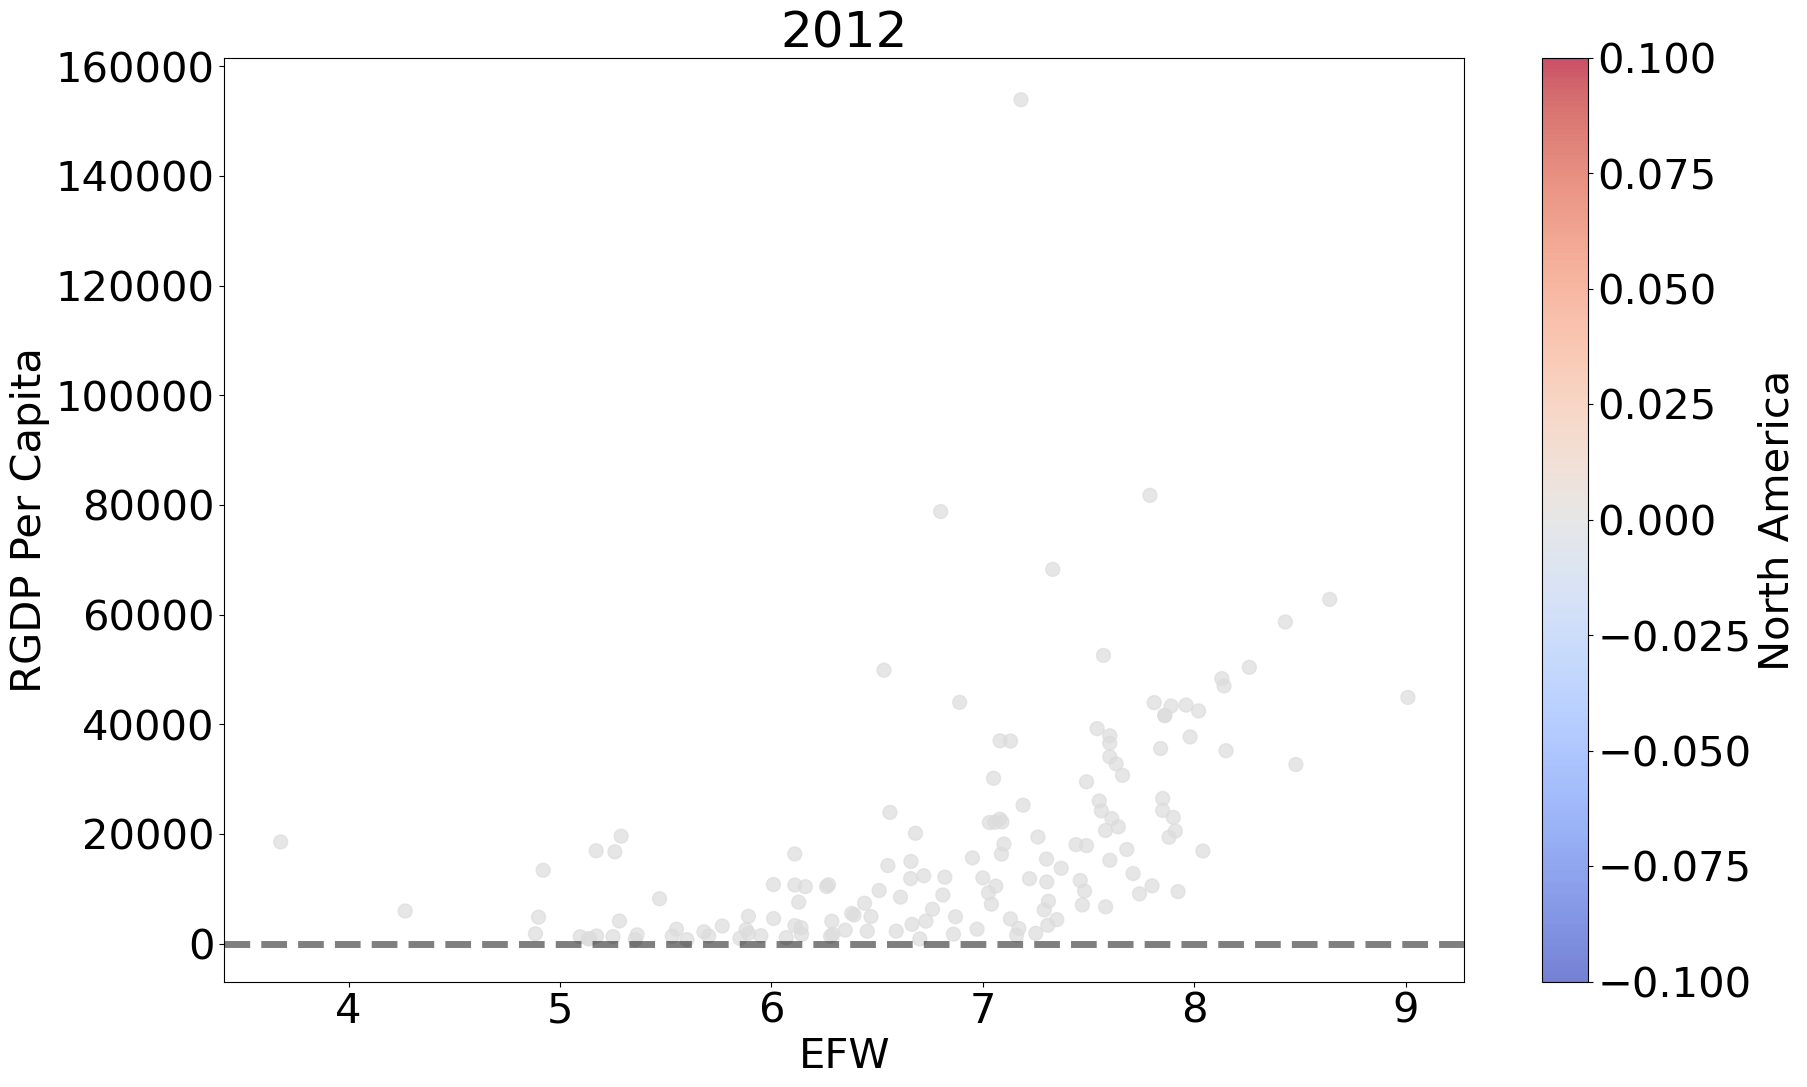

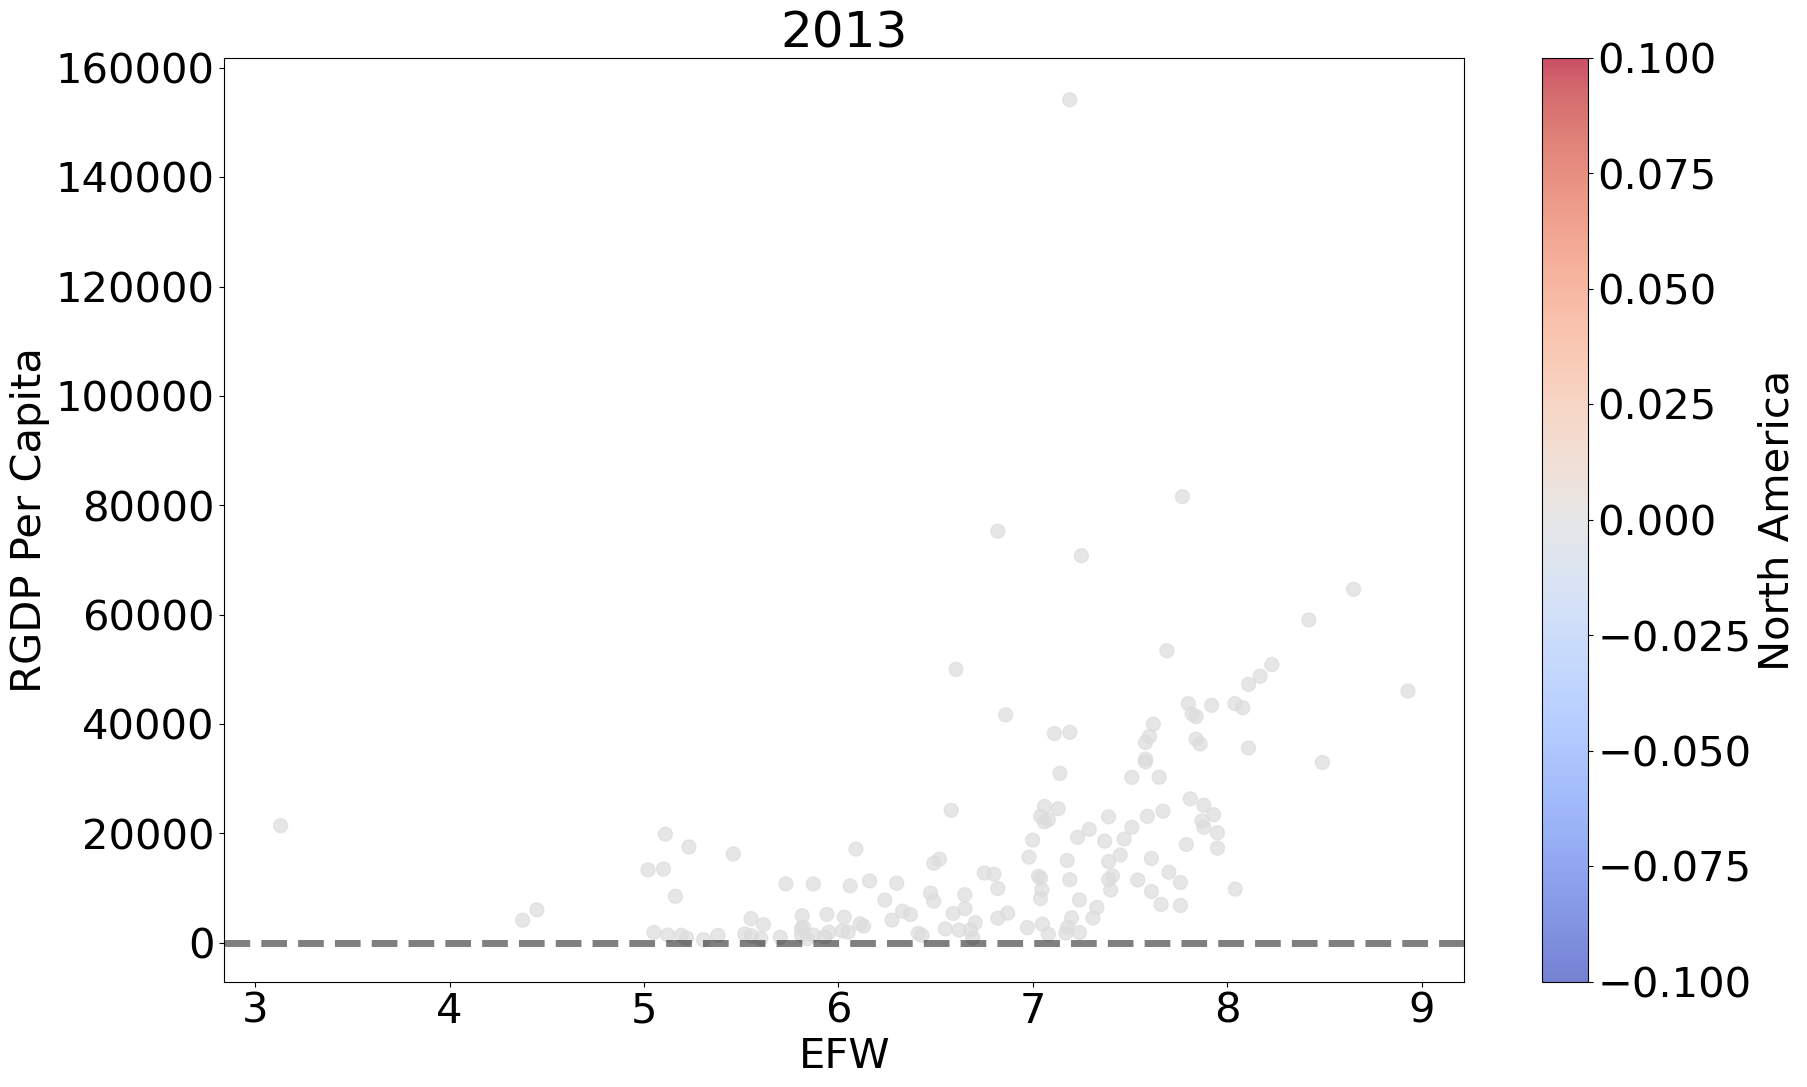

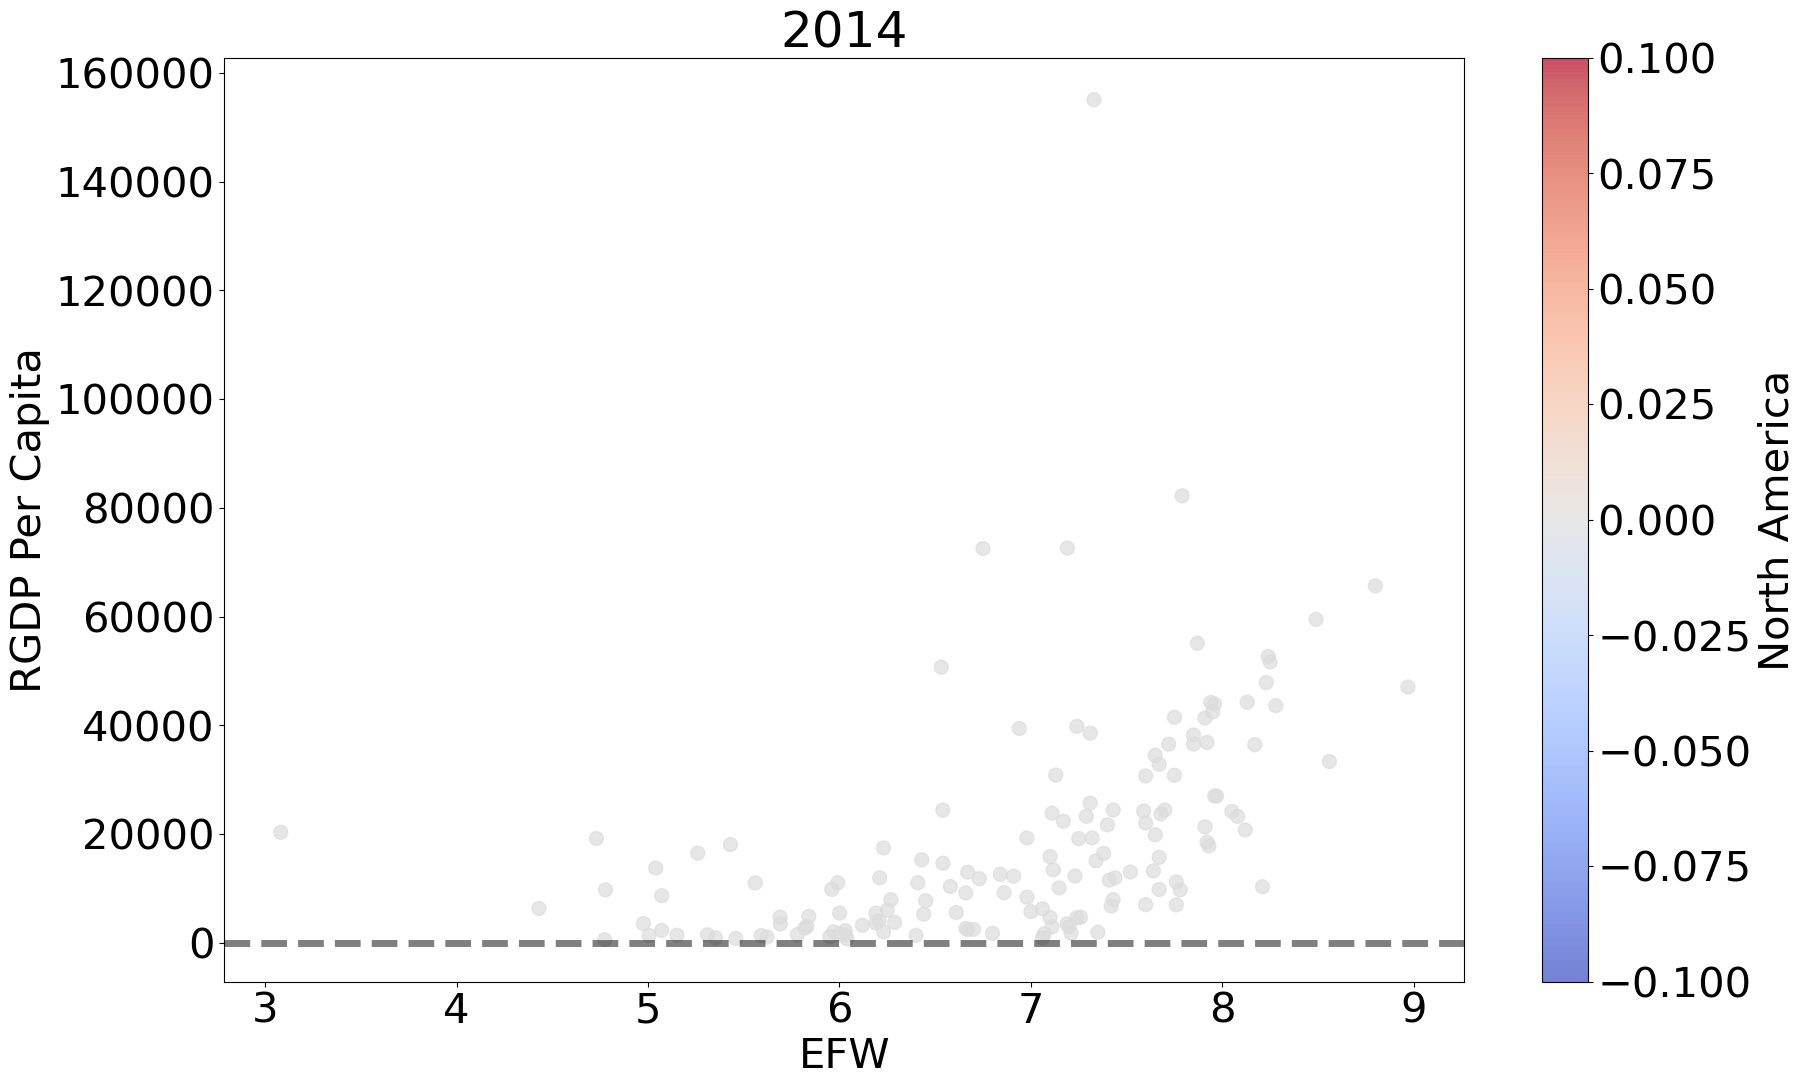

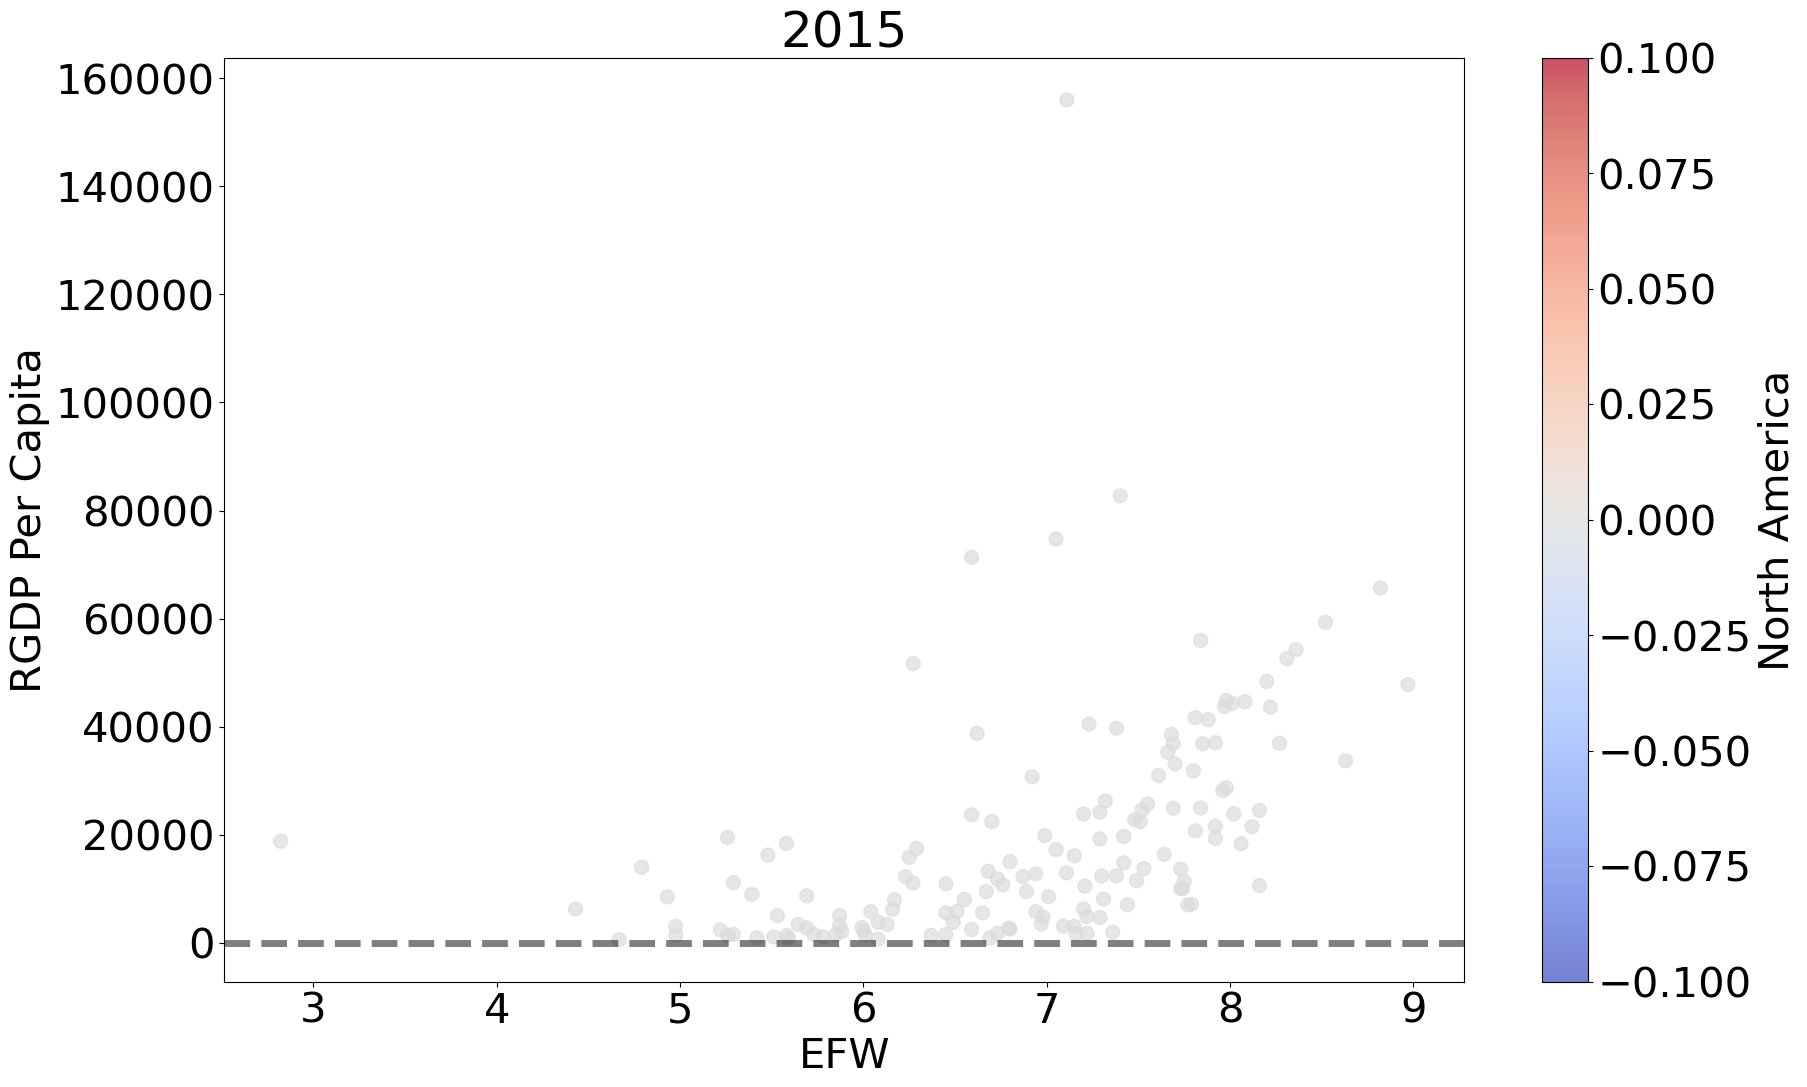

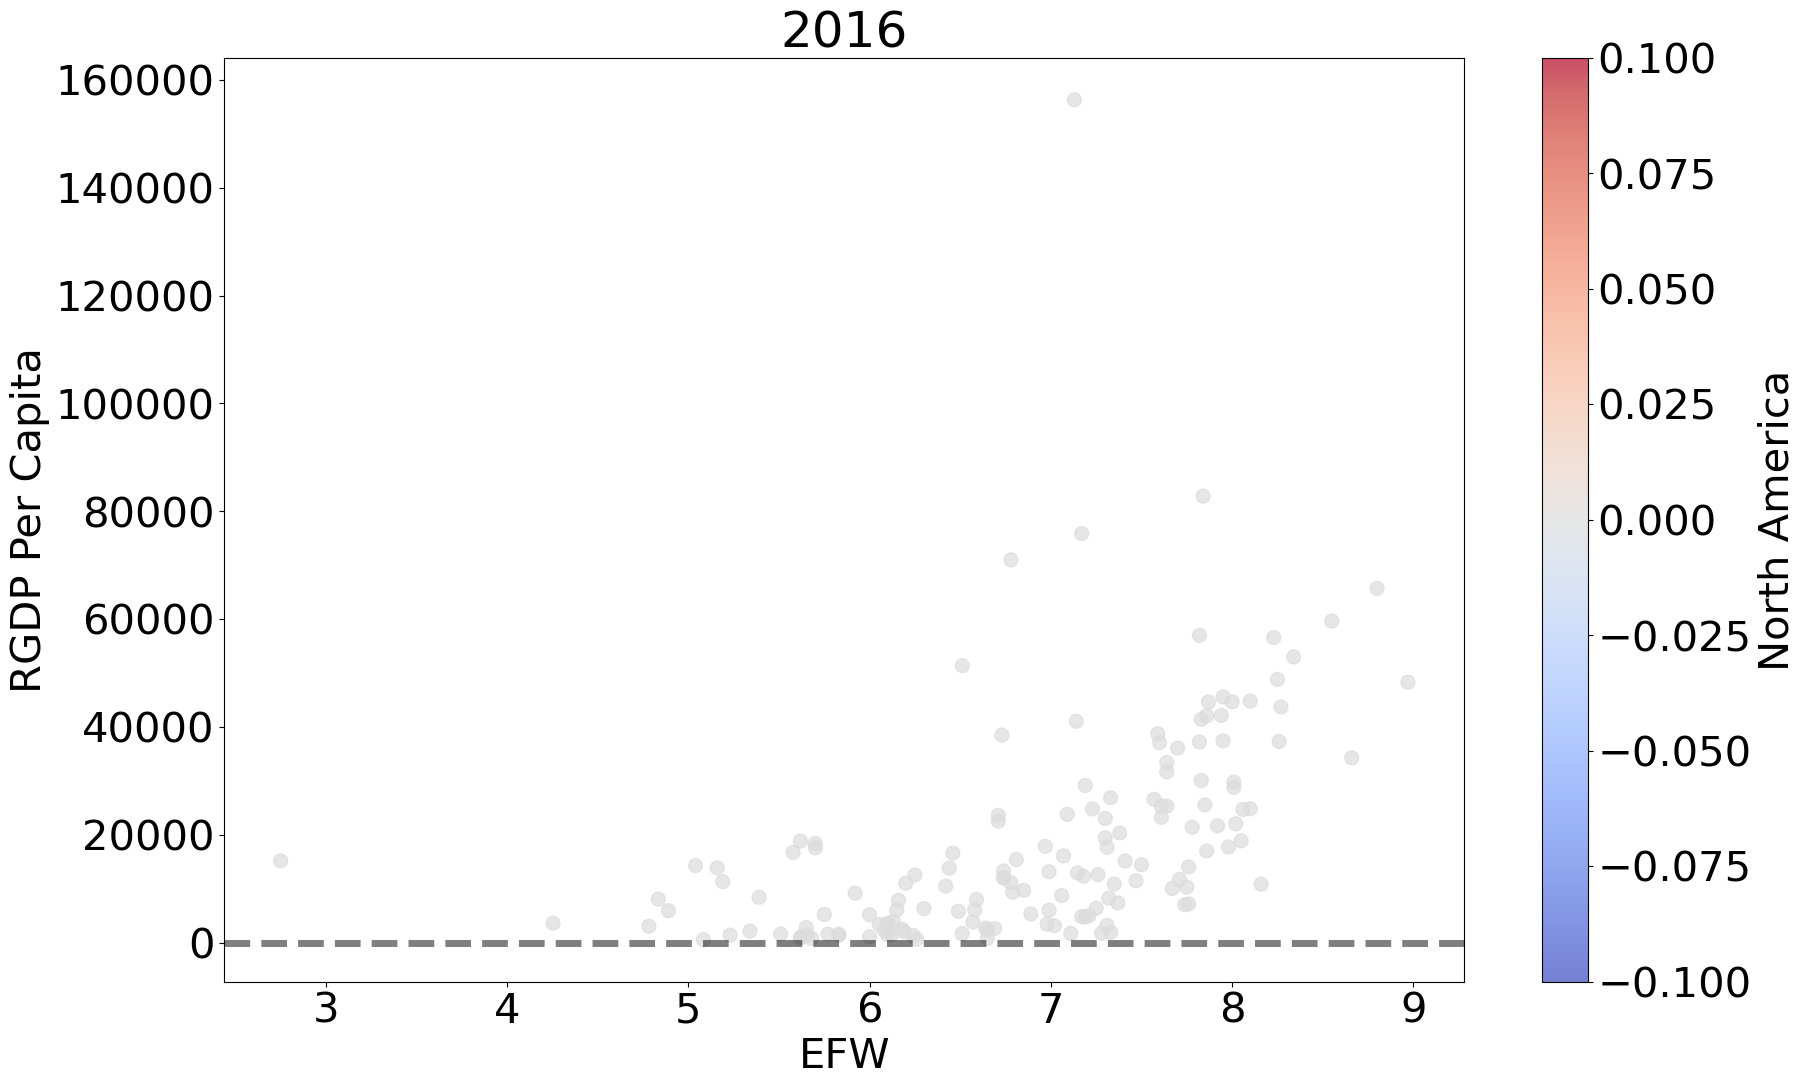

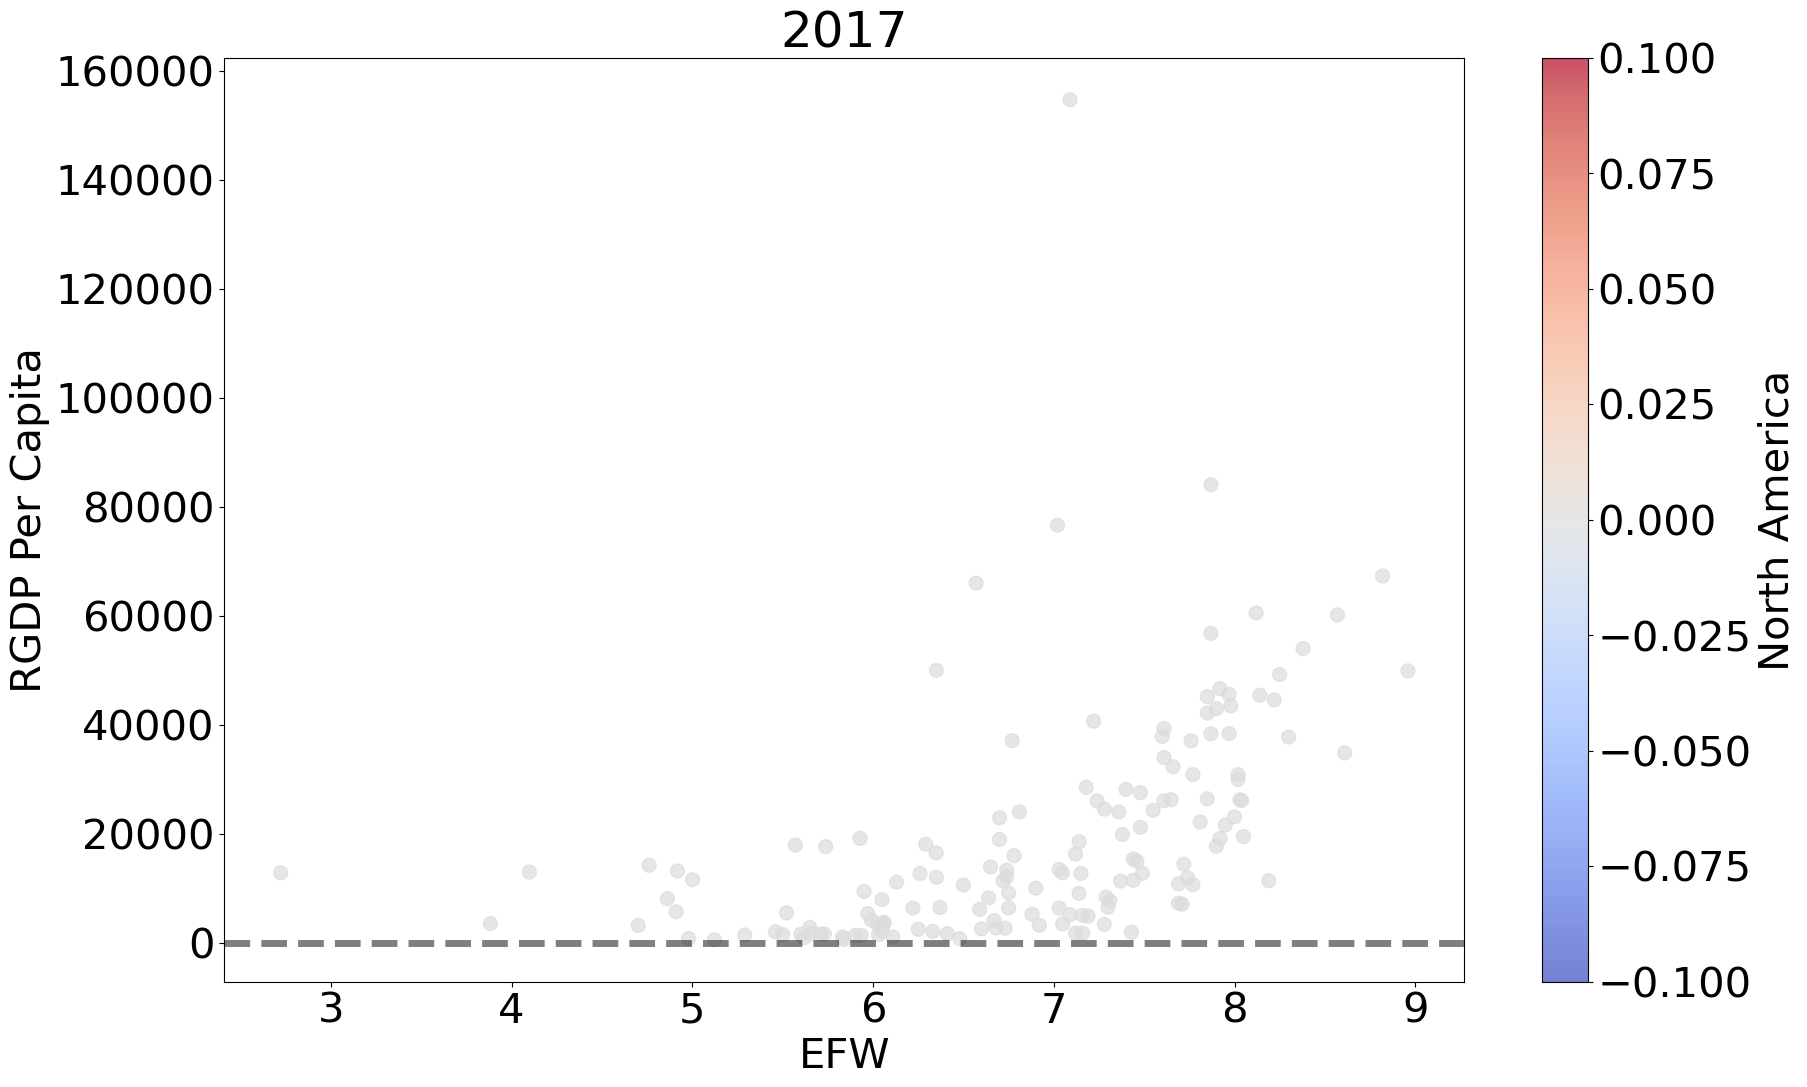

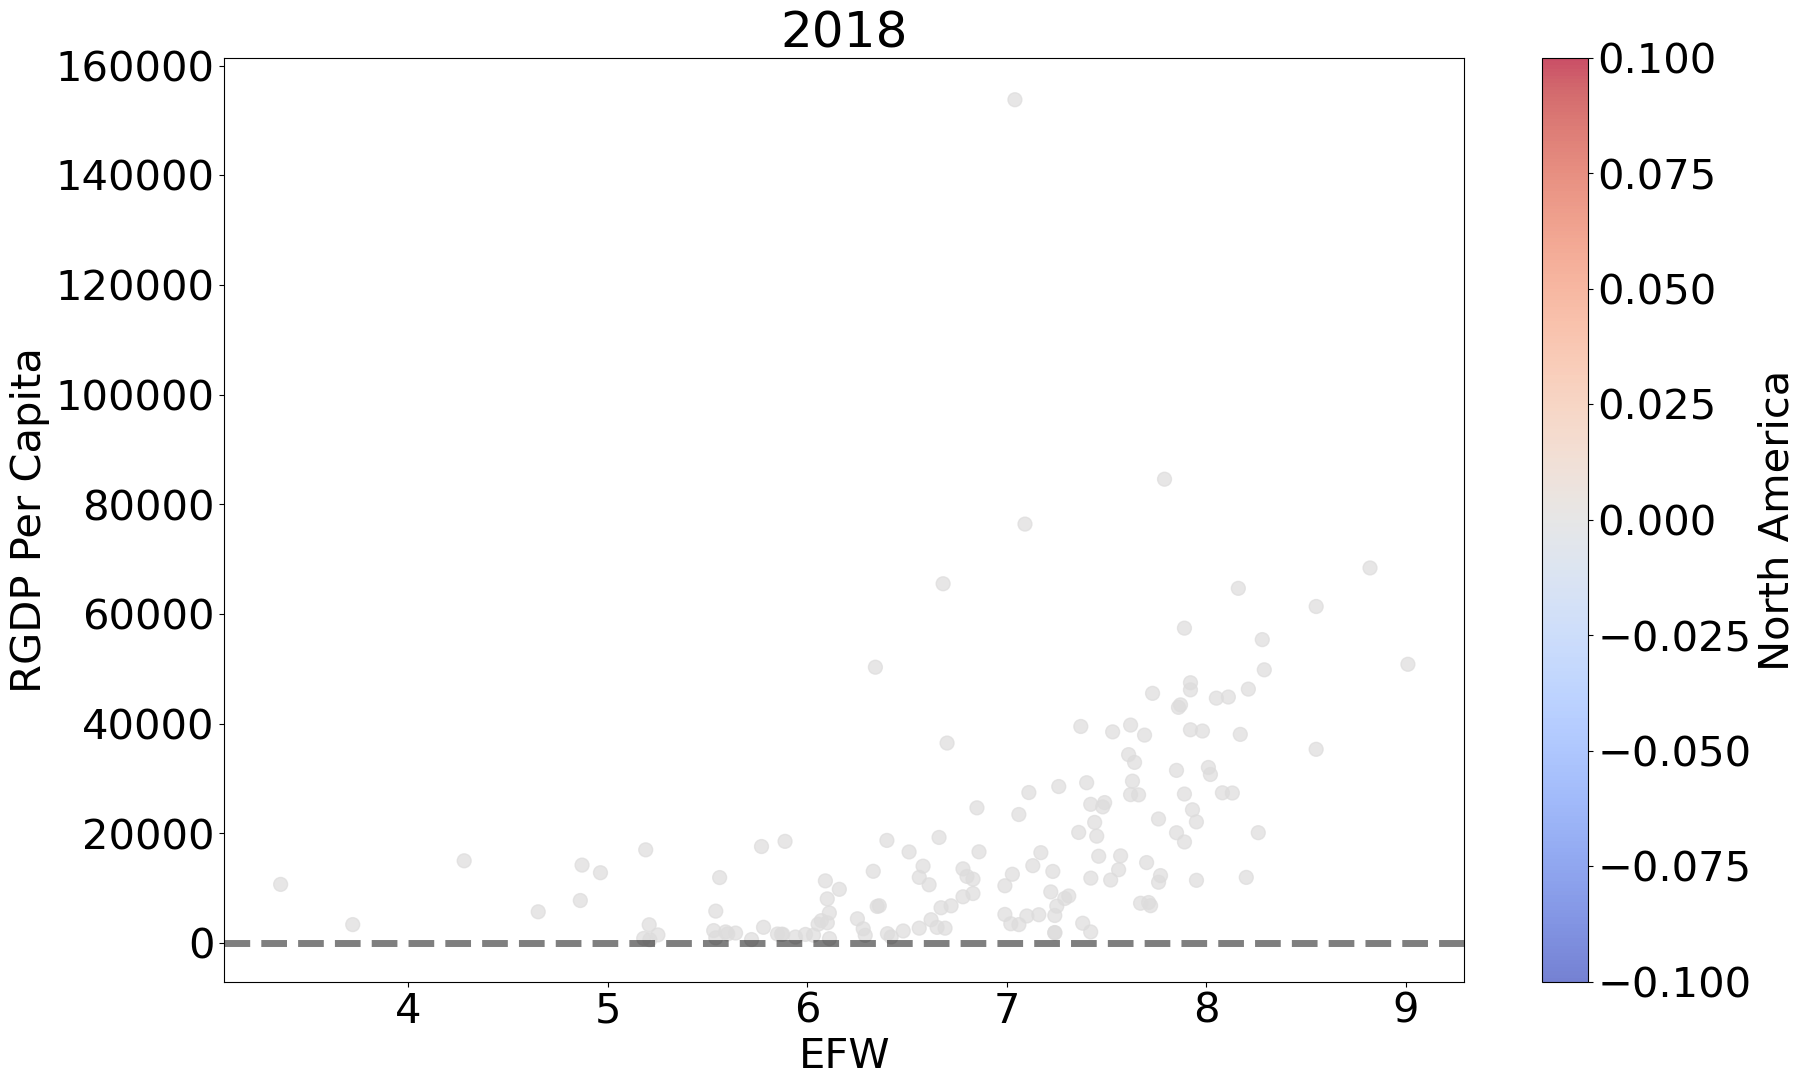

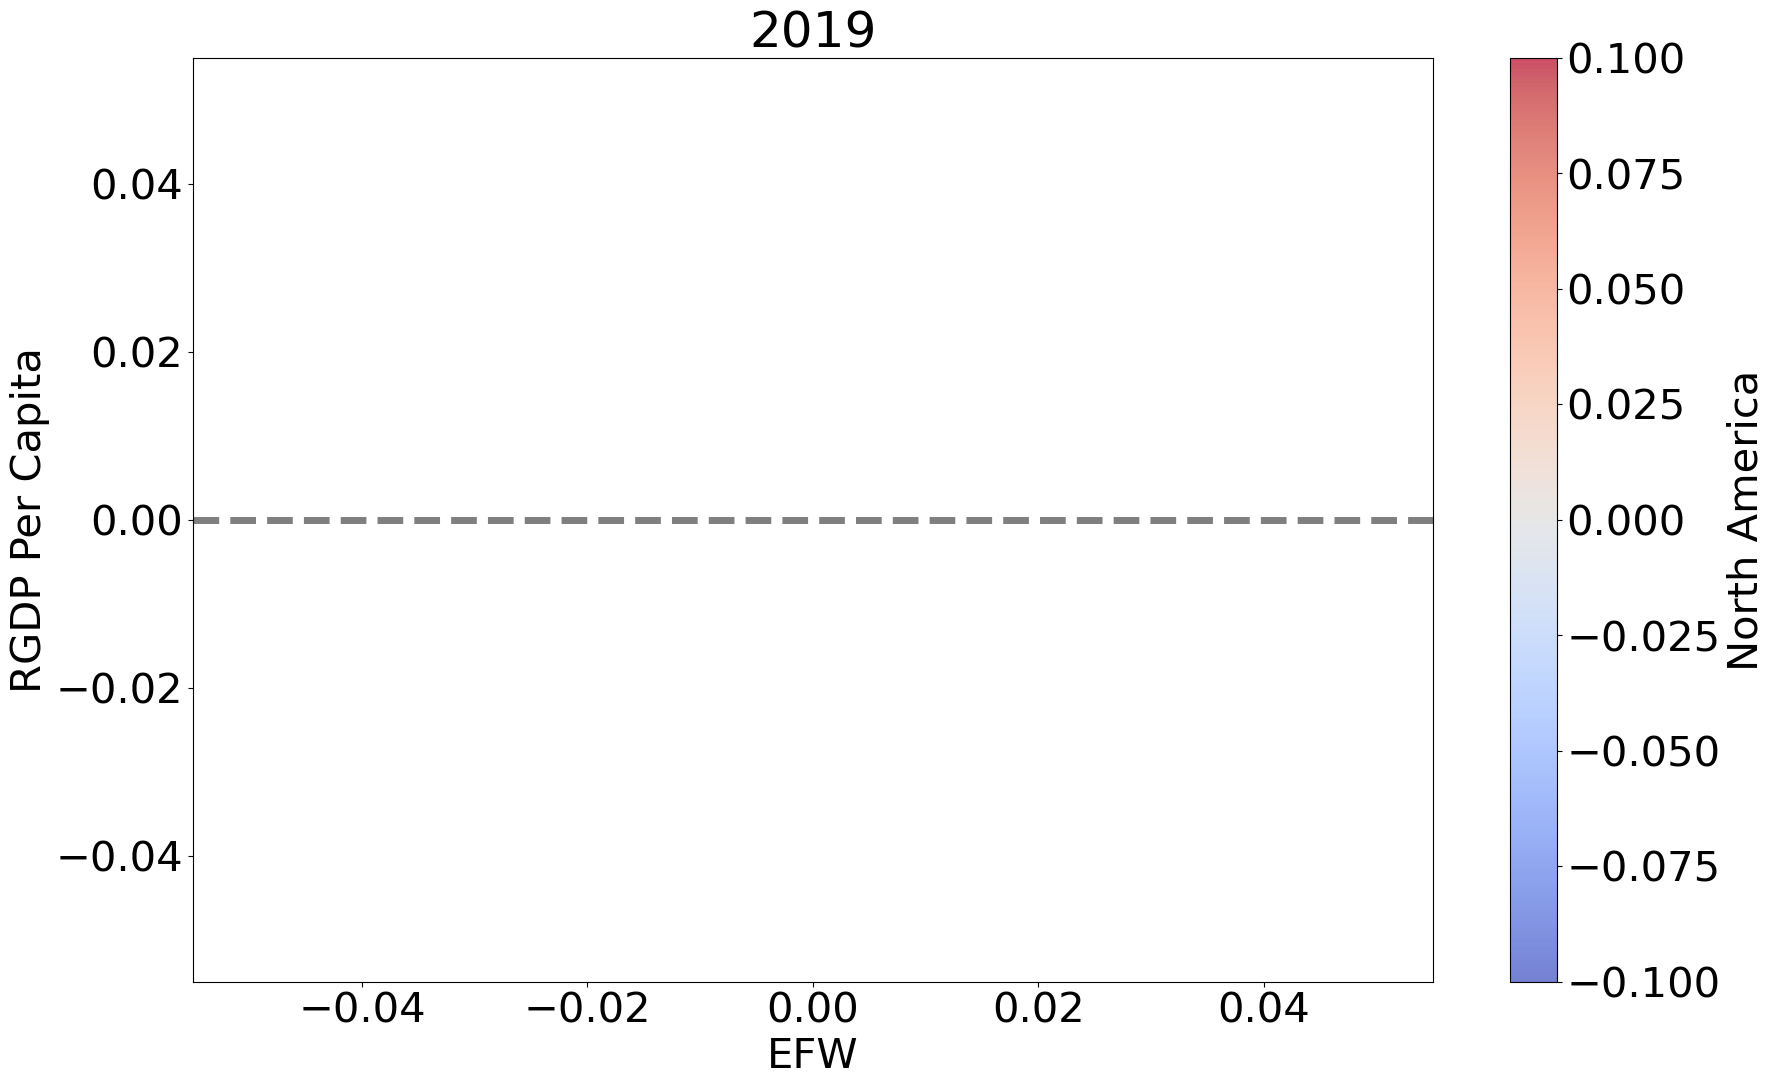

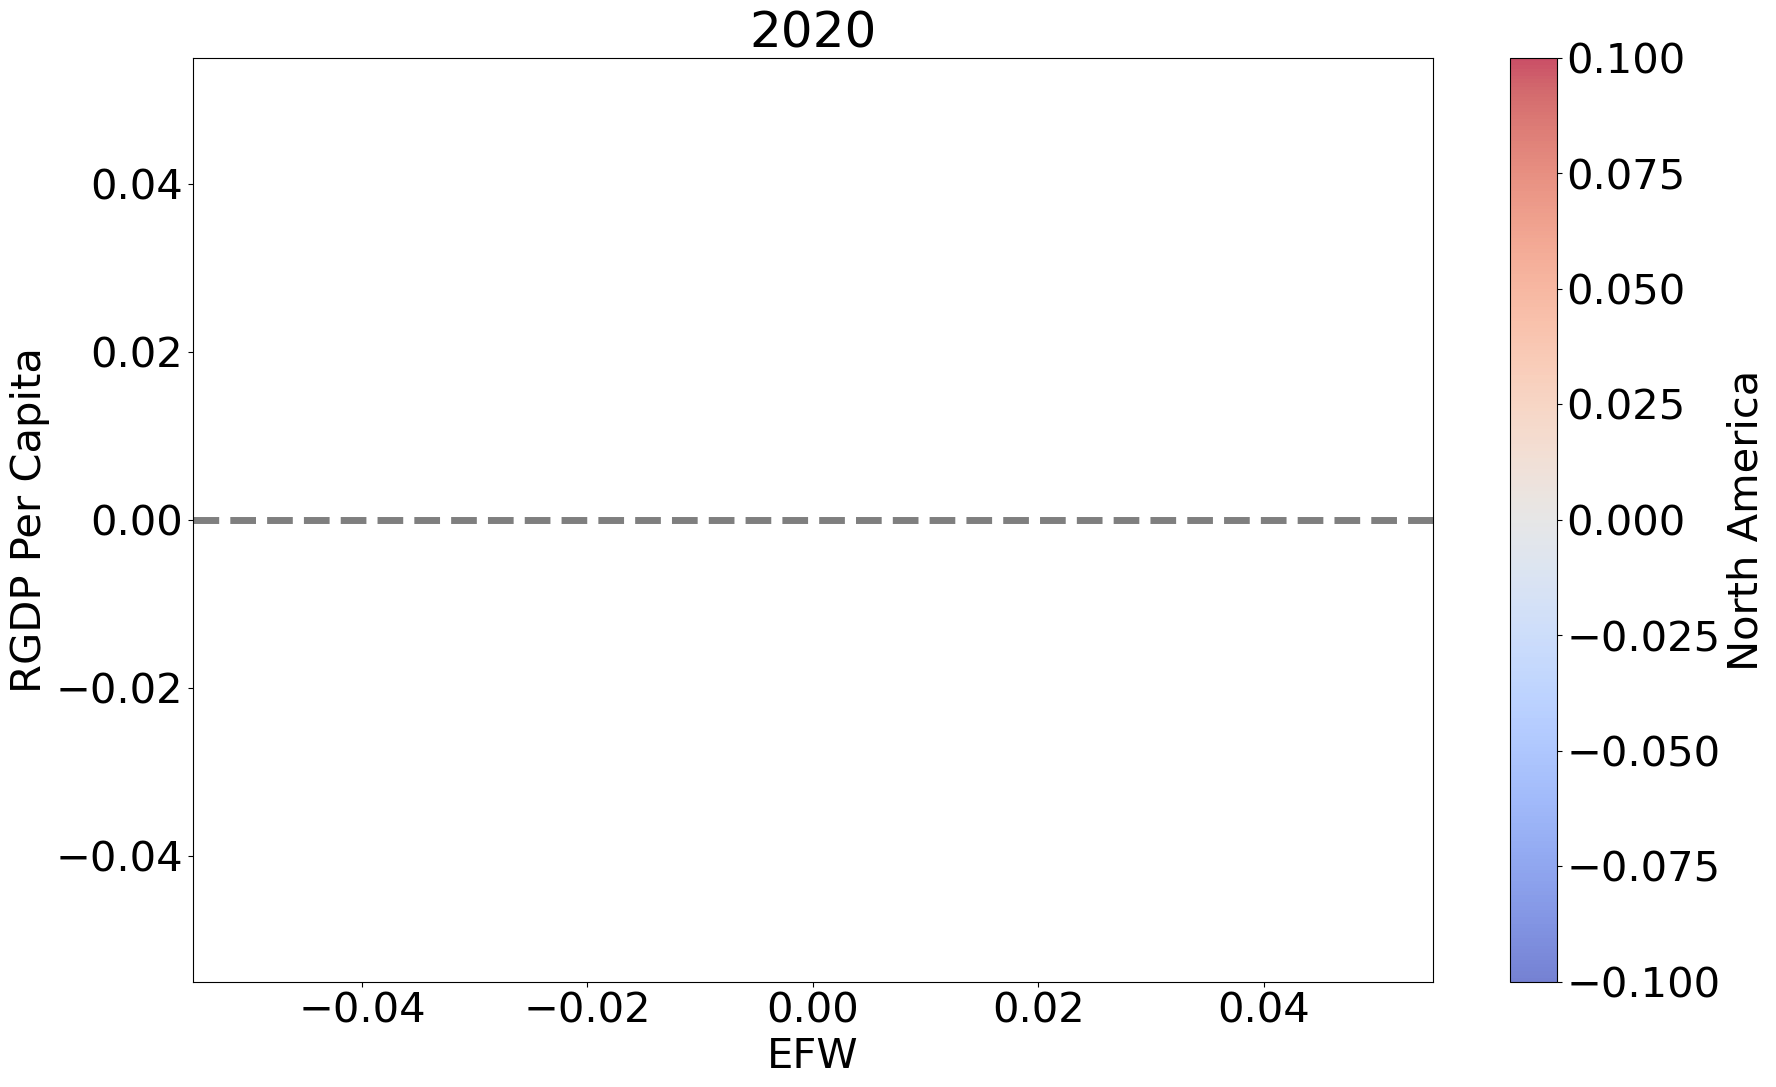

In [10]:
plt.rcParams.update({"font.size":30})
#year = "2000"

for year in years:
    
    plot_data = data[data.index.get_level_values("Year") == year]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW", 
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = "coolwarm",
                          s = 100,
                          alpha = .7,
                          ax = ax)
    ax.set_title(str(year)[:4])
    # adds a horizontal dash line at 0
    ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)

C:\Users\adamp\AppData\Local\Temp\ipykernel_17168\1399404257.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (20,12))


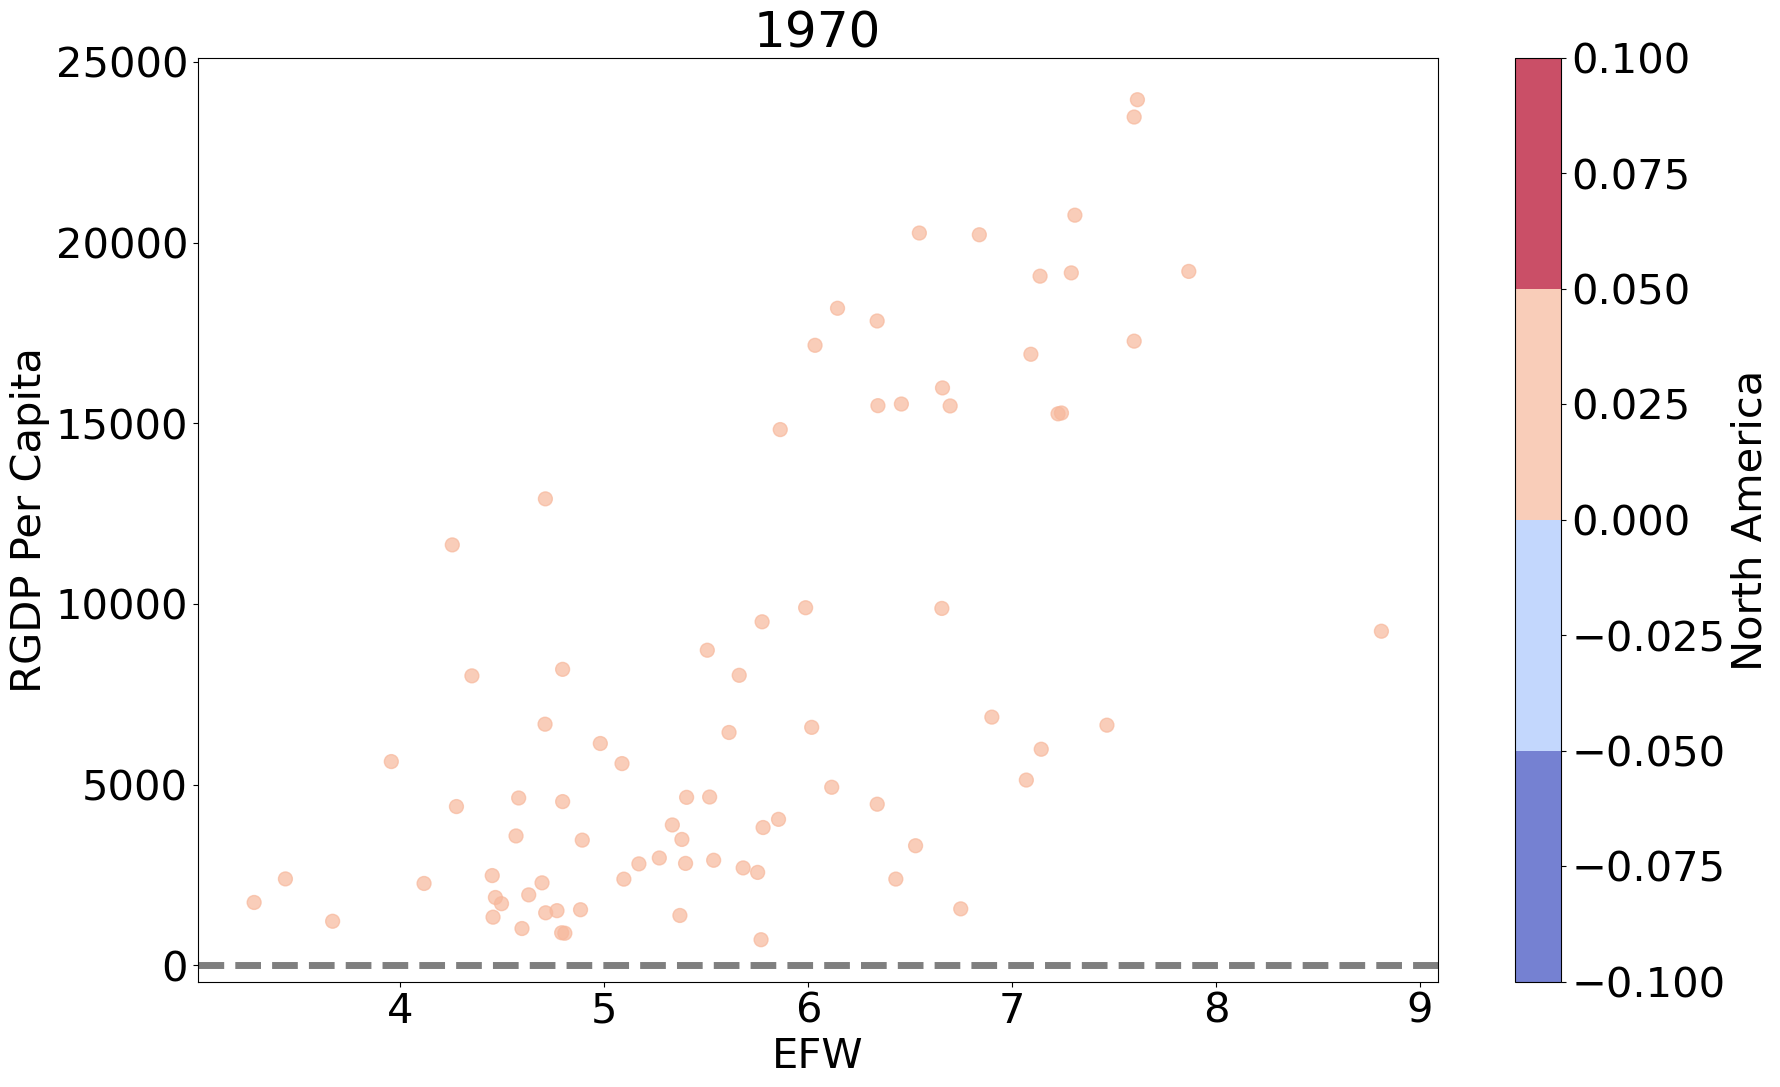

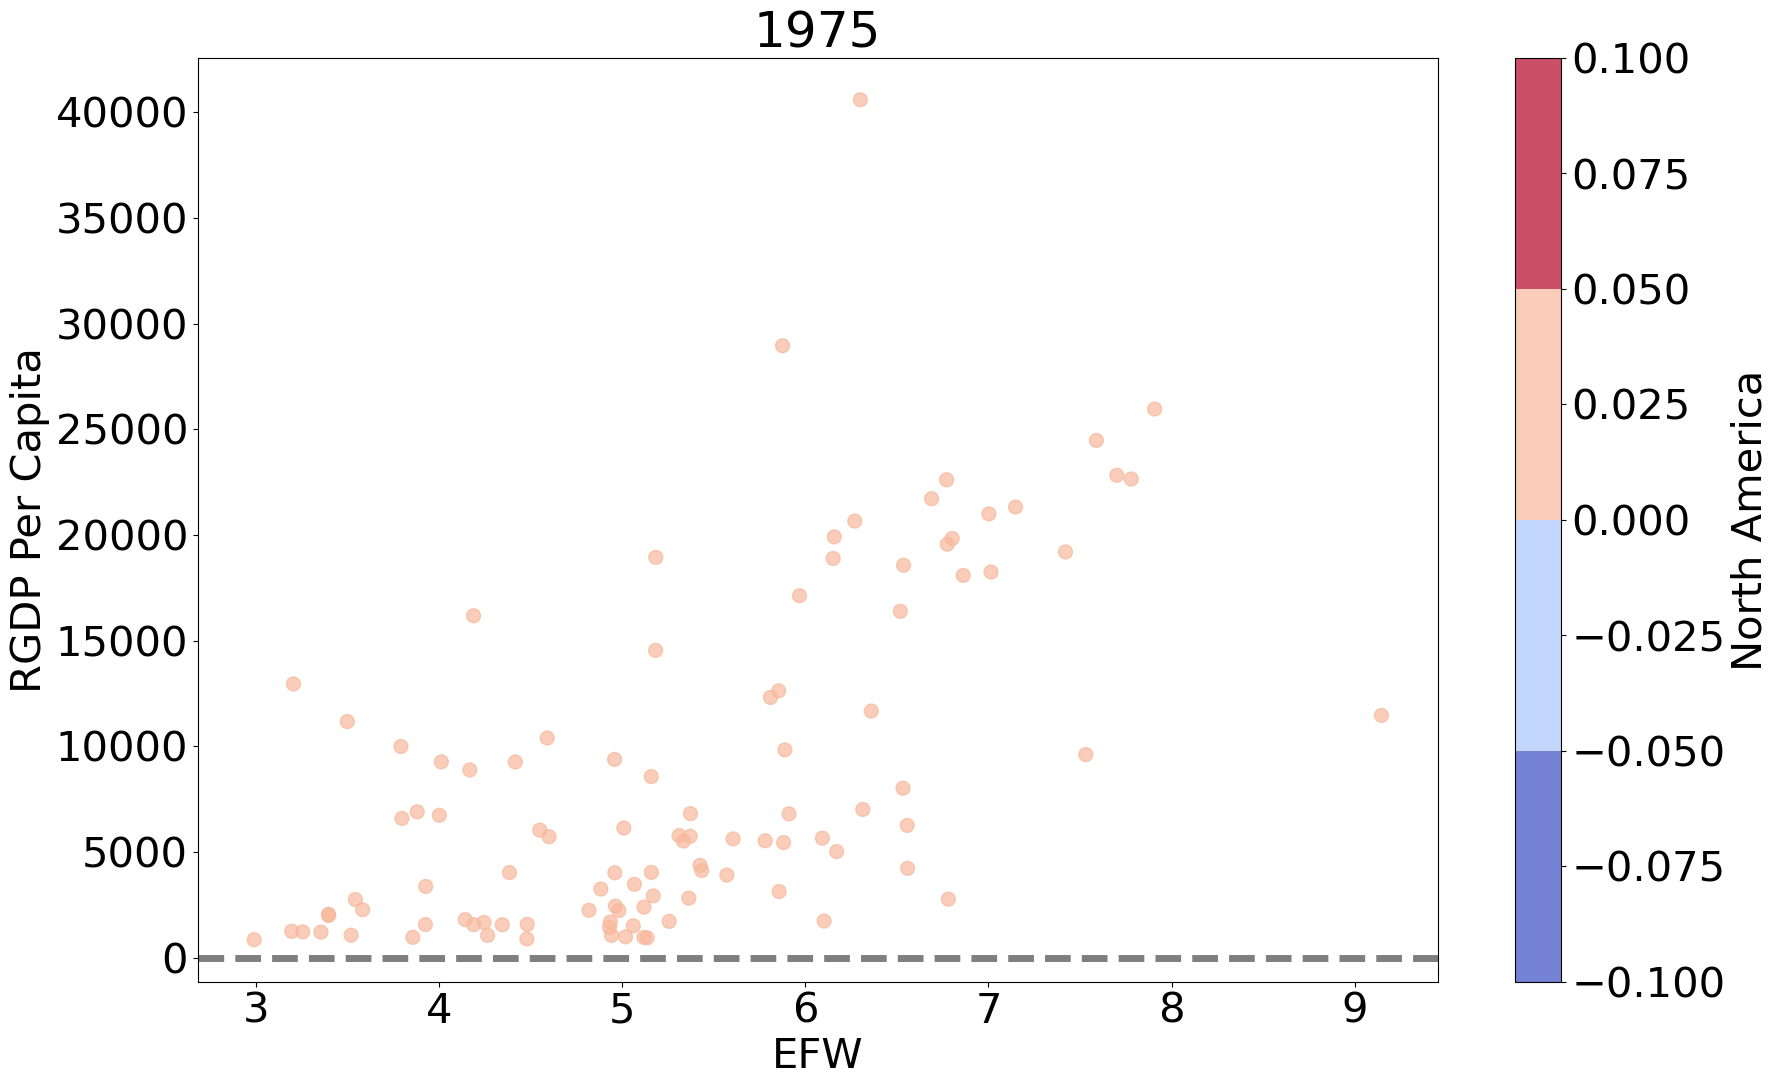

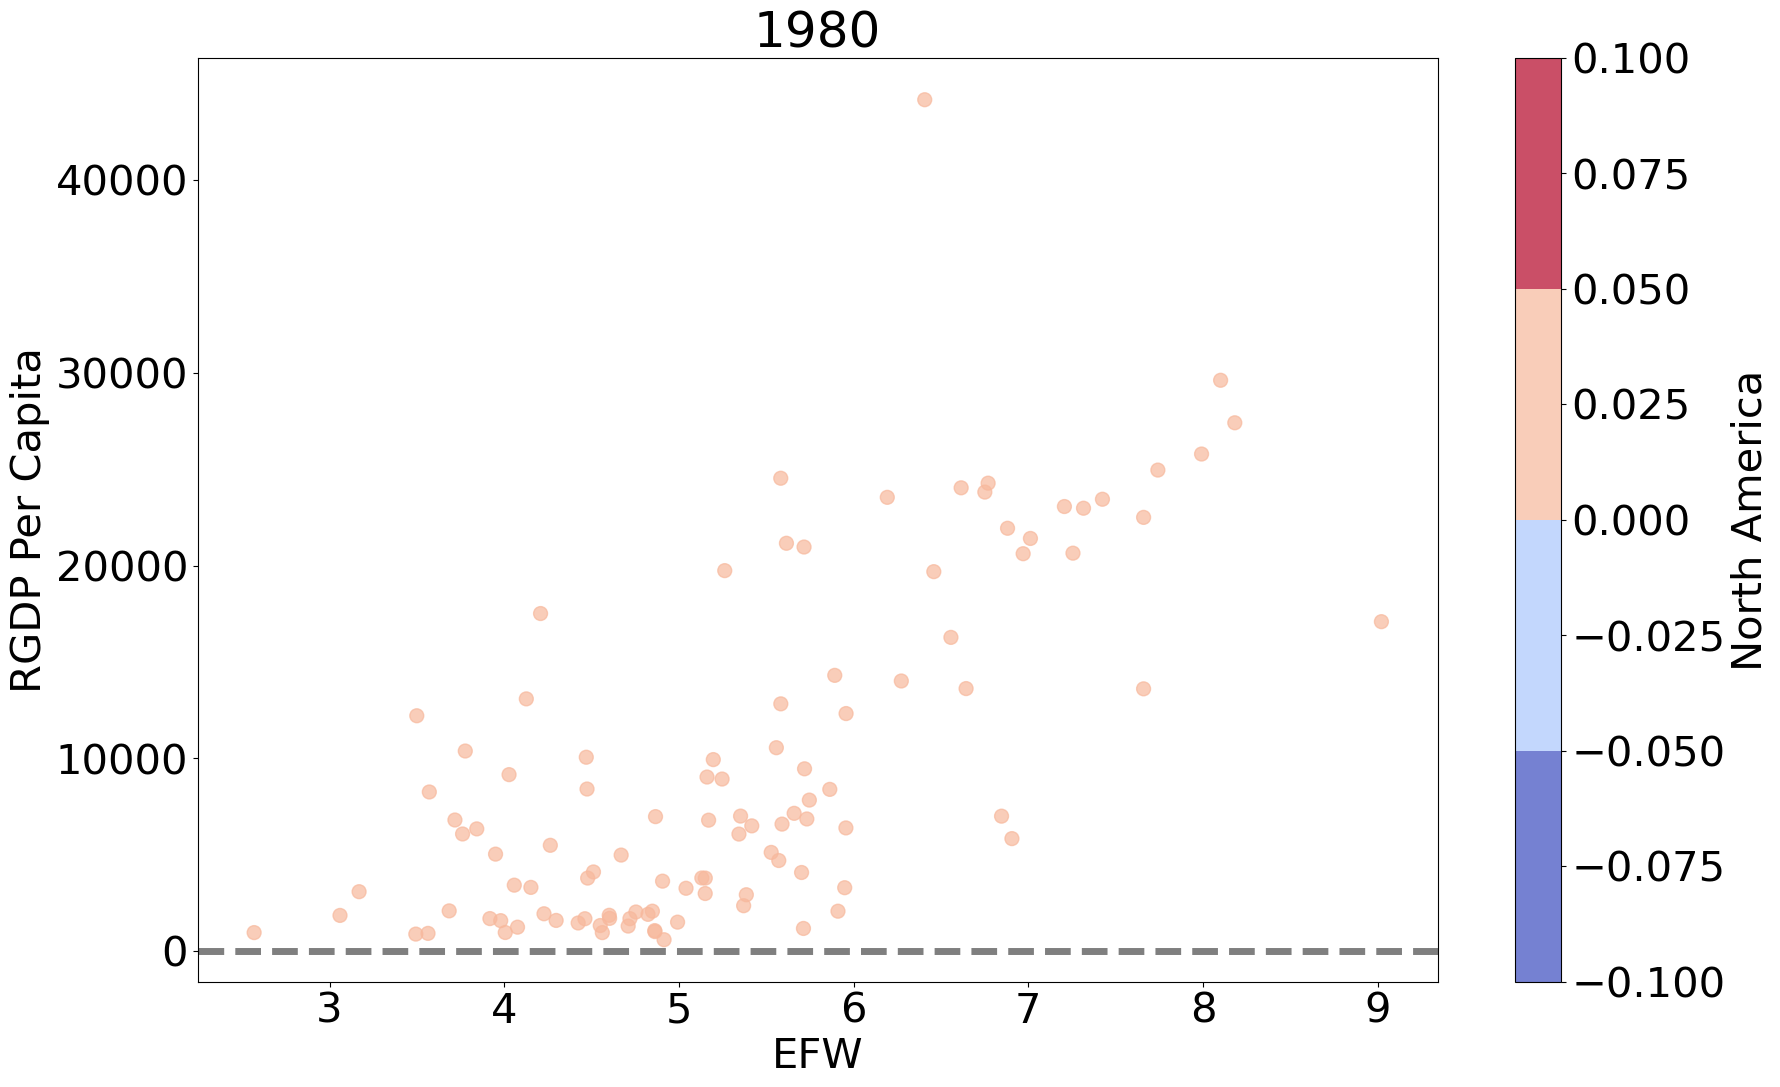

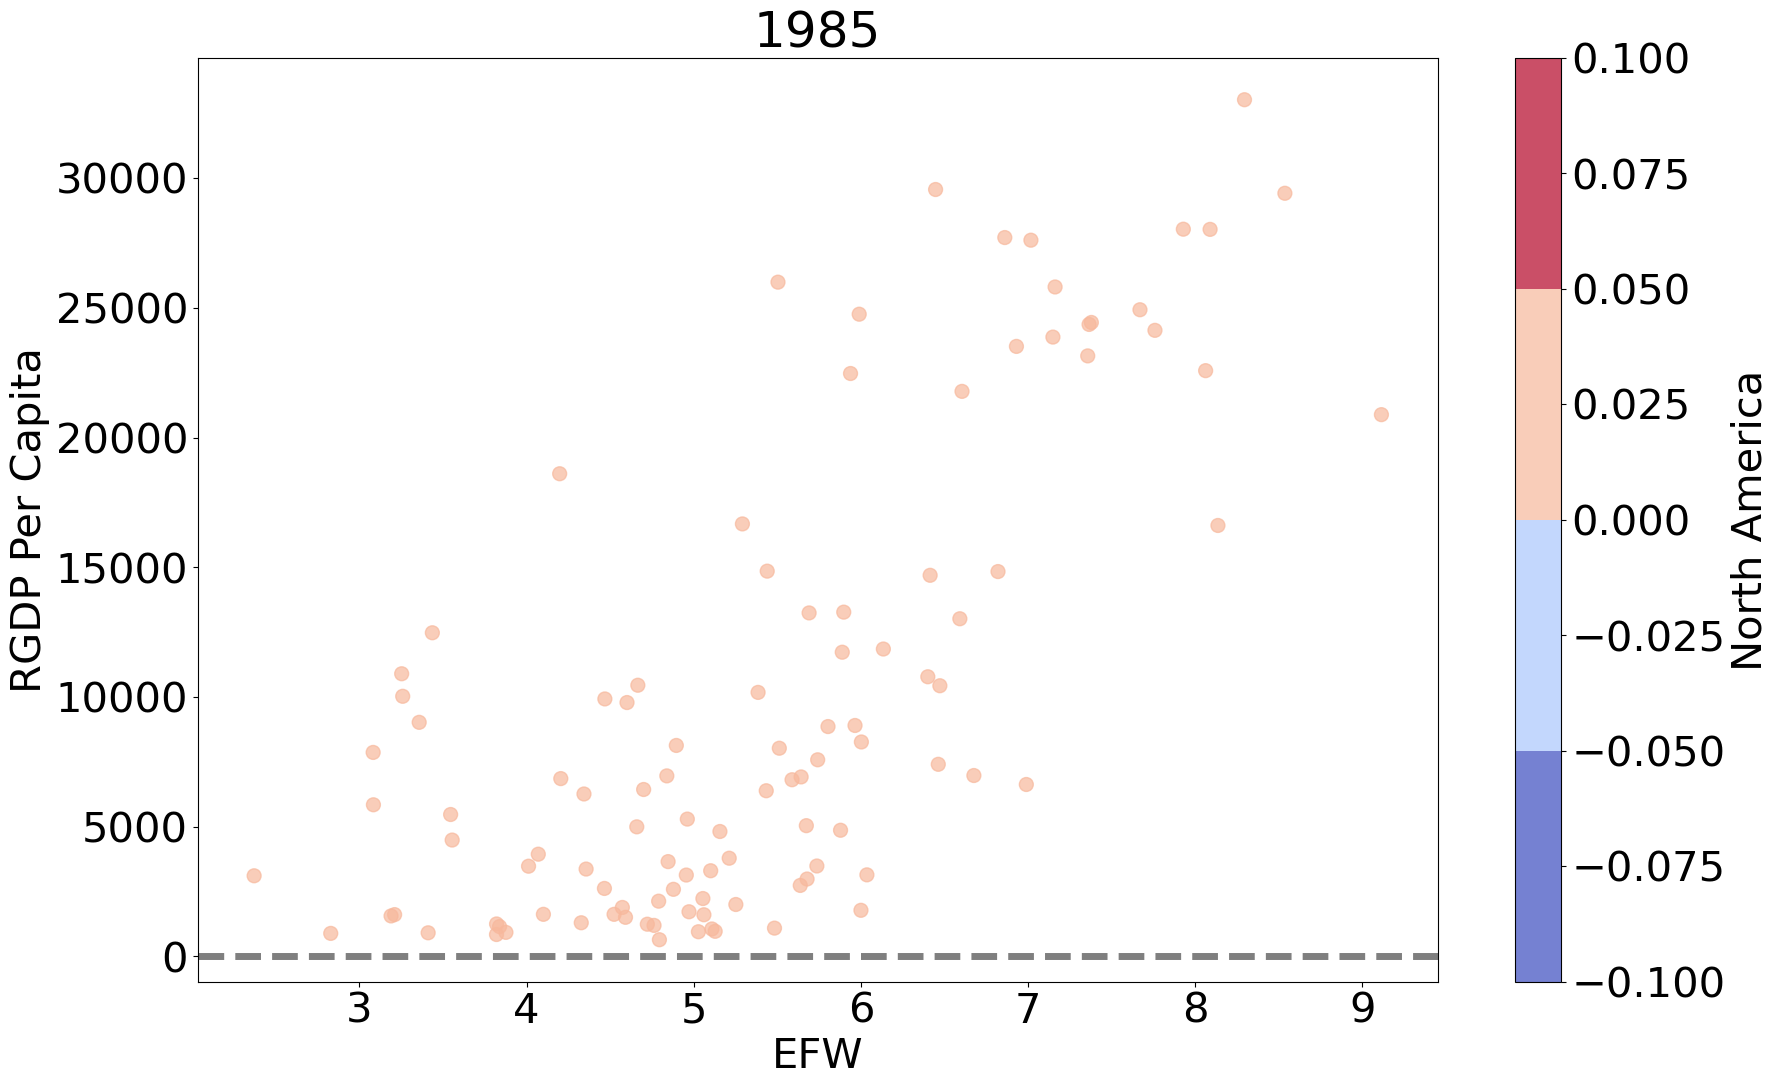

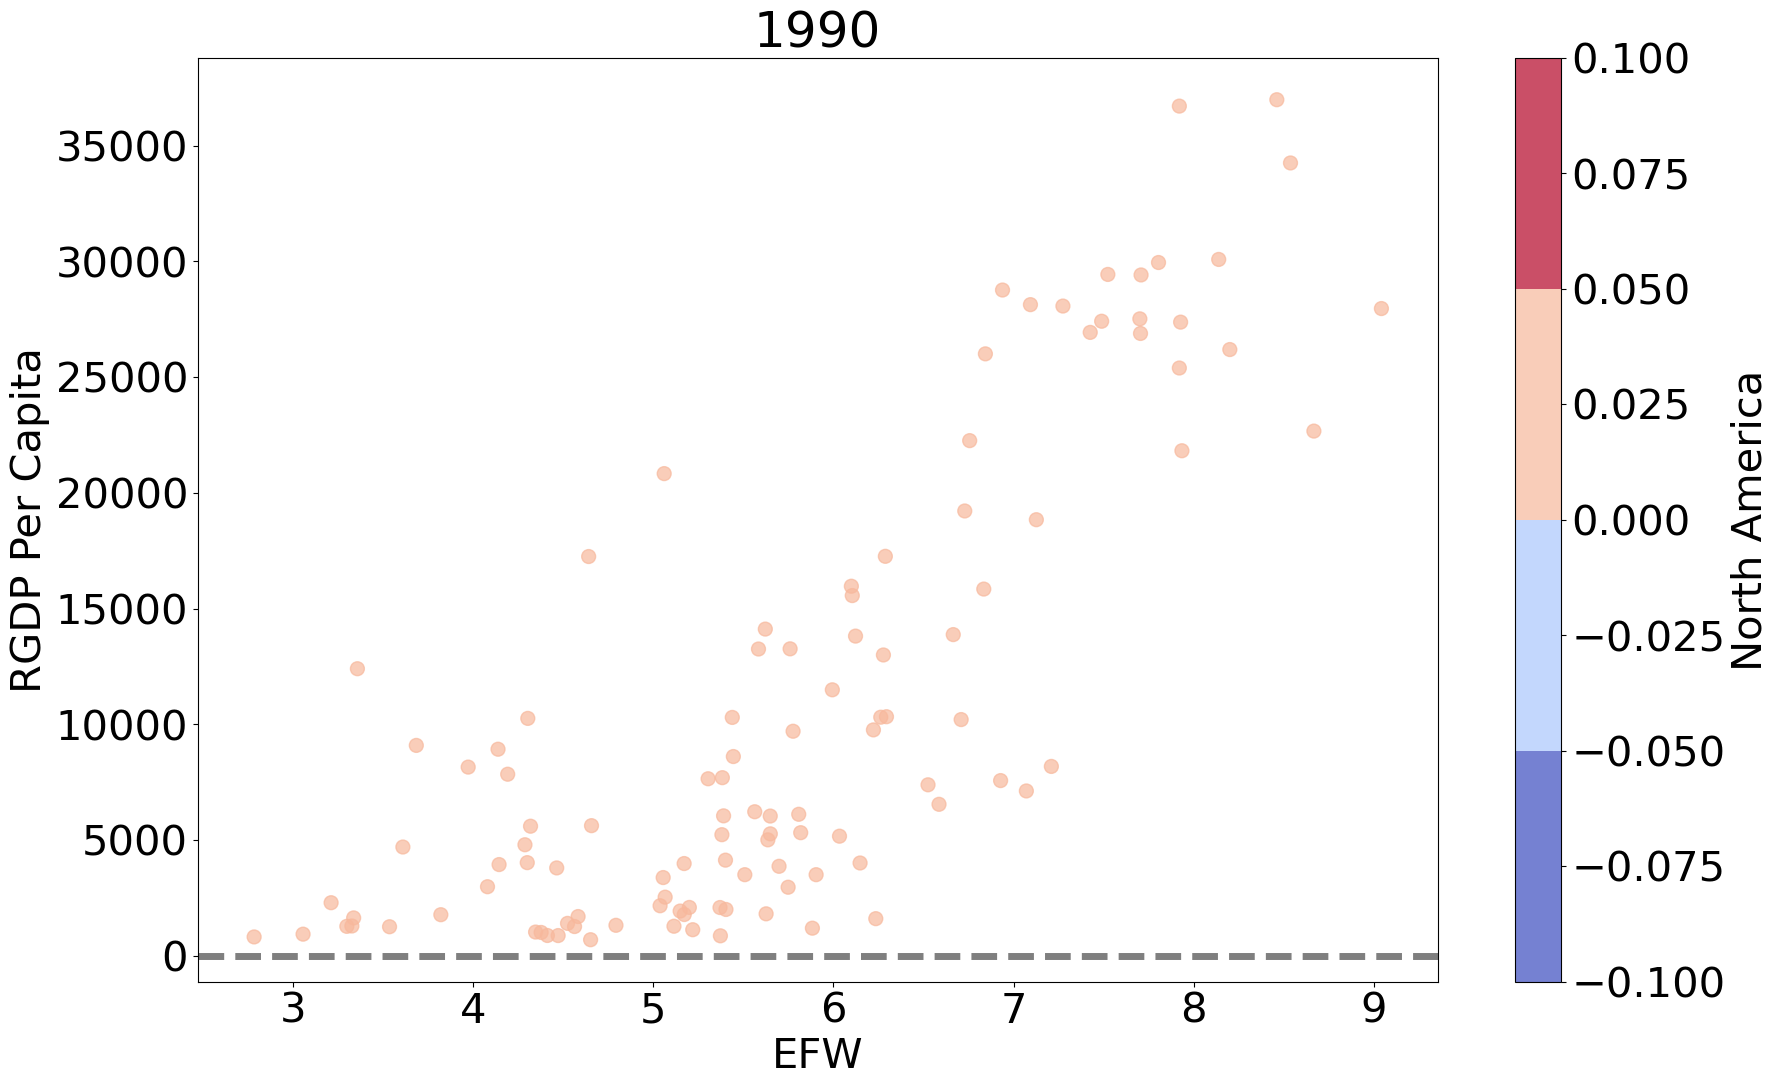

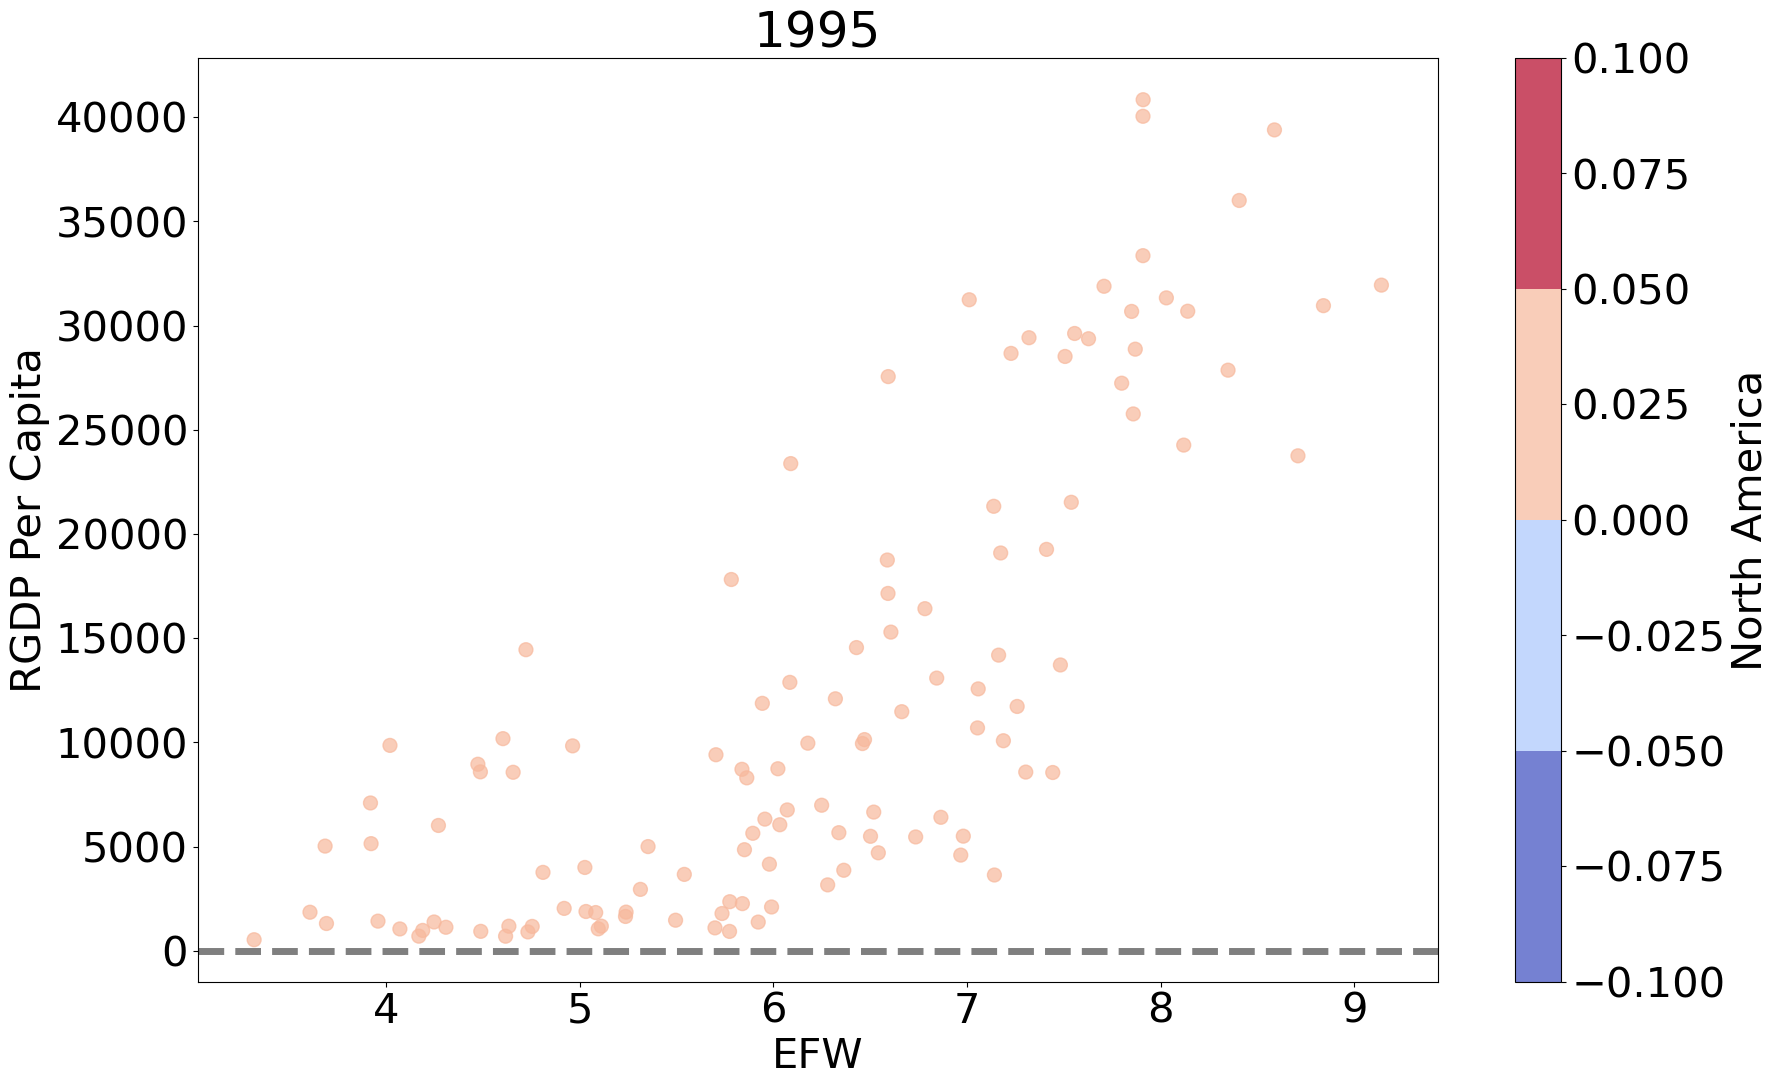

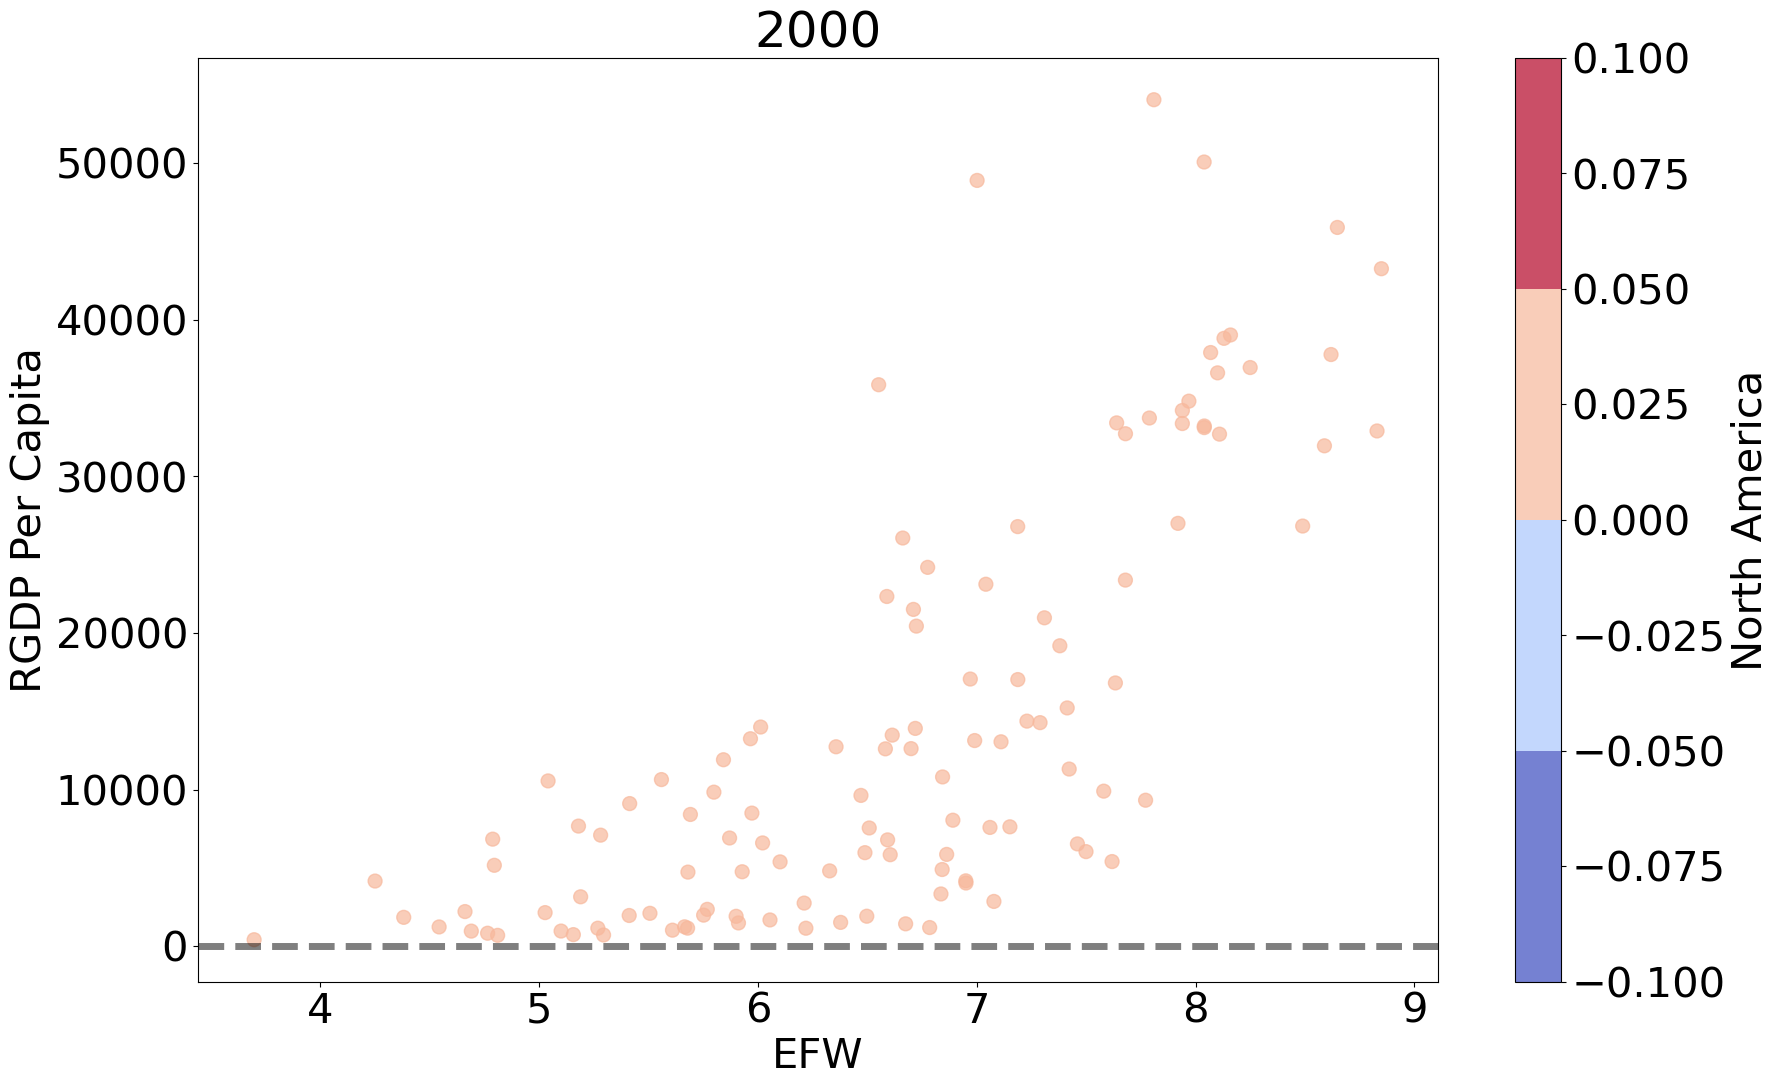

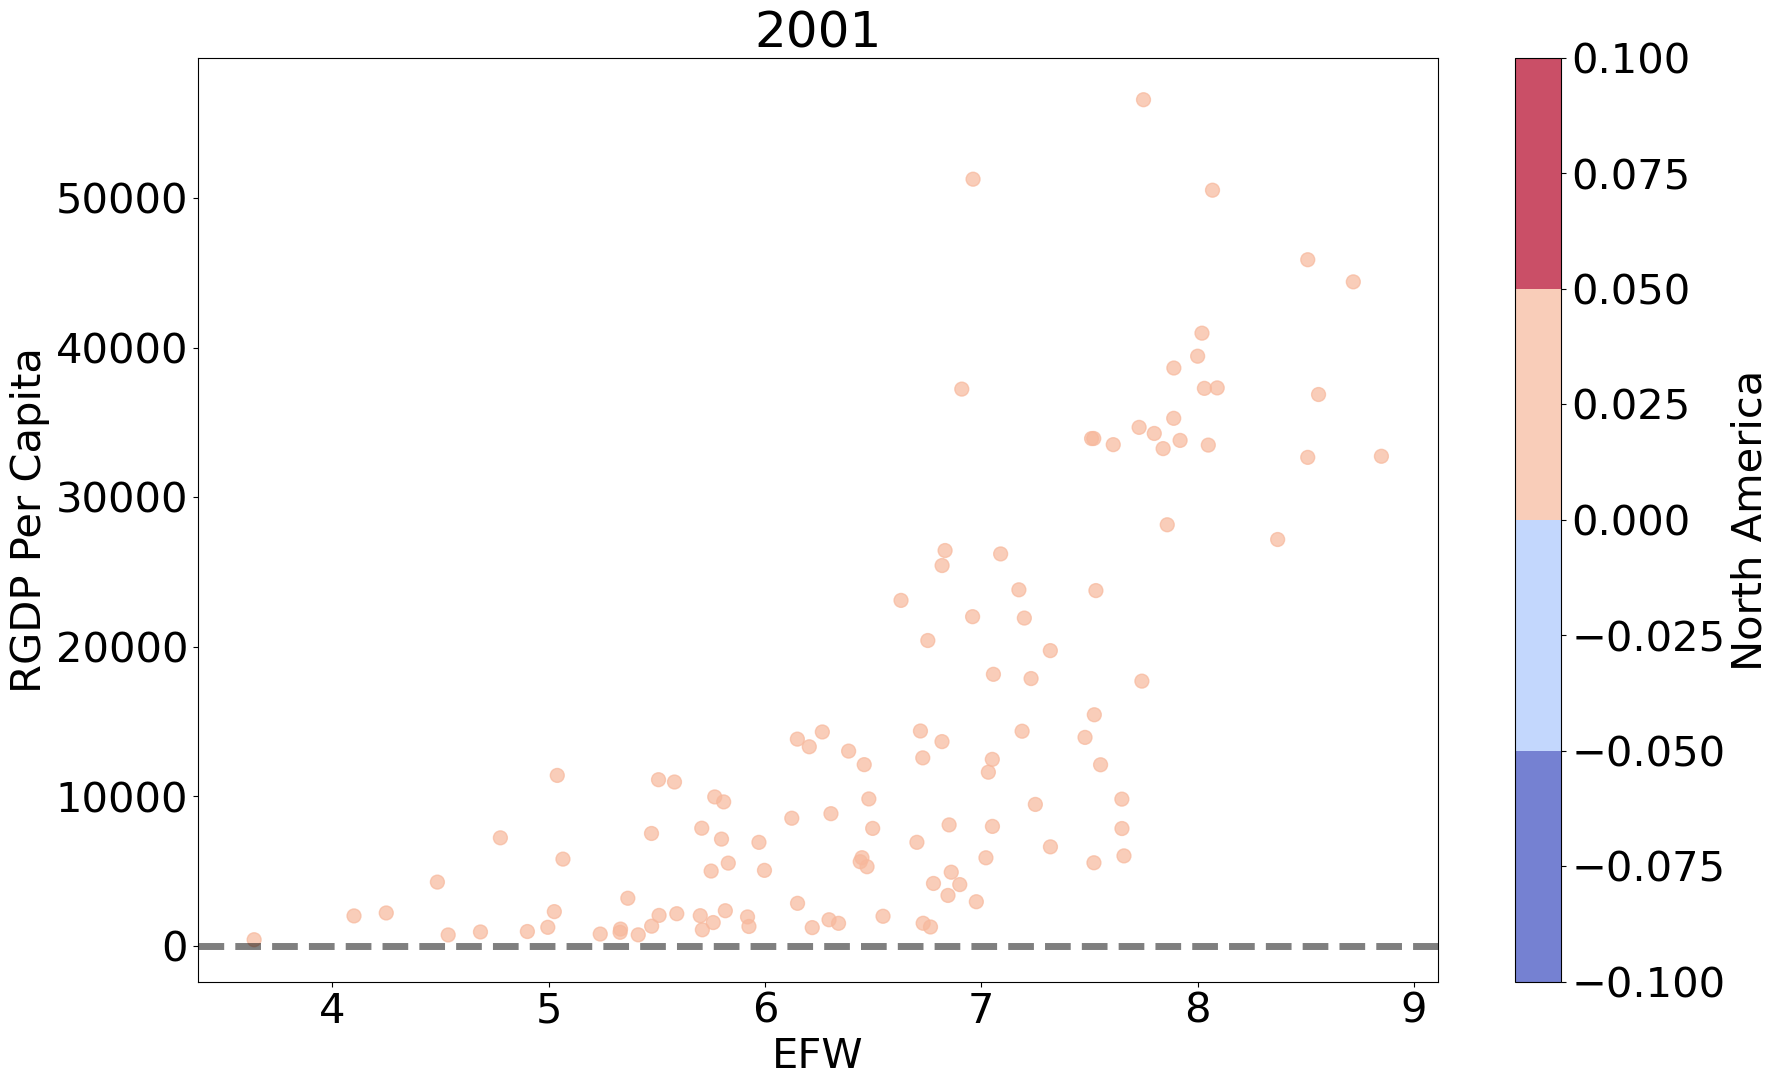

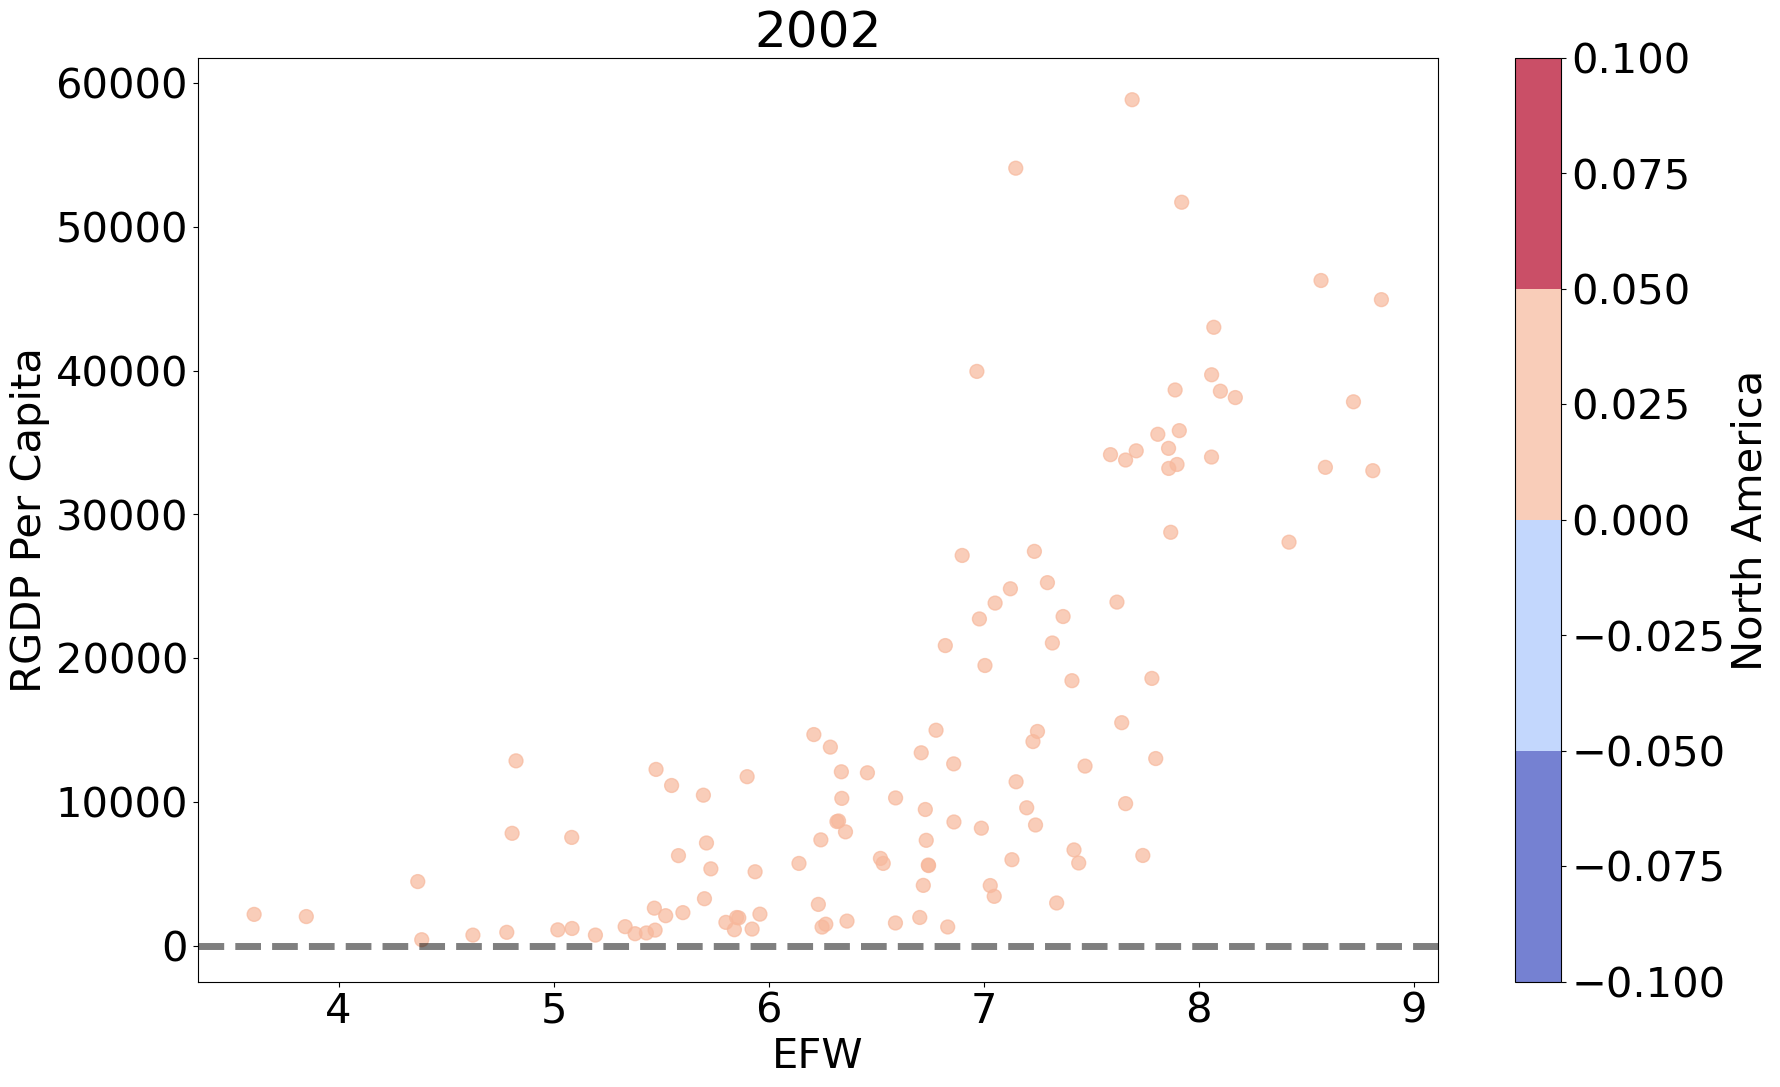

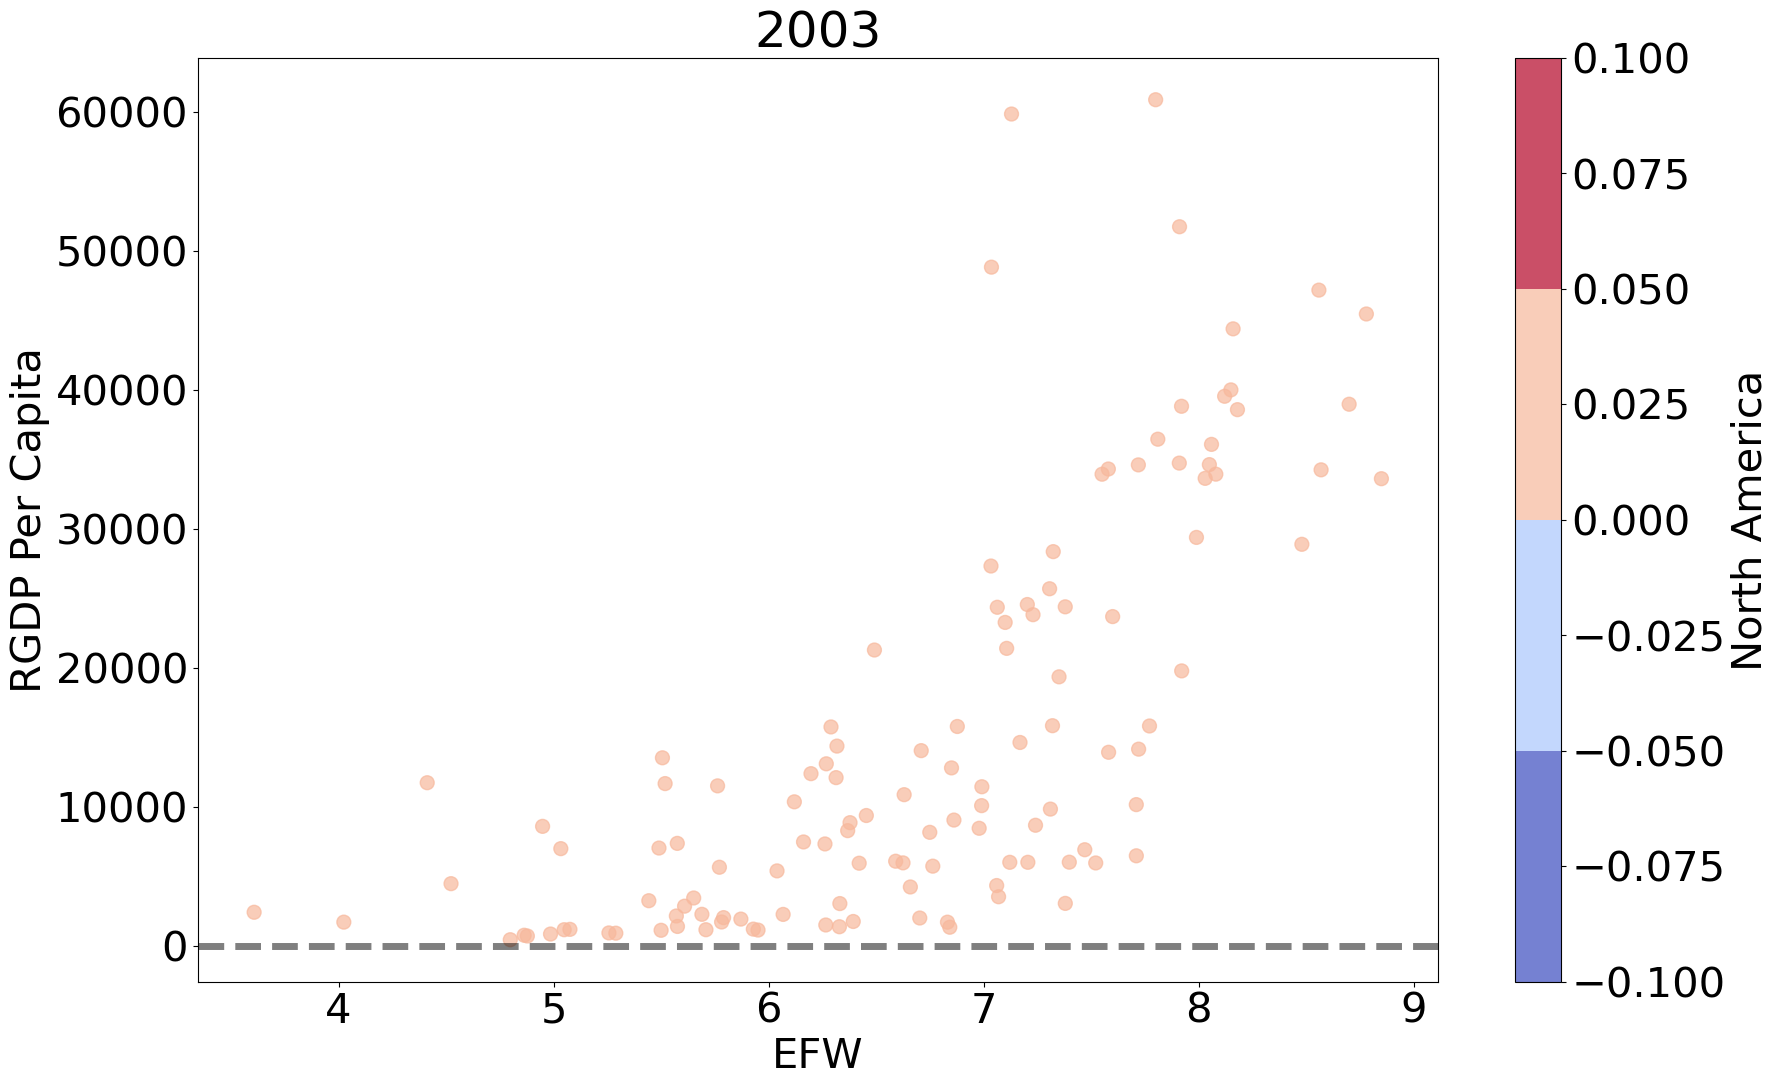

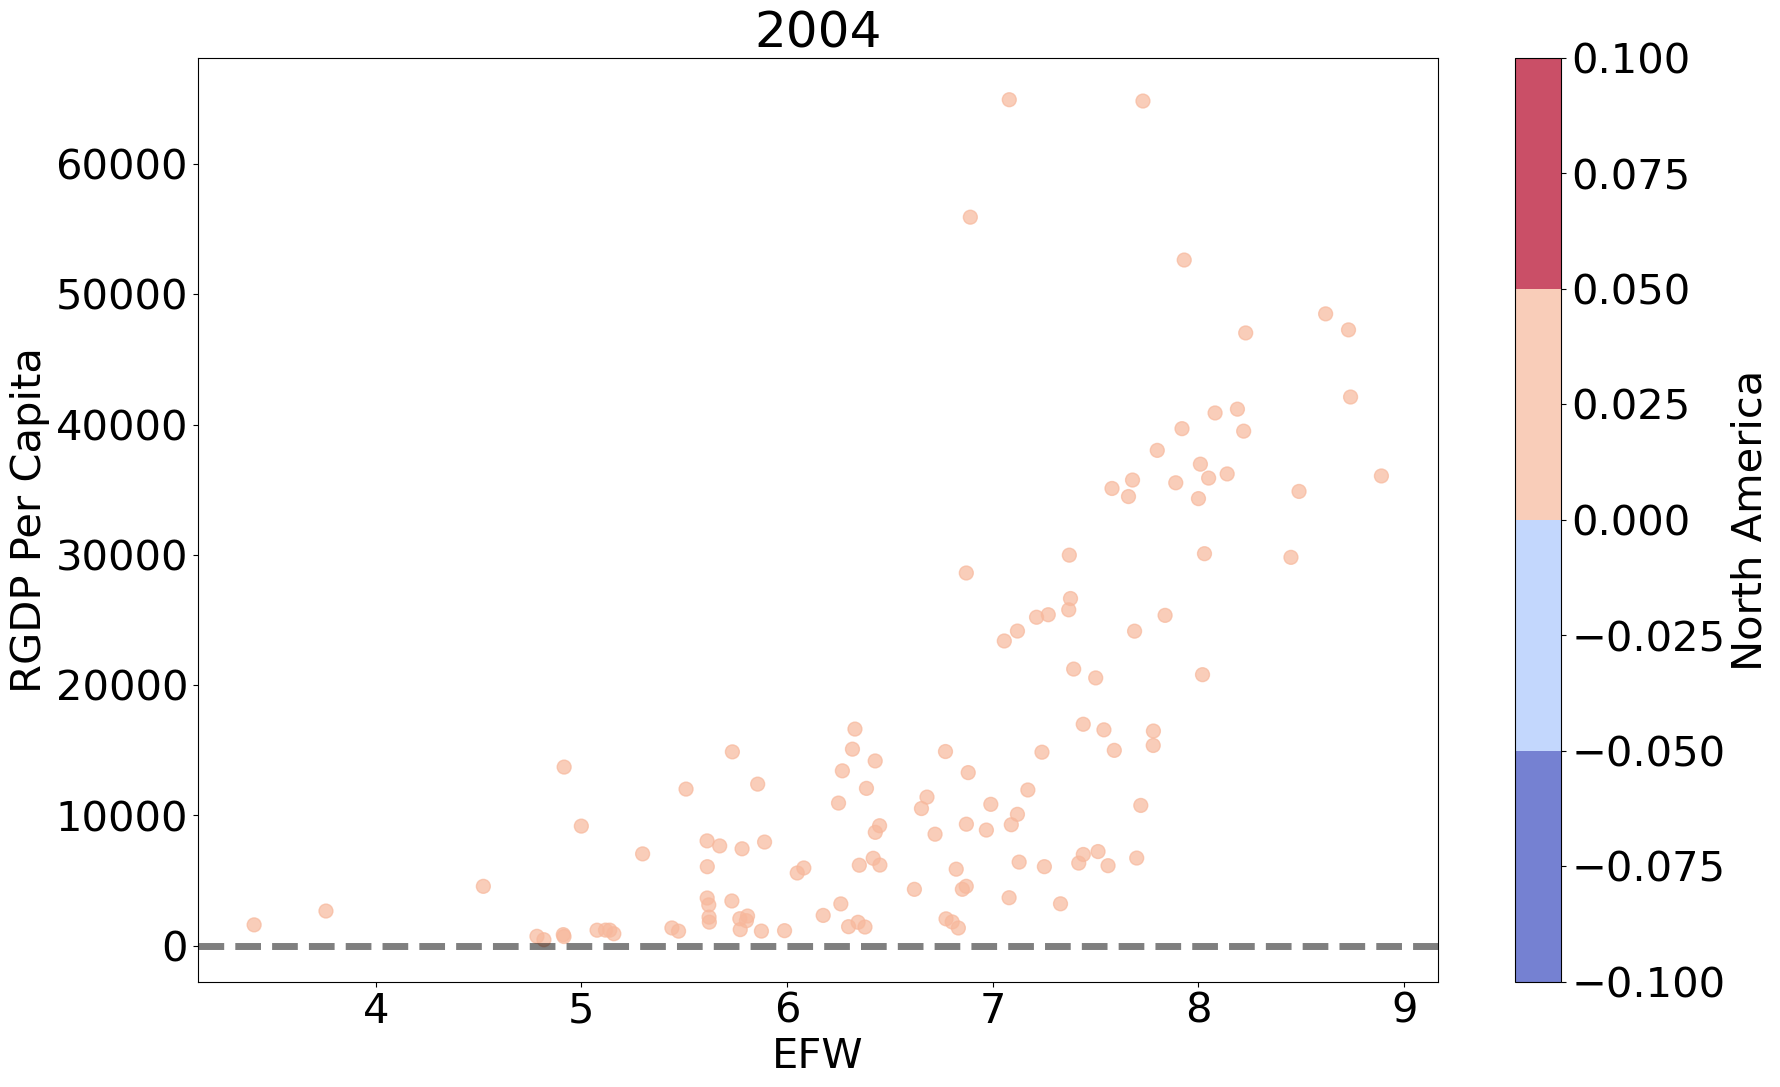

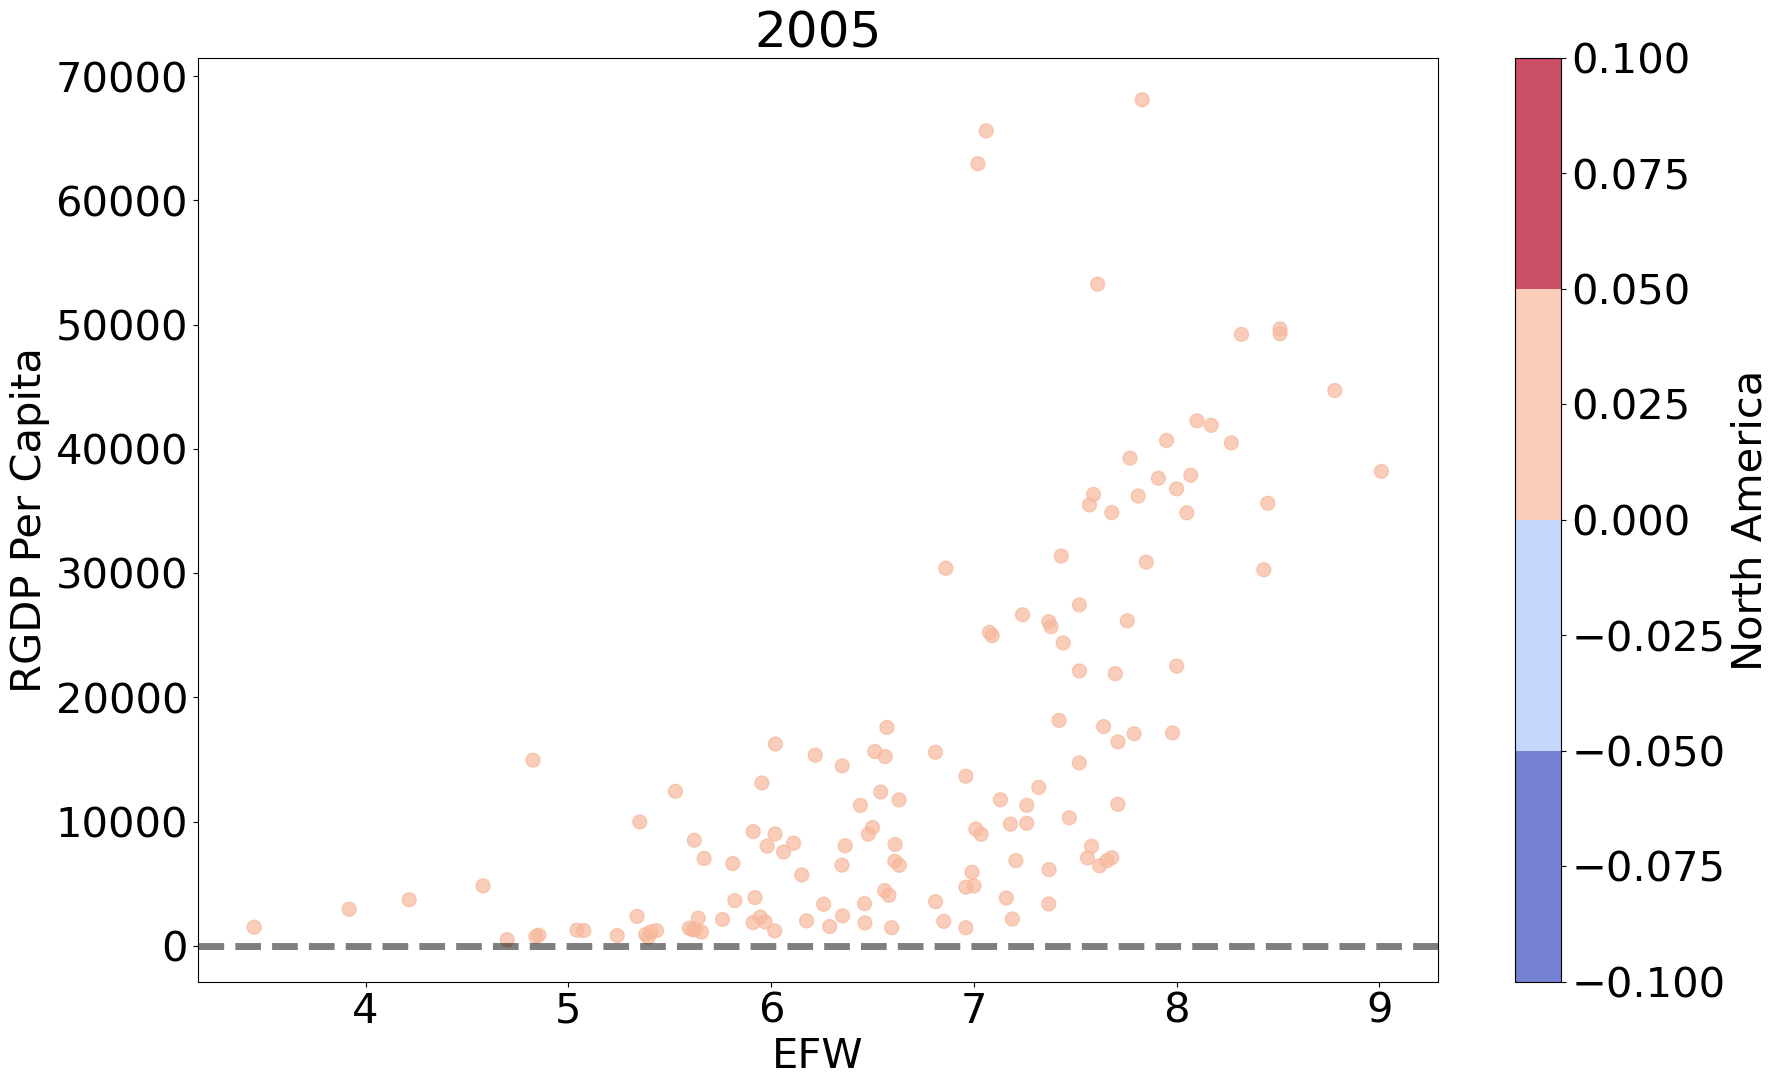

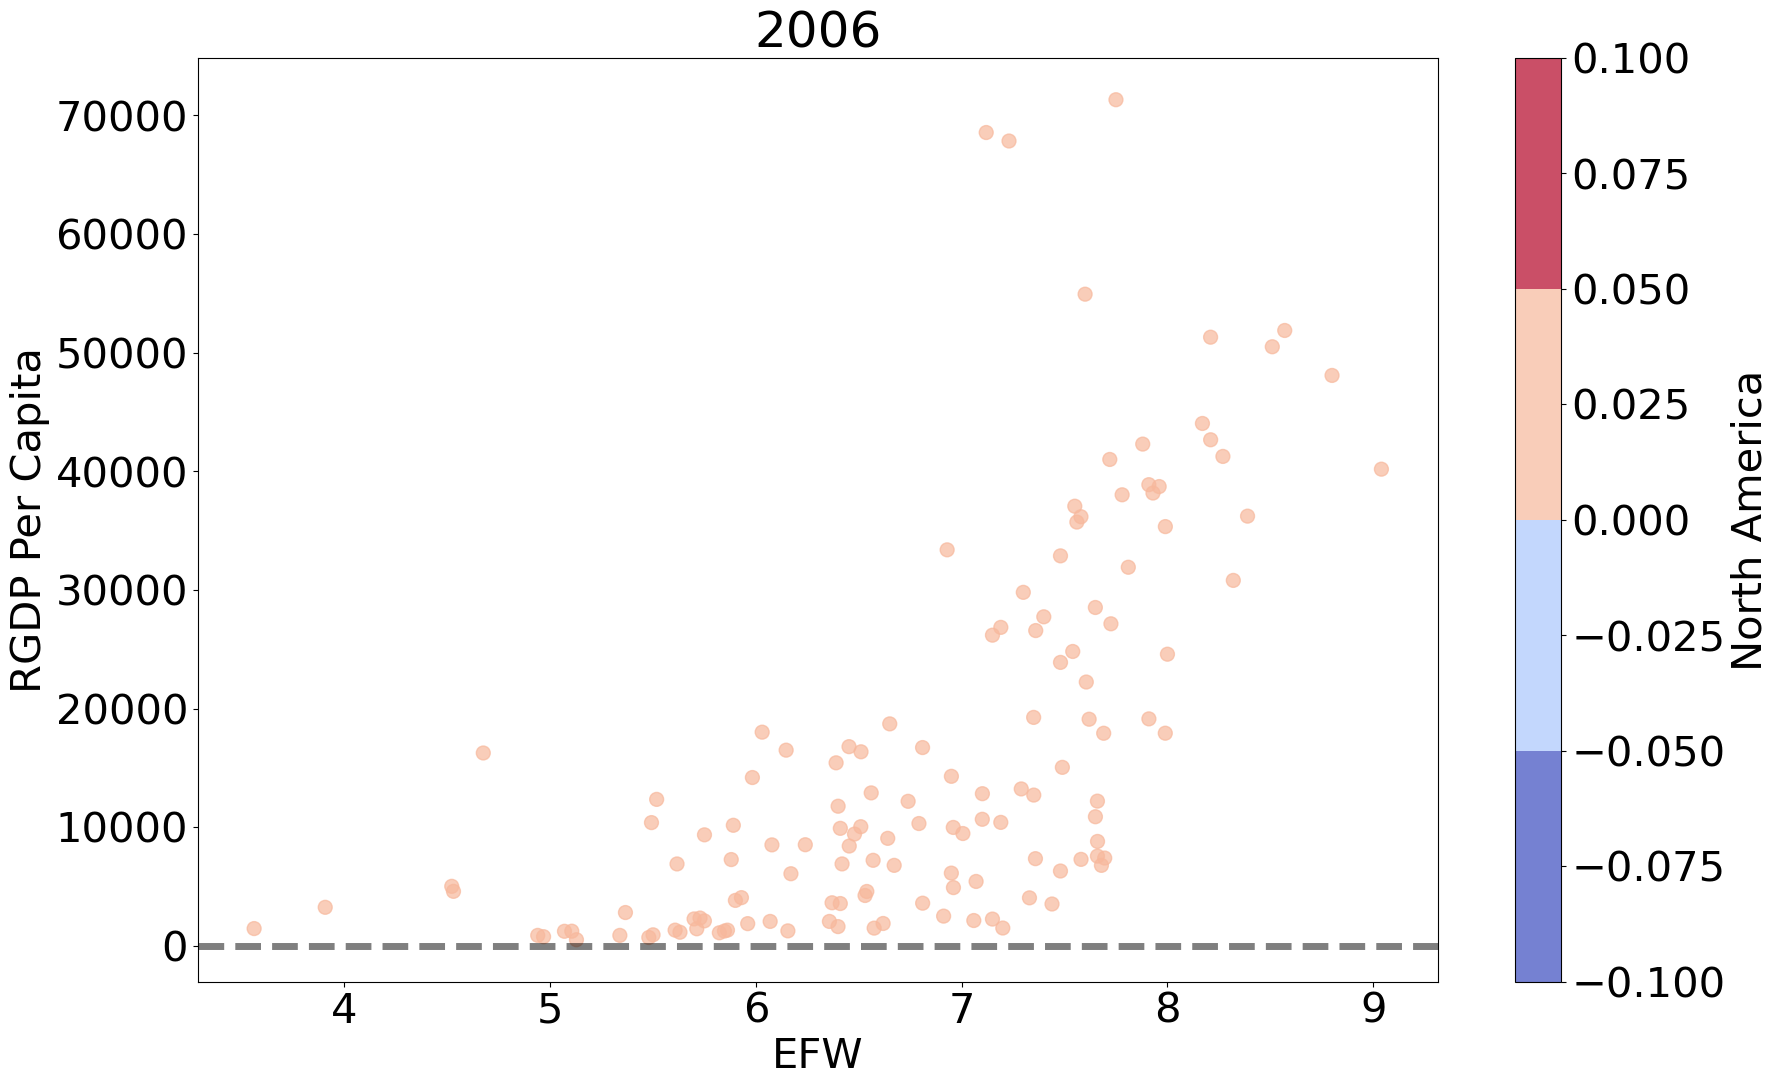

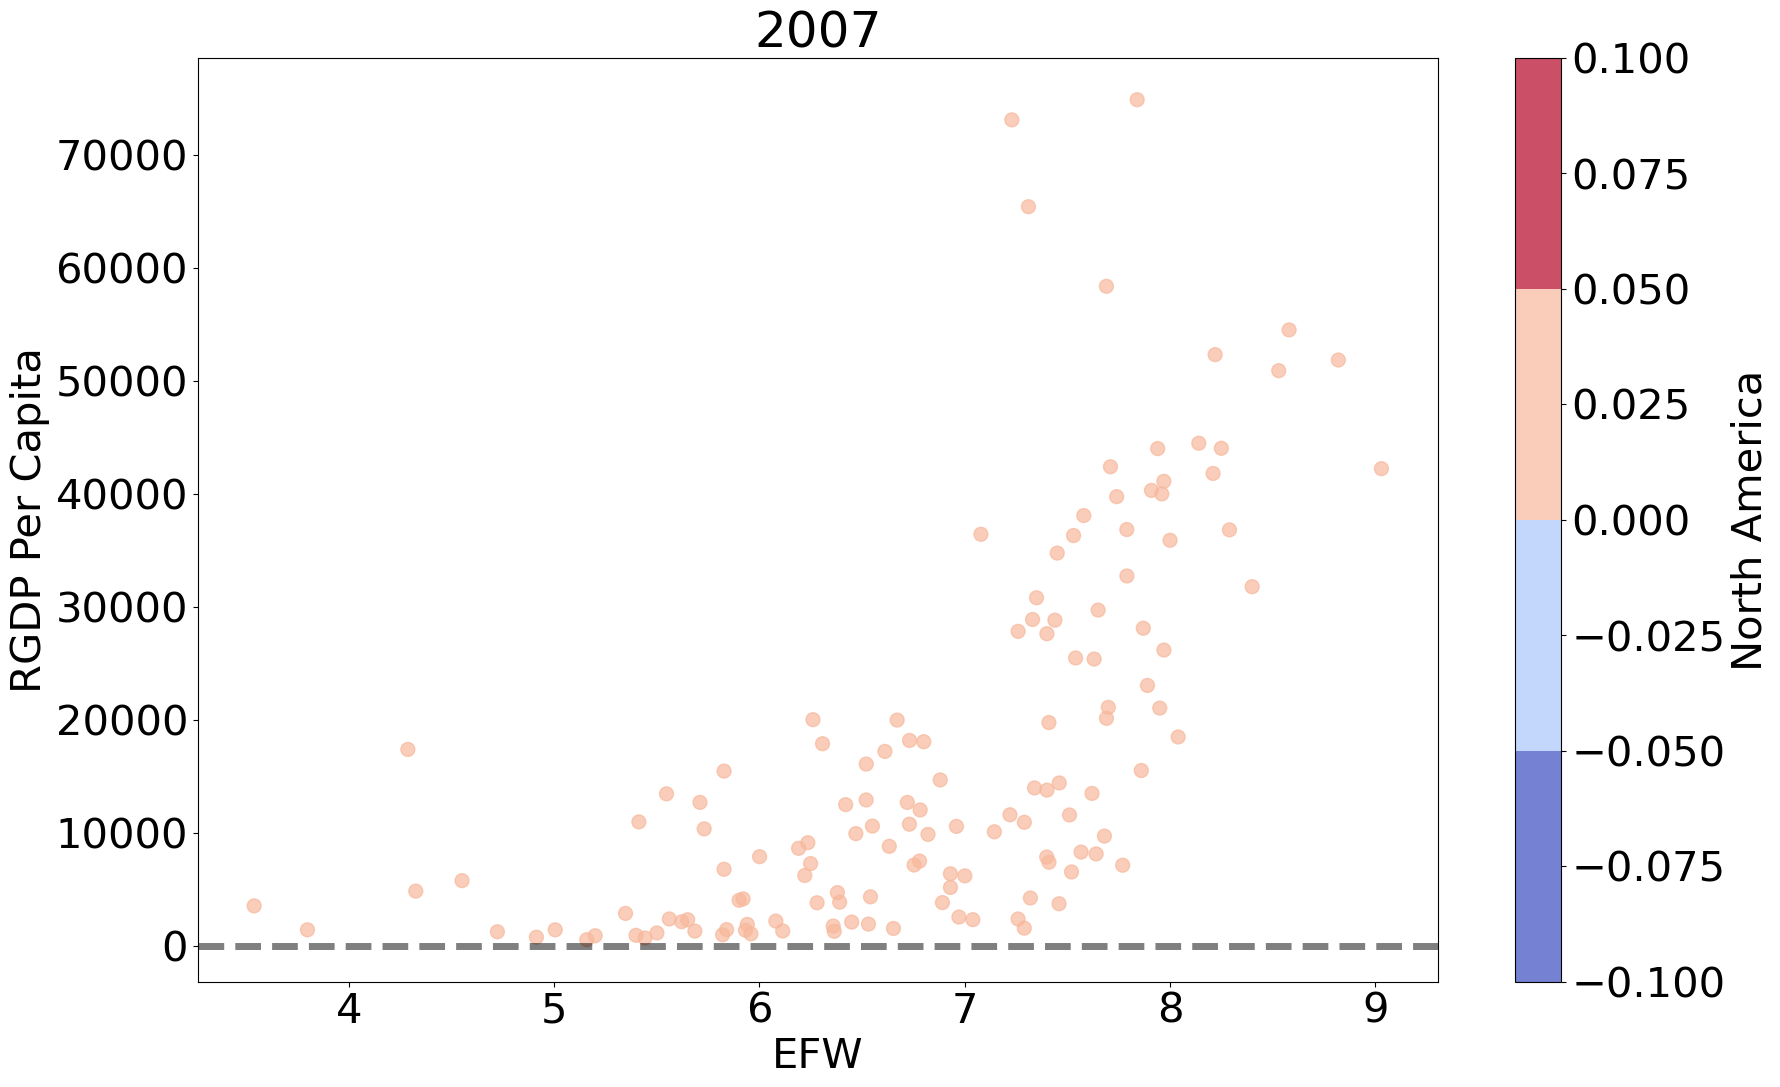

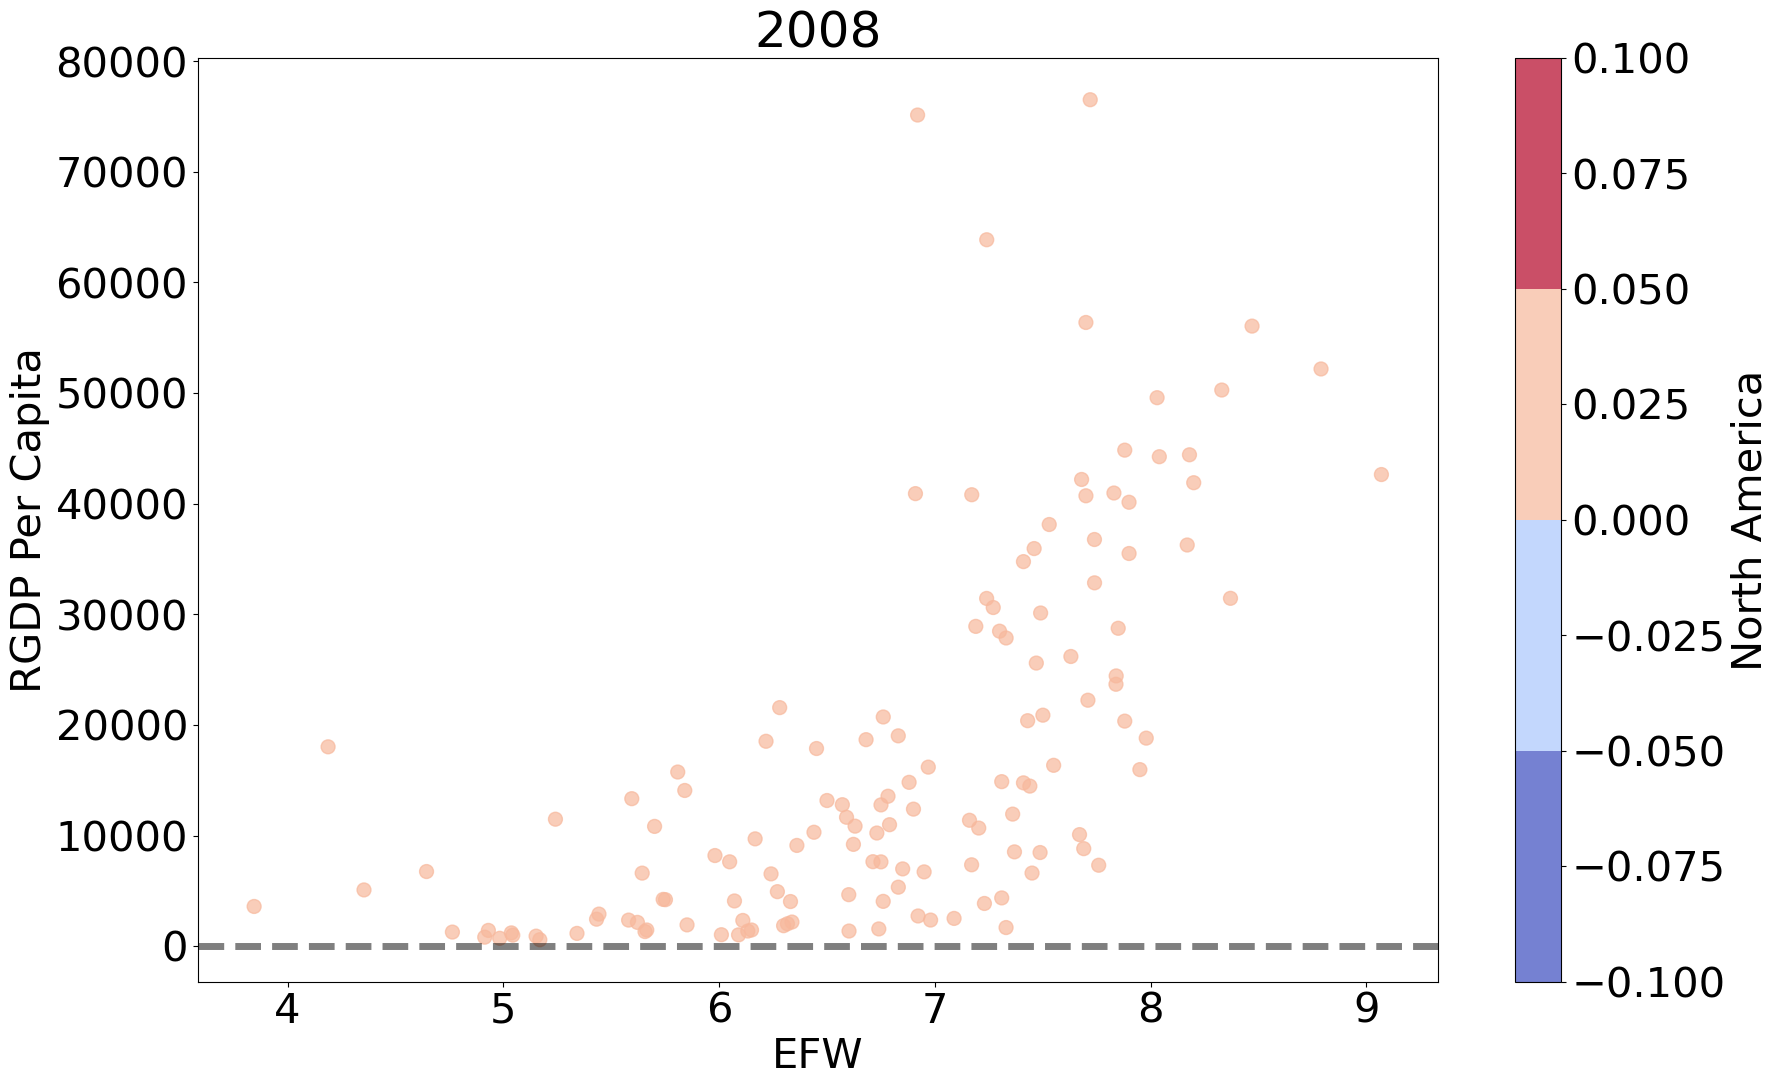

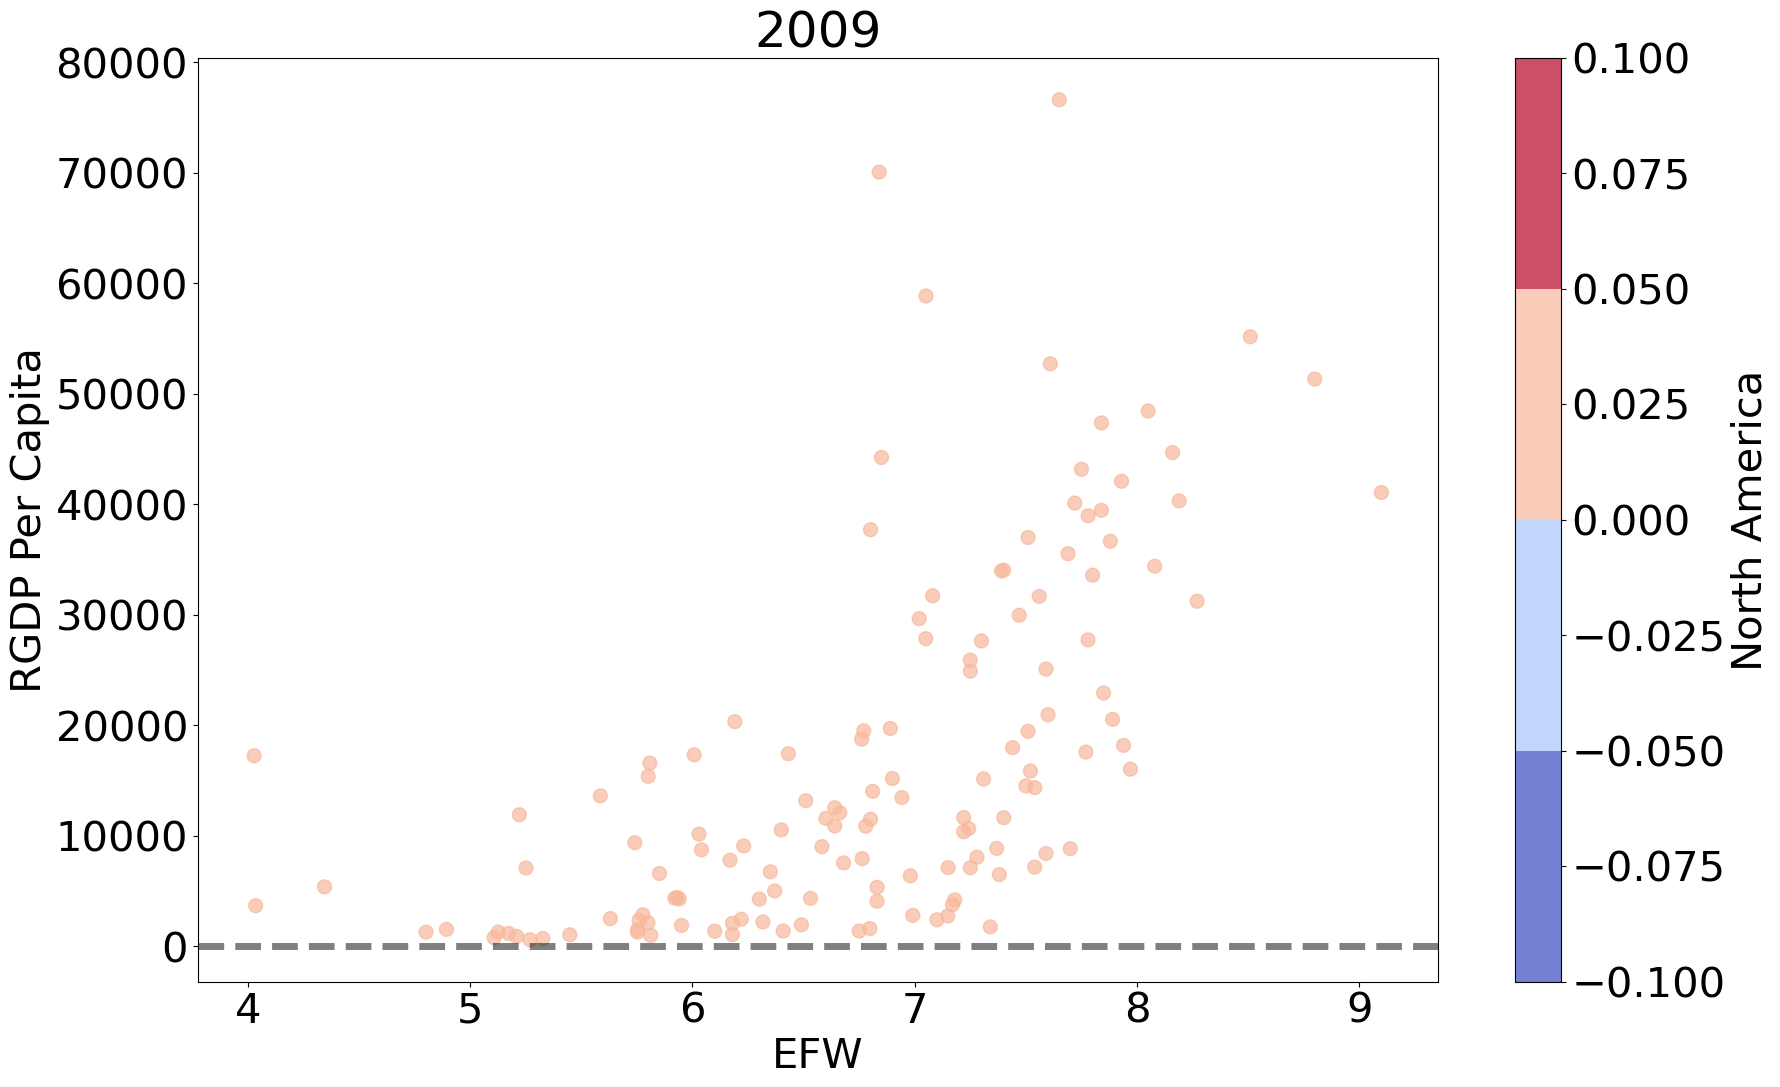

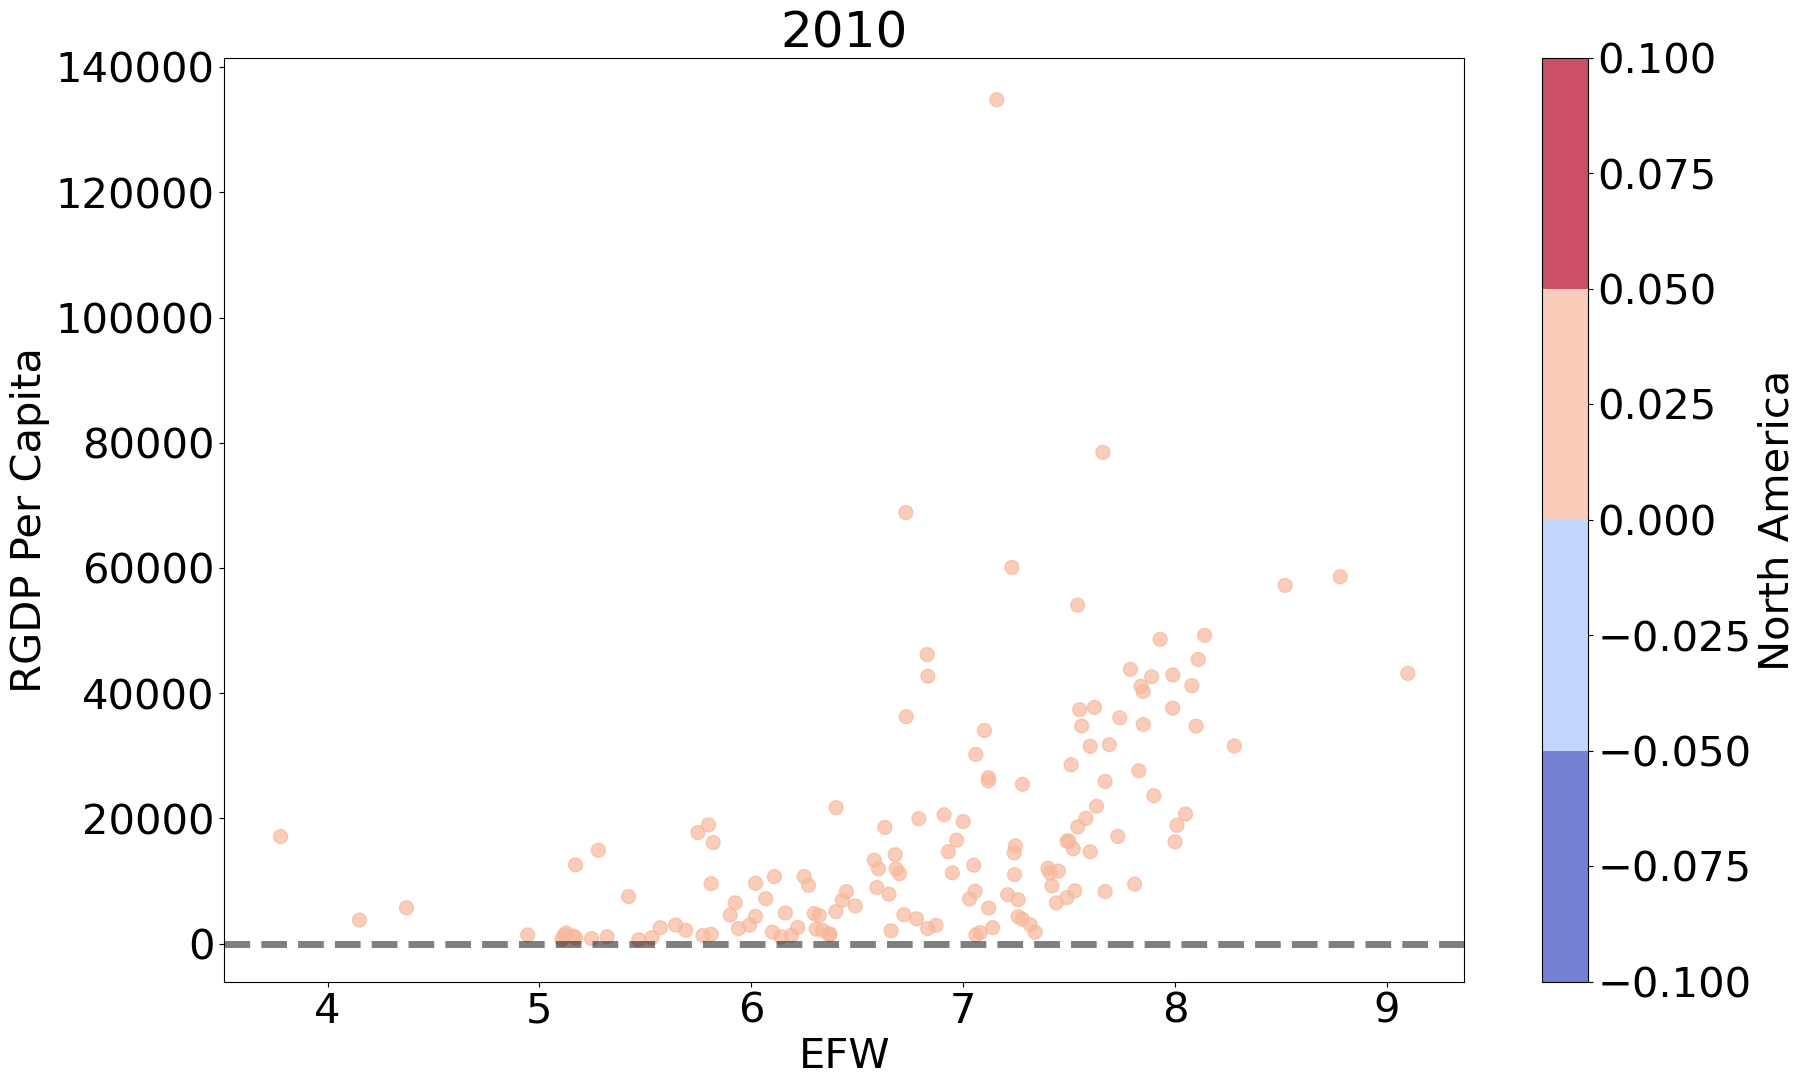

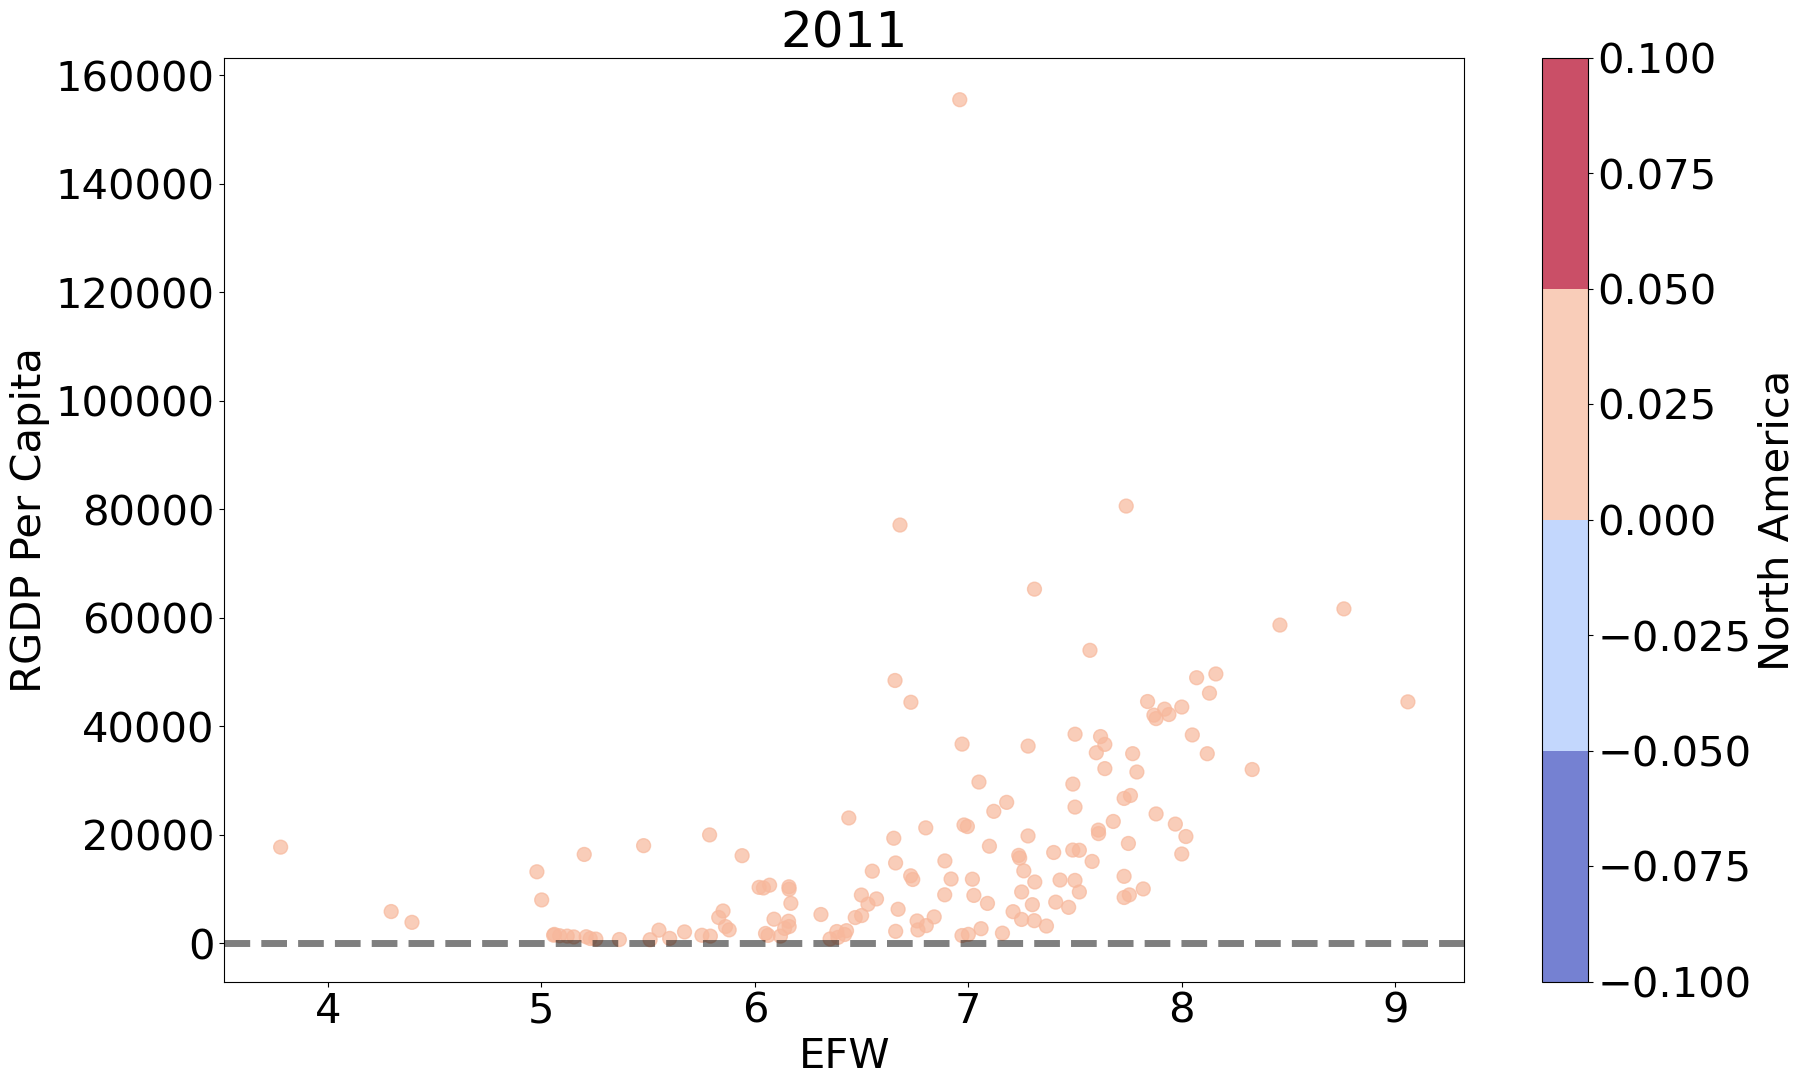

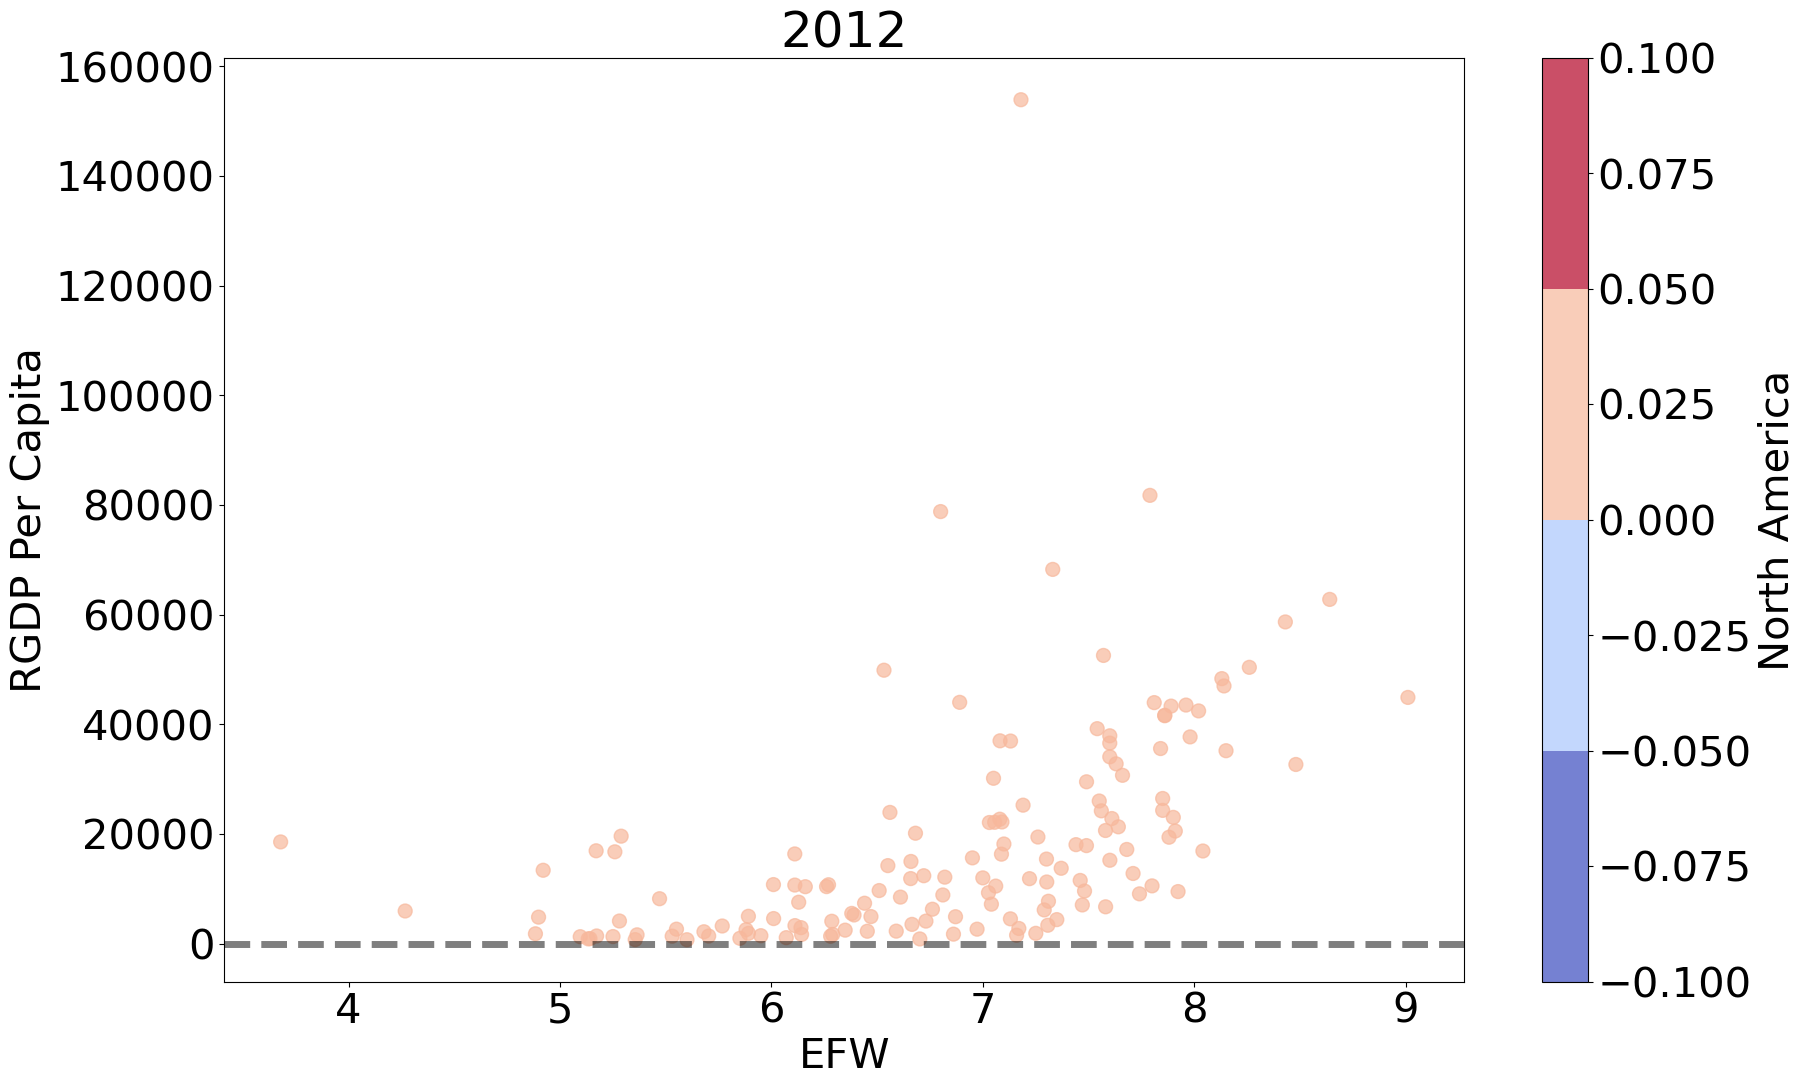

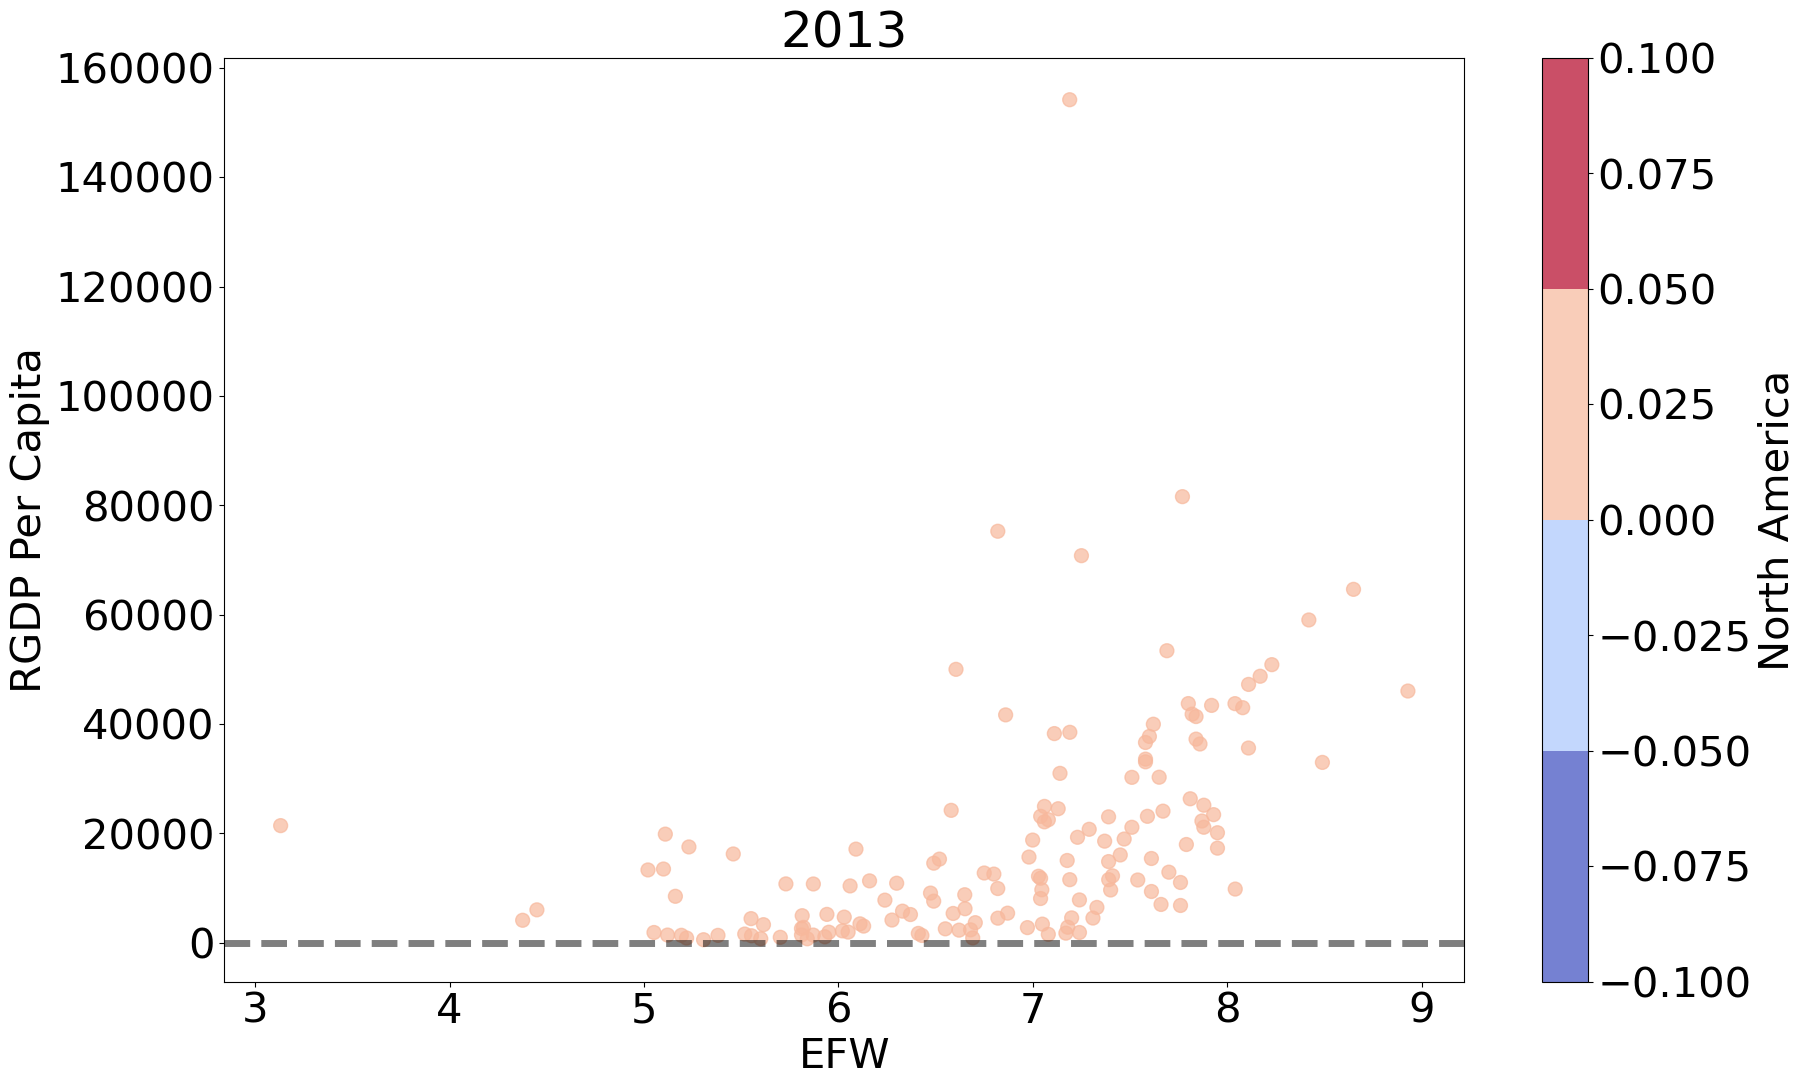

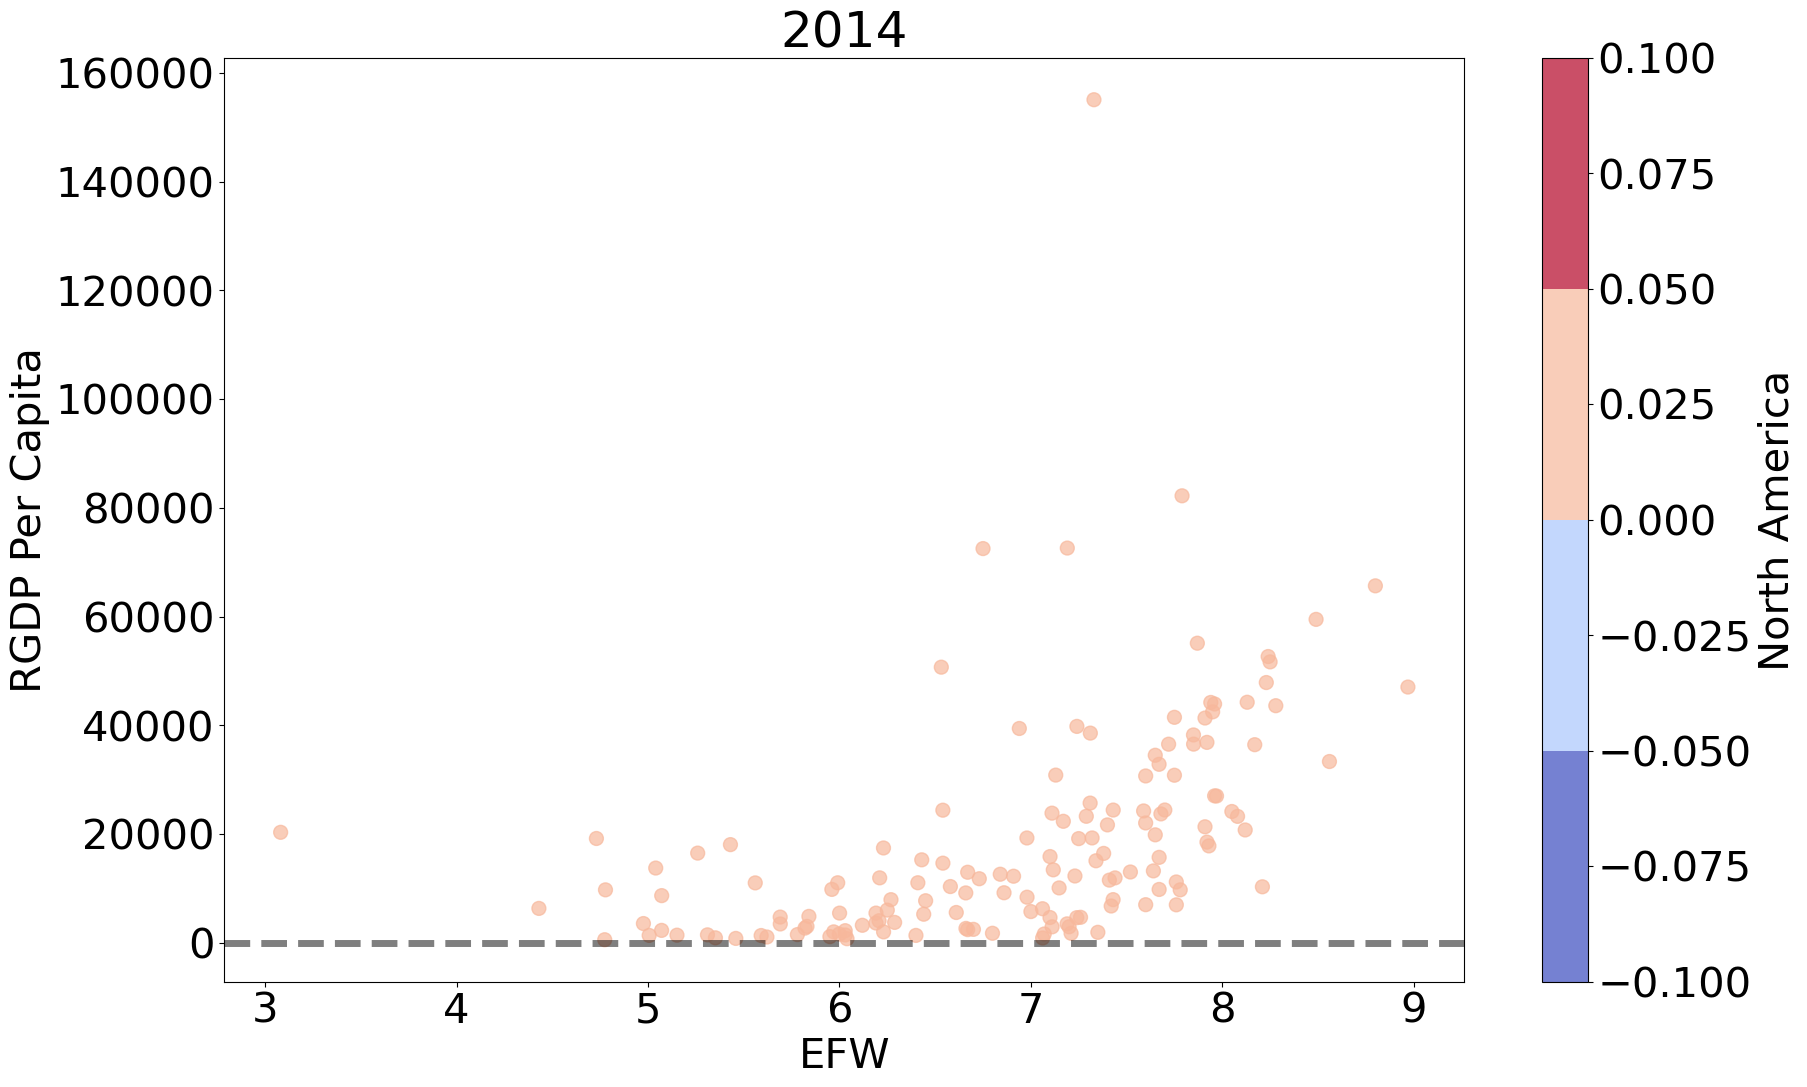

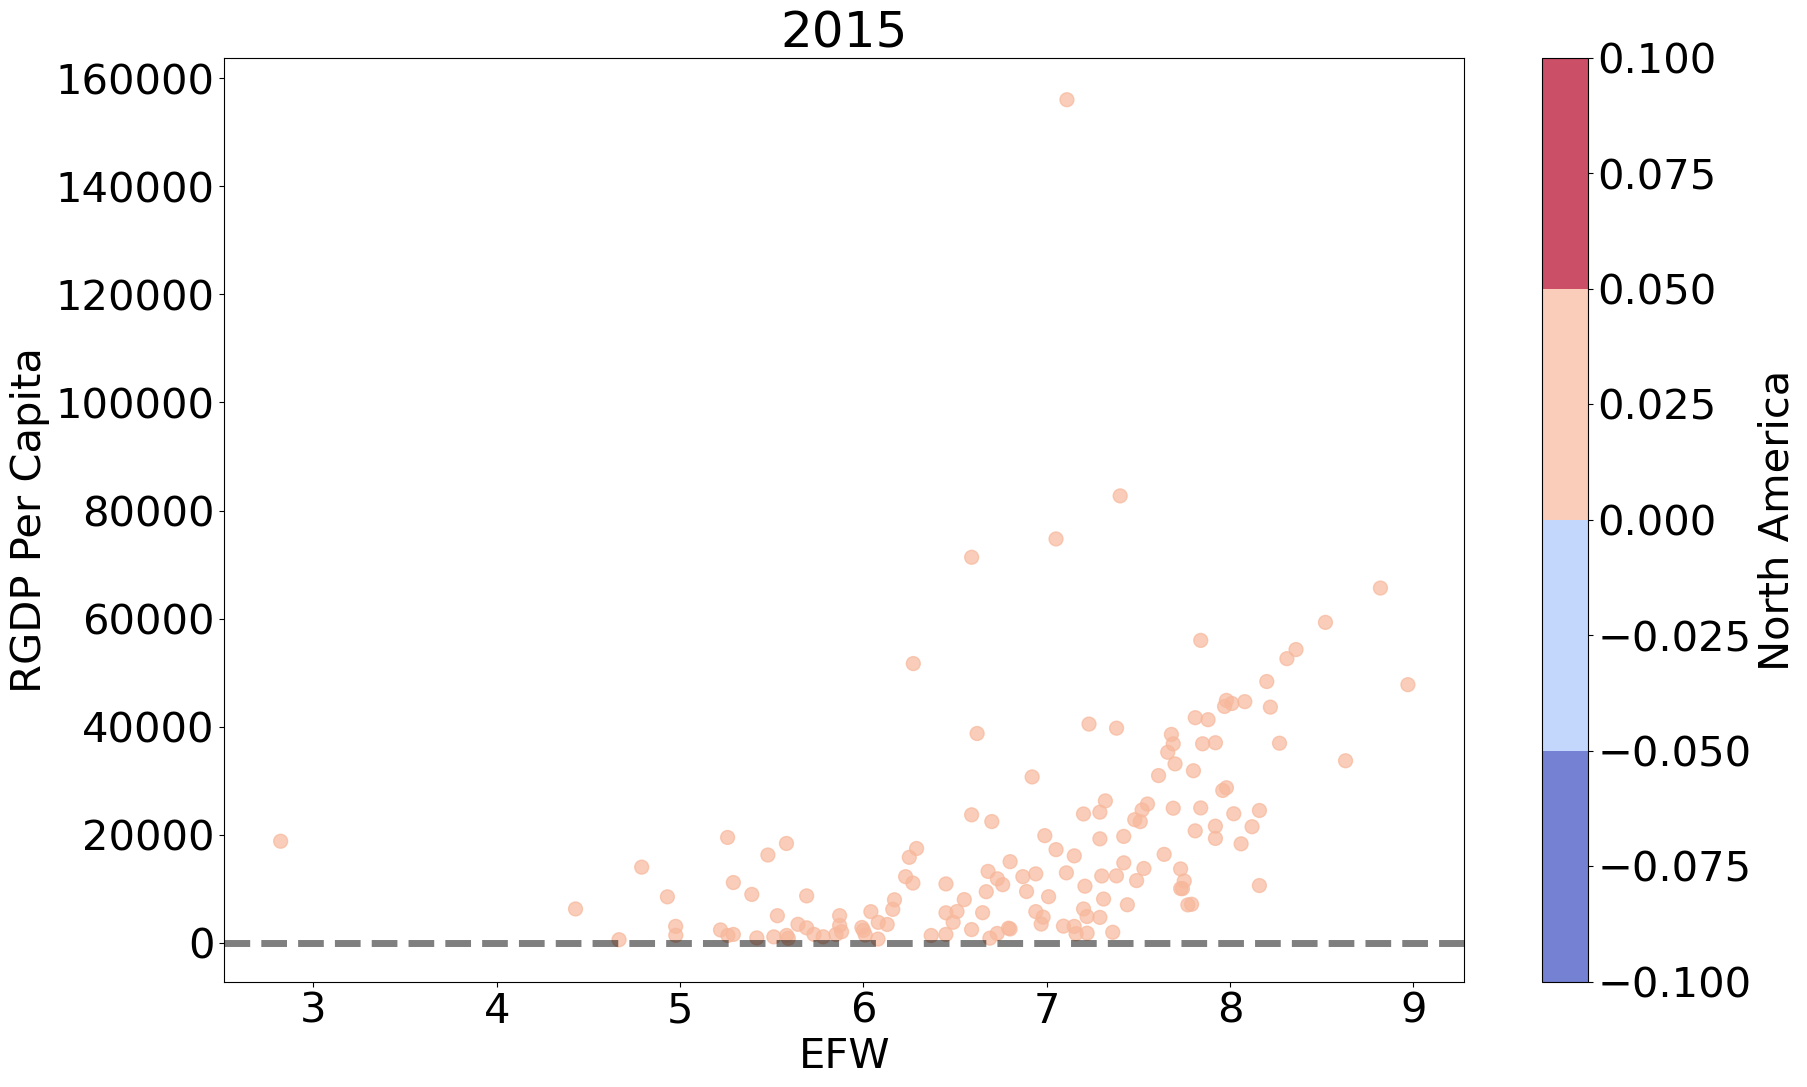

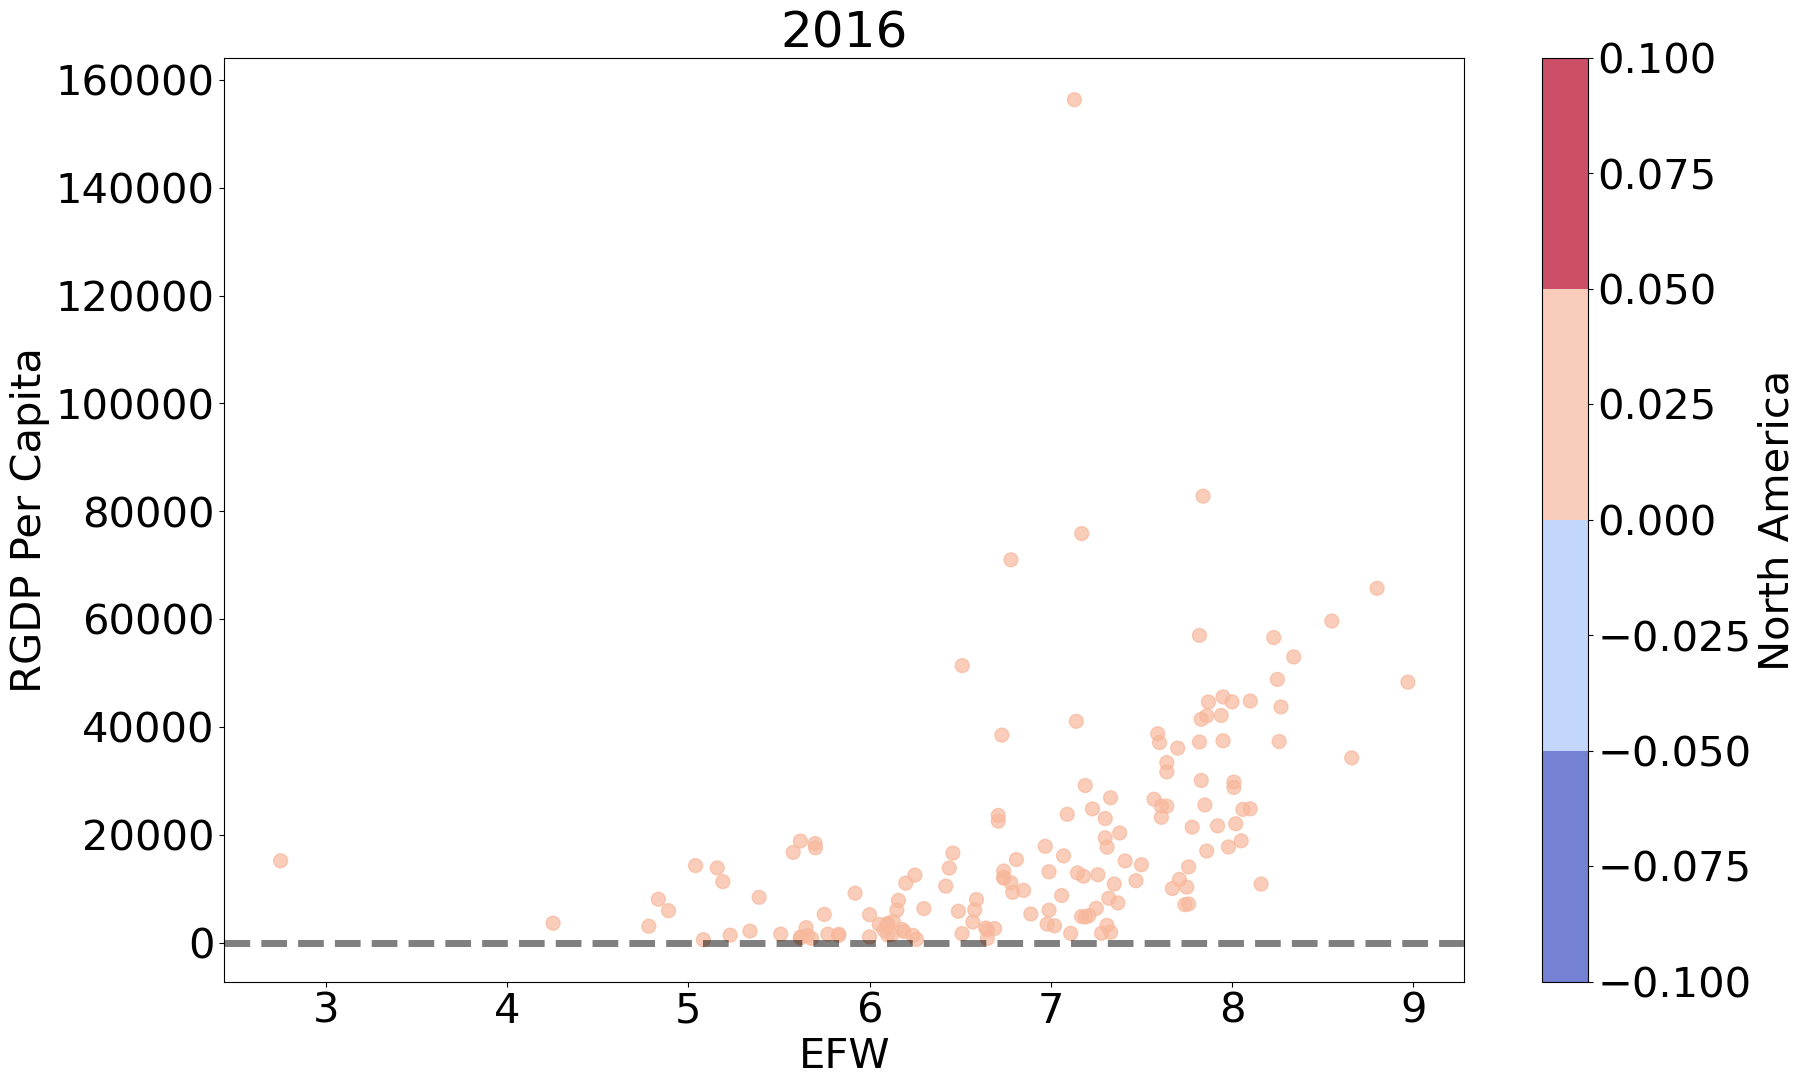

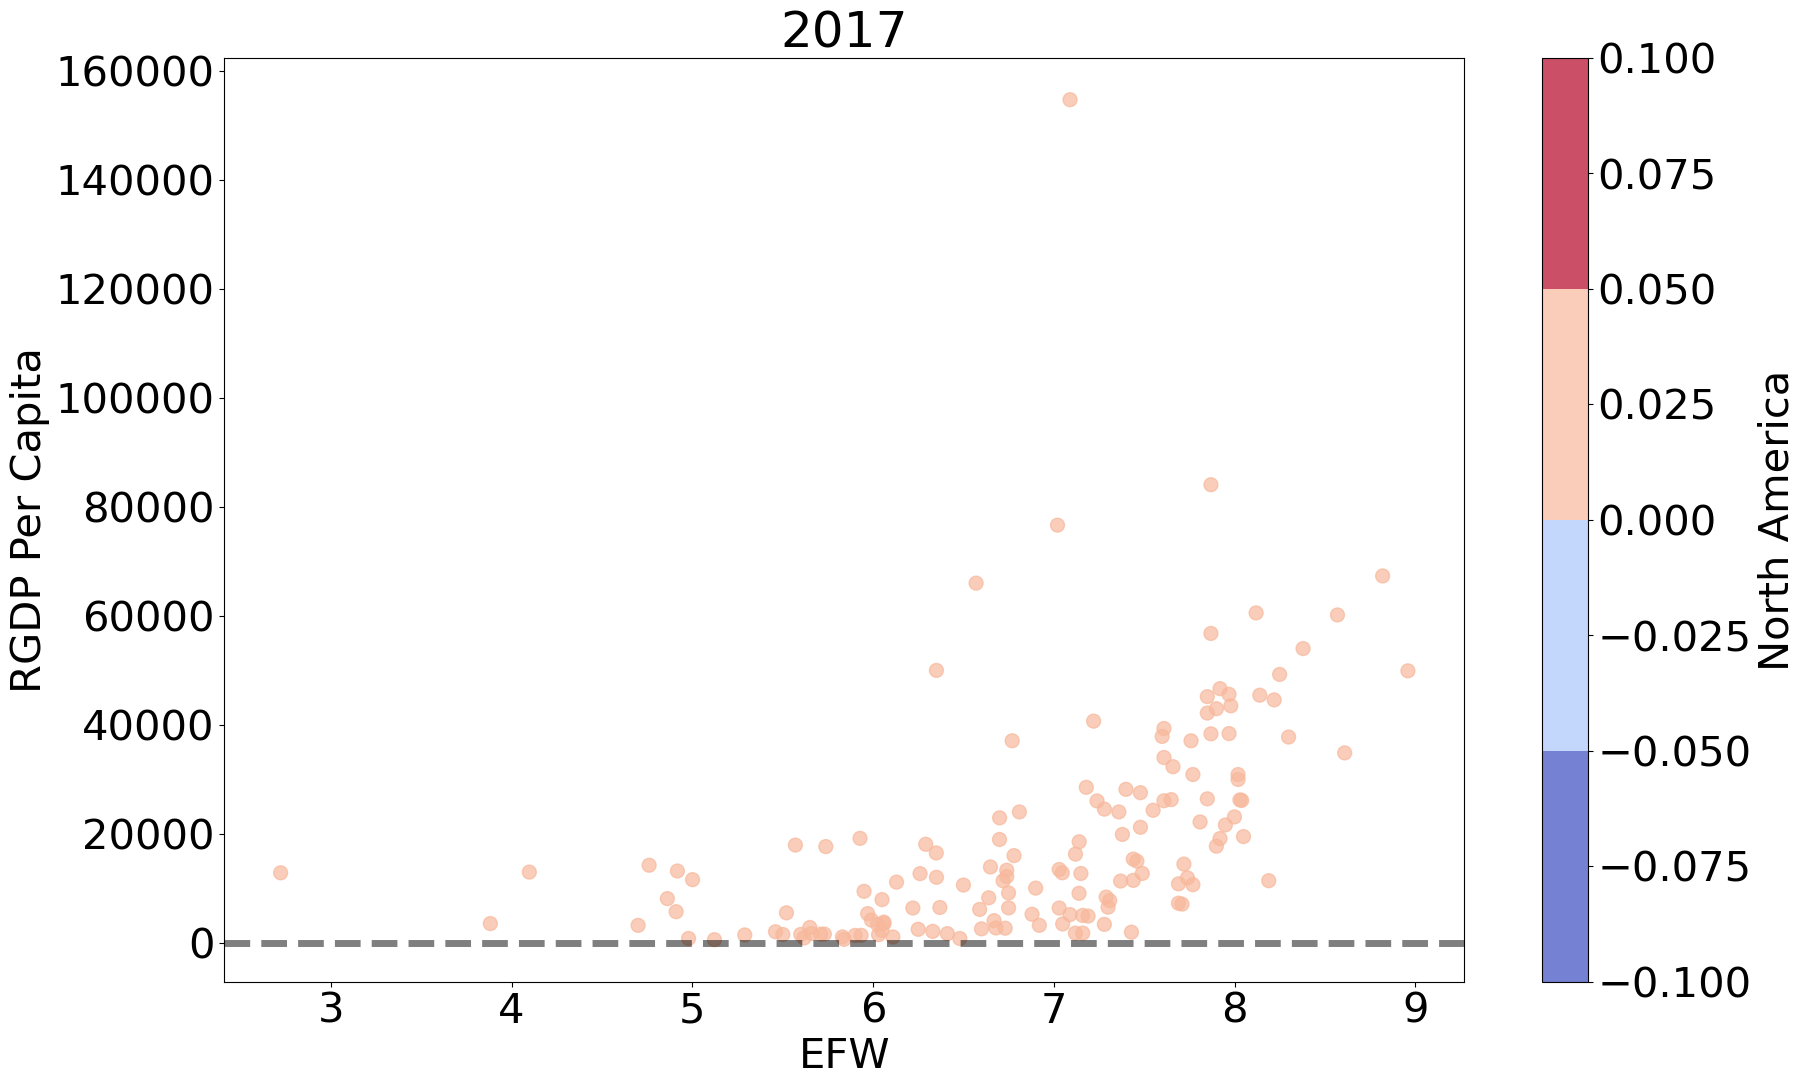

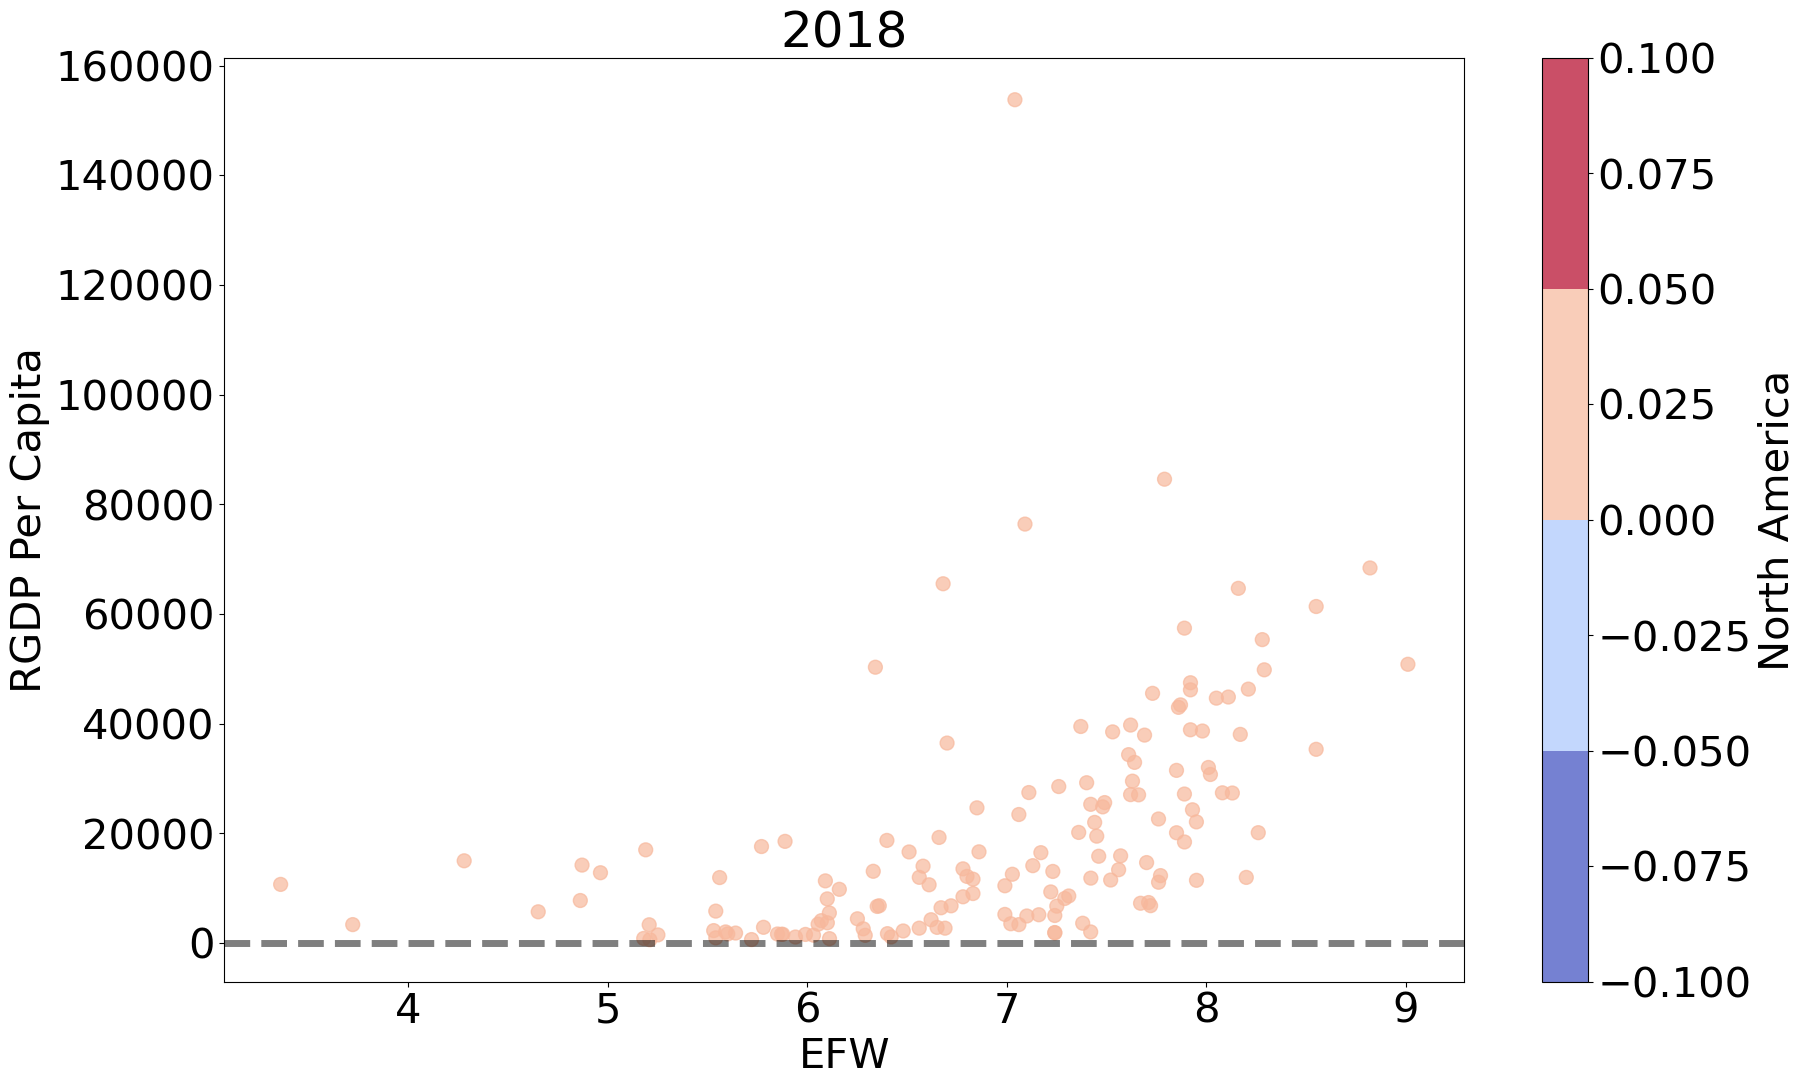

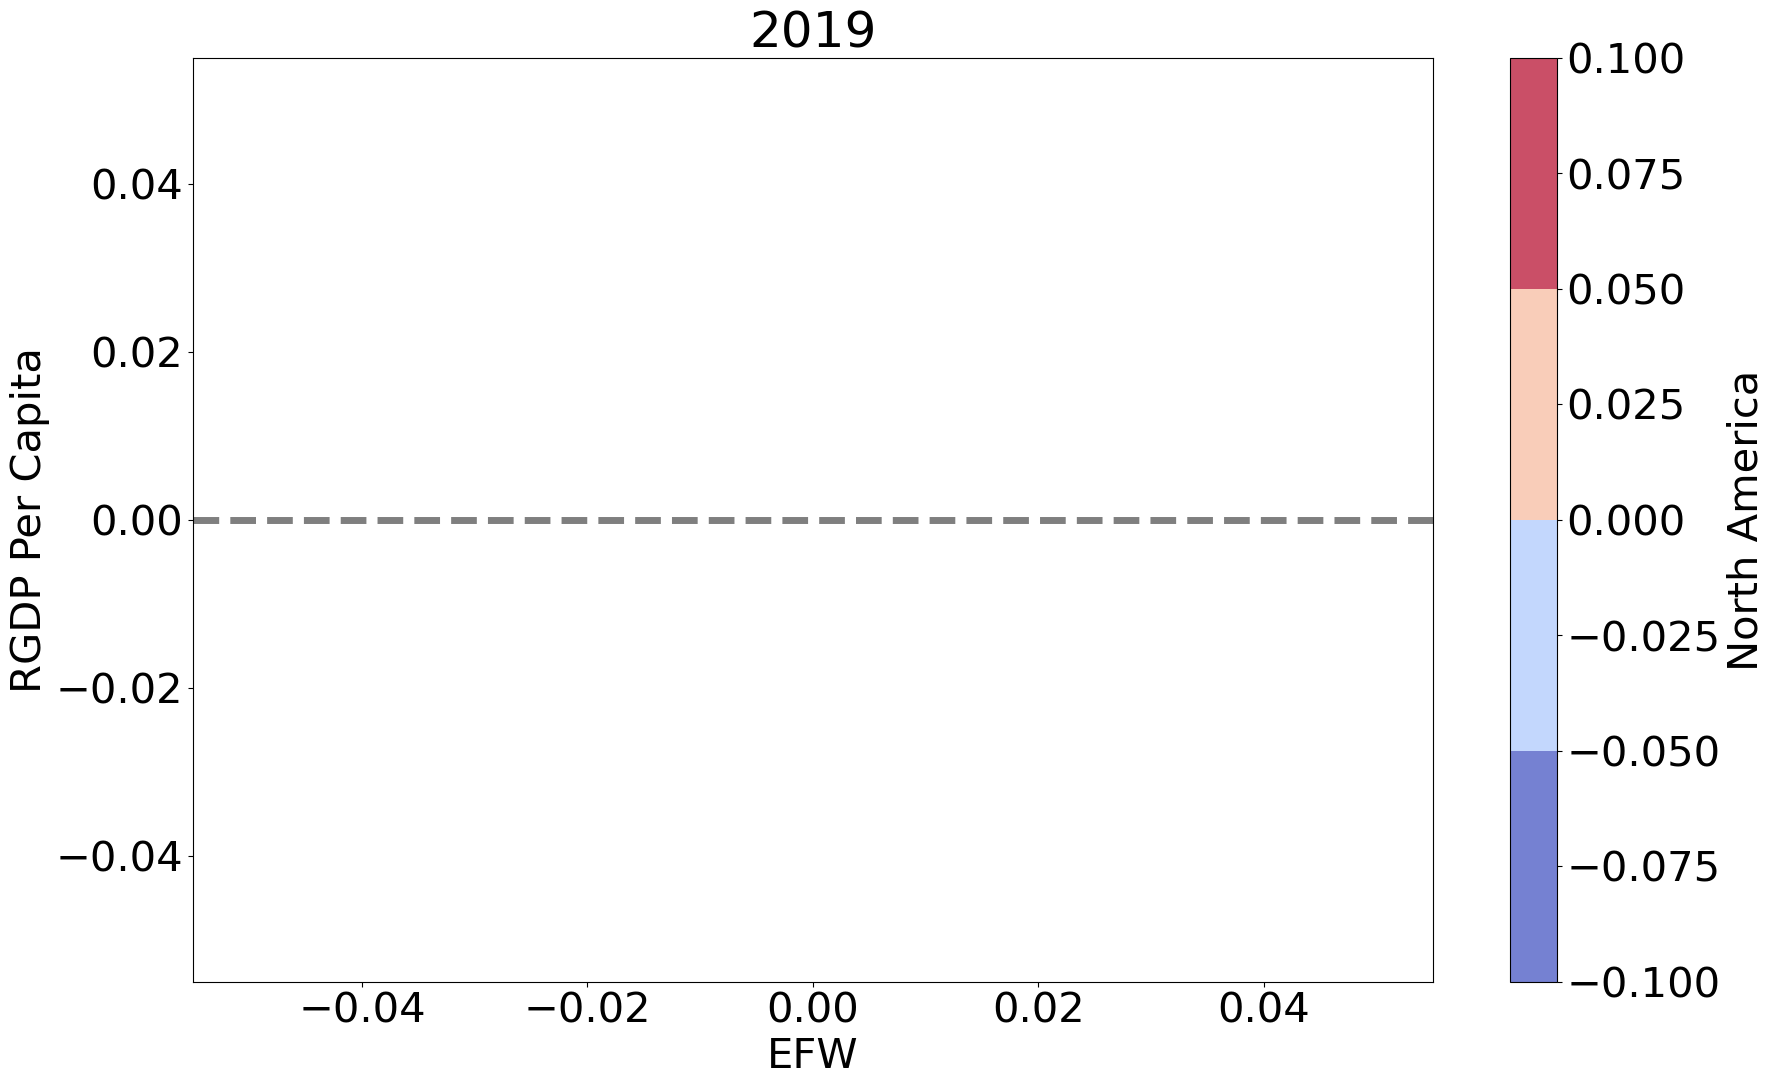

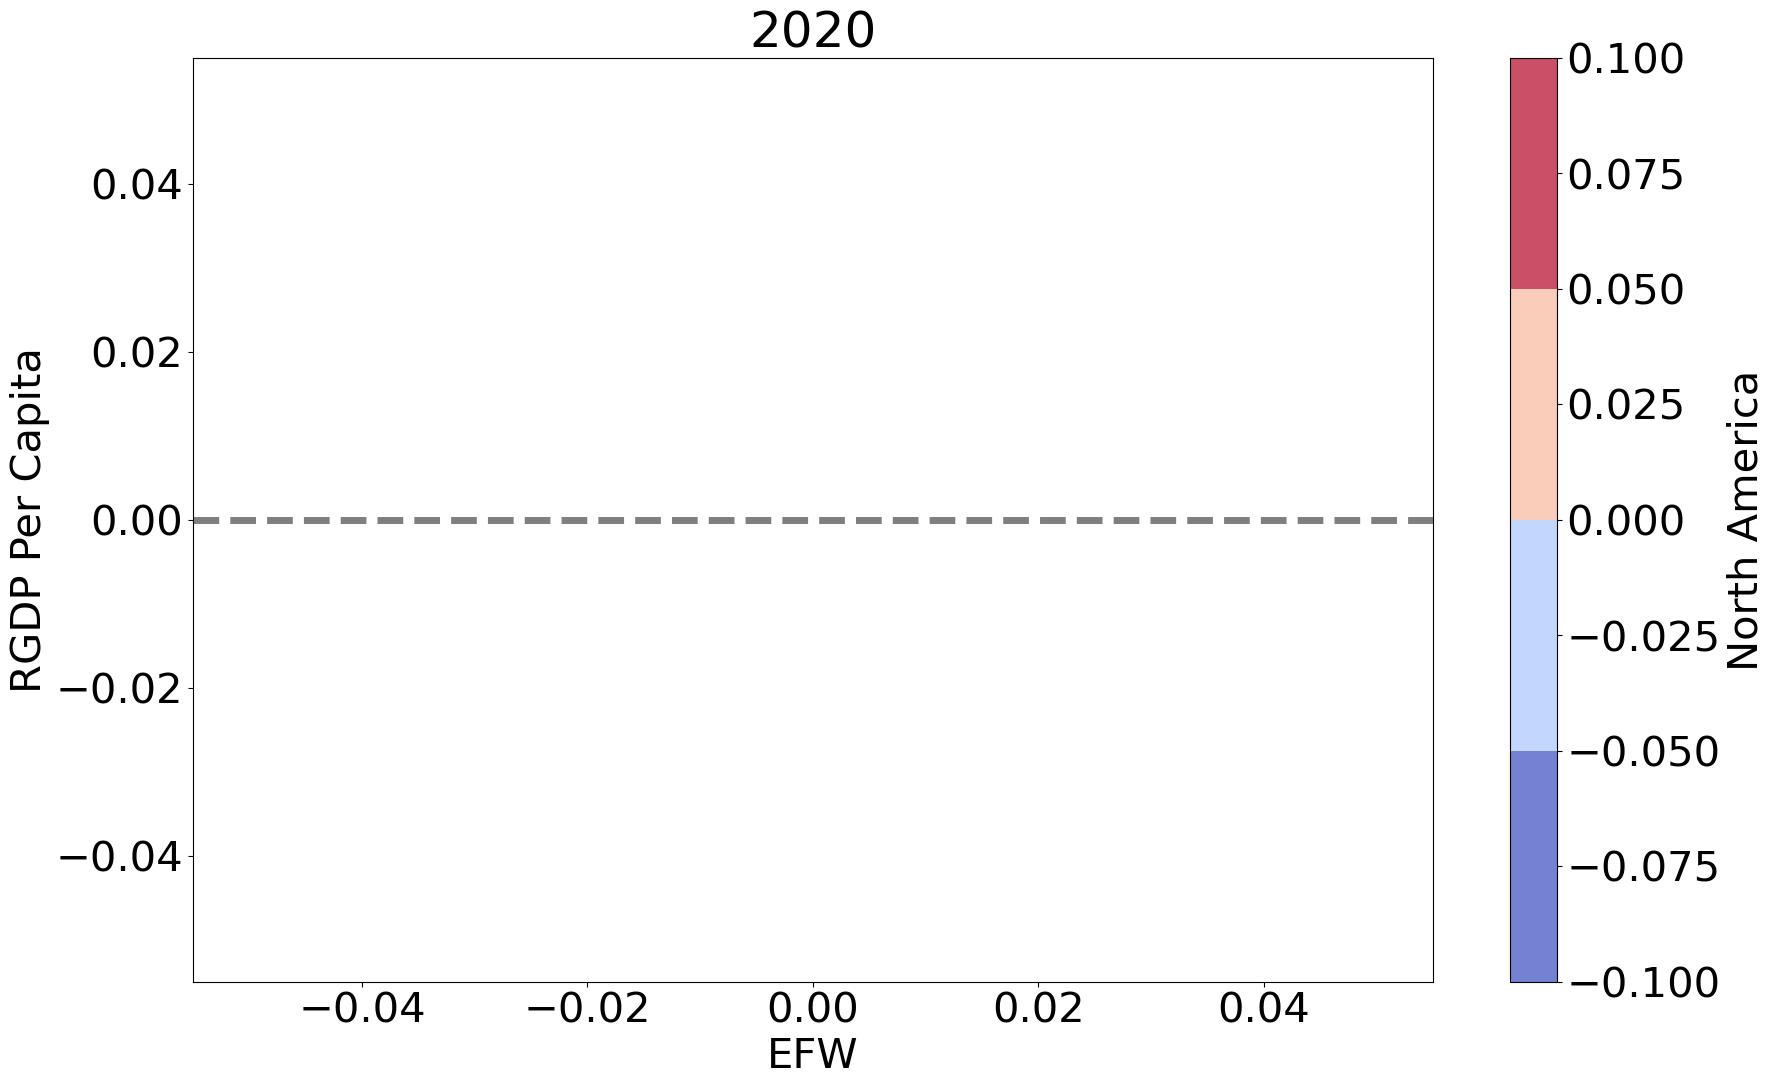

In [12]:
from matplotlib import cm
plt.rcParams.update({"font.size":30})
#year = "2000"
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 4)
for year in years:
    
    plot_data = data[data.index.get_level_values("Year") == year]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW", 
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = cmap,
                          s = 100,
                          alpha = .7,
                          ax = ax)
    ax.set_title(str(year)[:4])
    # adds a horizontal dash line at 0
    ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)

In [13]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan


In [20]:
def create_quantile(n,
                   data,
                   year,
                   quantile_var,
                   quantile_name):
    # index that identifies countries for a given year
    year_index = data.index.get_level_values("Year") == year
    quantile_values_dict = {
        i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n+1)}
    for index in data[year_index].index:
        # identify value of the variable of interest
        val = data.loc[index][quantile_var]
        for i in range(1, n + 1):
            if val <= quantile_values_dict[i]:
                data.loc[index,[quantile_name]] = int((n + 1) - i)
                break
        else:
            continue
        
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)
data.loc["USA"]

ISO_Code_2 World Bank Region  \
Year                                      
1970-01-01         US     North America   
1975-01-01         US     North America   
1980-01-01         US     North America   
1985-01-01         US     North America   
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   
2019-01-01         US     North America   
2020-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1970-01-01                                                NaN                                                                                     
1975-01-01                                                NaN                                                                                     
1980-01-01                                                NaN                                                                                     
1985-01-01                                                NaN                                                                                     
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                        

<AxesSubplot:xlabel='EFW', ylabel='RGDP Per Capita'>

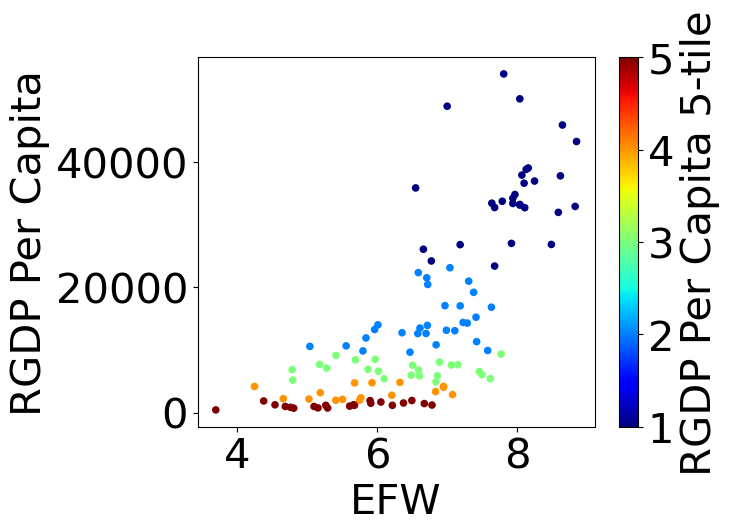

In [24]:
year = "2000"
plot_data = data[data.index.get_level_values("Year") == year]
plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = "jet") 